## Dataset Scrapping

In [ ]:
!pip install -qq google-play-scraper

     |████████████████████████████████| 52 kB 424 kB/s 


If we get random Apps, we will end by random domain and this will be bad for the training if our dataset is not very very large. So we will focus on some apps for a specific domain (productivity)

In [ ]:
app_packages = [
  'com.anydo',
  'com.todoist',
  'com.ticktick.task',
  'com.habitrpg.android.habitica',
  'cc.forestapp',
  'com.oristats.habitbull',
  'com.levor.liferpgtasks',
  'com.habitnow',
  'com.microsoft.todos',
  'prox.lab.calclock',
  'com.gmail.jmartindev.timetune',
  'com.artfulagenda.app',
  'com.tasks.android',
  'com.appgenix.bizcal',
  'com.appxy.planner'
]

In [ ]:
len(app_packages)

15

In [ ]:
from tqdm import tqdm

In [ ]:
# we need the following end points from the library
from google_play_scraper import Sort, reviews, app

In [ ]:
# Get the apps information

app_info = []

for ap in tqdm(app_packages):
  info = app(ap, lang='en', country='us')
  del info['comments']  # Currently we are not interested in the comments associated with the app
  app_info.append(info)

100%|██████████| 15/15 [00:02<00:00,  5.65it/s]


In [ ]:
import json # because the google play scraper library is returning a list of jsons
# json related
from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

In [ ]:
# Let's look at what we have so far
def print_json(json_object):
  json_str = json.dumps(
    json_object,
    indent=2,
    sort_keys=True,
    default=str
  )
  # highlight method for better formatting the result
  print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [ ]:
print_json(app_info[0])

{
  "adSupported": null,
  "androidVersion": "Varies",
  "androidVersionText": "Varies with device",
  "appId": "com.anydo",
  "containsAds": false,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "\ud83e\udd47 <b>\"#1 to do list app out there\u201d</b> - WSJ\r\n\ud83c\udfc6 <b>Editor's Choice</b> by Google\r\n\r\nOver 30M people rely on Any.do to stay organized and get more done.\r\nIt's a simple to do list app with reminders, planner & calendar - all in one.\r\n\r\n<b>\ud83e\udd47 \"A MUST HAVE APP\" (Lifehacker, NYTimes, USA TODAY).</b>\r\n\r\nAny.do is a free to-do list, planner & calendar app for managing and organizing your daily tasks, to-do lists, notes, reminders, checklists, calendar events, grocery lists, and more.\r\n\r\nOrganize your tasks & to-do list\r\n\r\n\u2022 ADVANCED CALENDAR & DAILY PLANNER - Keep your to-do list and calendar events always at hand with our calendar widget. Any.do to-do list & planner support

In [ ]:
# for visualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

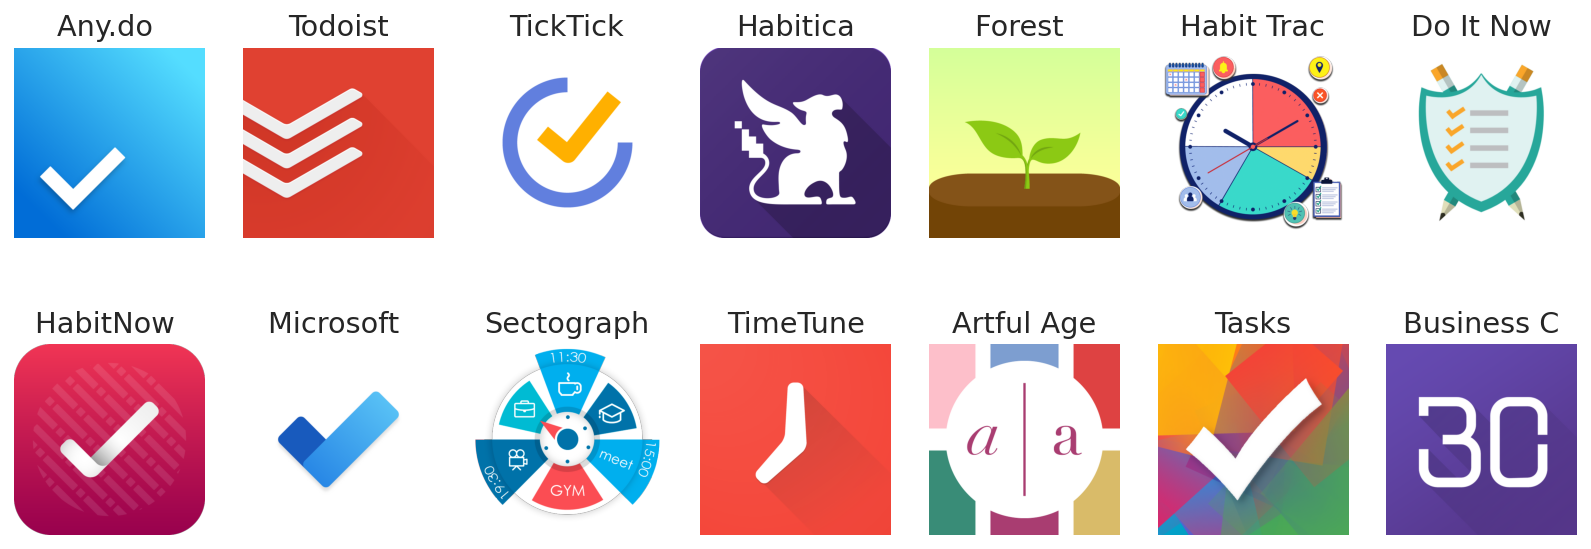

In [ ]:
def format_title(title):
  sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
  if sep_index != -1:
    title = title[:sep_index]
  return title[:10]

fig, axs = plt.subplots(2, len(app_info) // 2, figsize=(14, 5))

for i, ax in enumerate(axs.flat):
  ai = app_info[i]
  img = plt.imread(ai['icon'])
  ax.imshow(img)
  ax.set_title(format_title(ai['title']))
  ax.axis('off')

In [ ]:
import pandas as pd

In [ ]:
# Convert the jsons list to a dataframe
app_info_df = pd.DataFrame(app_info)
app_info_df.head(n=2)

,title,description,descriptionHTML,summary,summaryHTML,installs,minInstalls,score,ratings,reviews,histogram,price,free,currency,sale,saleTime,originalPrice,saleText,offersIAP,inAppProductPrice,size,androidVersion,androidVersionText,developer,developerId,developerEmail,developerWebsite,developerAddress,privacyPolicy,developerInternalID,genre,genreId,icon,headerImage,screenshots,video,videoImage,contentRating,contentRatingDescription,adSupported,containsAds,released,updated,version,recentChanges,recentChangesHTML,editorsChoice,appId,url
0,"Any.do - To do list, planner & calendar","🥇 <b>""#1 to do list app out there”</b> - WSJ\r...",🥇 <b>&quot;#1 to do list app out there”</b> - ...,"Simple planner with to-do list, tasks, reminde...","Simple planner with to-do list, tasks, reminde...","10,000,000+",10000000,4.496454,393433,133517,"[21819, 7579, 18549, 50998, 294488]",0,True,USD,False,None,None,None,True,$0.99 - $83.88 per item,Varies with device,Varies,Varies with device,Any.do To-do list & Calendar,5304780265295461149,feedback+androidtodo@any.do,https://www.any.do,"Any.do Inc.\n\n156 Begin St. 22nd floor, Tel A...",https://www.any.do/privacy,5304780265295461149,Productivity,PRODUCTIVITY,https://play-lh.googleusercontent.com/zgOLUXCH...,https://play-lh.googleusercontent.com/umhDP6ph...,[https://play-lh.googleusercontent.com/cGoZDZR...,None,None,Everyone,None,None,False,"Nov 10, 2011",1628143078,Varies with device,What's new?\r\n- Filters! You can now filter y...,What&#39;s new?<br>- Filters! You can now filt...,False,com.anydo,https://play.google.com/store/apps/details?id=...
1,"Todoist: To-Do List, Tasks & Reminders","🏆 <b>2020 Editor's Choice</b> by Google\r\n🥇 ""...",🏆 <b>2020 Editor&#39;s Choice</b> by Google<br...,“The best to-do list app right now” - The Verg...,“The best to-do list app right now” - The Verg...,"10,000,000+",10000000,4.536500,229169,69051,"[10657, 3725, 8549, 35317, 170921]",0,True,USD,False,None,None,None,True,$0.99 - $36.00 per item,Varies with device,Varies,Varies with device,Doist,6748661820728732000,support@todoist.com,http://todoist.com,"Doist\n201 Mission Street, Suite 1200\nSan Fra...",https://todoist.com/privacy,6748661820728732000,Productivity,PRODUCTIVITY,https://play-lh.googleusercontent.com/GK0SwEBV...,https://play-lh.googleusercontent.com/sAjzU1fU...,[https://play-lh.googleusercontent.com/cealfl9...,None,None,Everyone,None,None,False,"Nov 18, 2012",1630427410,Varies with device,⭐️ Preview the gorgeous design update for Andr...,⭐️ Preview the gorgeous design update for Andr...,False,com.todoist,https://play.google.com/store/apps/details?id=...


In [ ]:
# Save to a csv file
app_info_df.to_csv('apps.csv', index=None, header=True)

In [ ]:
reviews_count = [184, 200, 181, 170, 162]

In [ ]:
# We are not so interested in the above info, we now want to get the app reviews
app_reviews = []

# We will balance the dataset by taking an equal nu,ber from each rating
for ap in tqdm(app_packages):
  for score in list(range(1, 6)):
    rvs, _ = reviews(
      ap,
      lang='en',
      country='us',
      sort=Sort.MOST_RELEVANT,
      count= reviews_count[score-1],
      filter_score_with=score
    )
    for r in rvs:
      r['appId'] = ap
    app_reviews.extend(rvs)

100%|██████████| 15/15 [00:26<00:00,  1.78s/it]


In [ ]:
print_json(app_reviews[0])

{
  "appId": "com.anydo",
  "at": "2021-08-05 11:30:39",
  "content": "The user interface is horrible. The way the tasks show up is very difficult to see and read at a glance, and the font in most places is so small it's not even readable. There are only five predefined color schemes for themes, none of them are at all attractive or easy to read. I set a reminder, and it didn't even go off. For an app this expensive, I would expect much more. There are a ton of free apps that are so much better than this one.",
  "repliedAt": "2021-08-08 14:08:07",
  "replyContent": "You can change the font size from your device settings:) As long as you\u2019ve turned your reminders ON and enabled the app notifications in your device settings, you should be getting them. Please check out this article bit.ly/364FSWk. If you're experiencing any issues please submit a bug report via Settings - Support.\n",
  "reviewCreatedVersion": "5.14.4.5",
  "reviewId": "gp:AOqpTOEgA041yx9x7JTR5cAyfjzGRxIKhP3FLYbngru

In [ ]:
print(len(app_reviews))
reviews_dataset = pd.DataFrame(app_reviews)

12164


In [ ]:
reviews_dataset.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appId
0,gp:AOqpTOEgA041yx9x7JTR5cAyfjzGRxIKhP3FLYbngru...,Jason Spafford,https://play-lh.googleusercontent.com/a-/AOh14...,The user interface is horrible. The way the ta...,1,145,5.14.4.5,2021-08-05 11:30:39,You can change the font size from your device ...,2021-08-08 14:08:07,com.anydo
1,gp:AOqpTOFlVNthSl8fOBybN5zmi9N9iISuPH35mboRdBG...,Kathy Upton,https://play-lh.googleusercontent.com/a-/AOh14...,It keeps losing the events - only saves some! ...,1,2,5.14.4.5,2021-08-15 12:29:32,"Hi, we're sorry to hear you're experiencing is...",2021-08-15 14:23:13,com.anydo
2,gp:AOqpTOGw0jBJ0bdj9A9rfU0K94KztVF1LbPm4J3OMoM...,Almighty Dodorex,https://play-lh.googleusercontent.com/a-/AOh14...,I have adhd and wanted to try this app out to ...,1,0,5.15.1.6,2021-09-01 06:20:25,The Recurring tasks are available for Free to ...,2021-09-06 06:03:37,com.anydo
3,gp:AOqpTOHObjABAAJpHLDEgA81DT8CXT8ZyLX0eXob74r...,A Miah,https://play-lh.googleusercontent.com/a/AATXAJ...,No point paying premium for colour tags when t...,1,3,5.14.4.5,2021-08-08 16:57:47,"The color tags are for tasks, and you will be ...",2021-08-09 15:06:50,com.anydo
4,gp:AOqpTOEMICI7guhDUwp7mgNTnVmRjmokzZ7N8-xu4nW...,Keith Tan,https://play-lh.googleusercontent.com/a/AATXAJ...,Installed and had a look around and uninstalle...,1,1,5.14.4.5,2021-08-09 12:05:34,If you're having trouble figuring out how to t...,2021-08-09 15:12:54,com.anydo


In [ ]:
reviews_dataset.shape

(12164, 11)

In [ ]:
reviews_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12164 entries, 0 to 12163
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              12164 non-null  object        
 1   userName              12164 non-null  object        
 2   userImage             12164 non-null  object        
 3   content               12164 non-null  object        
 4   score                 12164 non-null  int64         
 5   thumbsUpCount         12164 non-null  int64         
 6   reviewCreatedVersion  10619 non-null  object        
 7   at                    12164 non-null  datetime64[ns]
 8   replyContent          6418 non-null   object        
 9   repliedAt             6418 non-null   datetime64[ns]
 10  appId                 12164 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 1.0+ MB


In [ ]:
print("1 star rating count: ",len(reviews_dataset[reviews_dataset["score"] == 1]),"\n")
print("2 stars rating count: ",len(reviews_dataset[reviews_dataset["score"] == 2]),"\n")
print("3 stars rating count: ",len(reviews_dataset[reviews_dataset["score"] == 3]),"\n")
print("4 stars rating count: ",len(reviews_dataset[reviews_dataset["score"] == 4]),"\n")
print("5 stars rating count: ",len(reviews_dataset[reviews_dataset["score"] == 5]),"\n")

1 star rating count:  2437 

2 stars rating count:  2430 

3 stars rating count:  2434 

4 stars rating count:  2433 

5 stars rating count:  2430 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


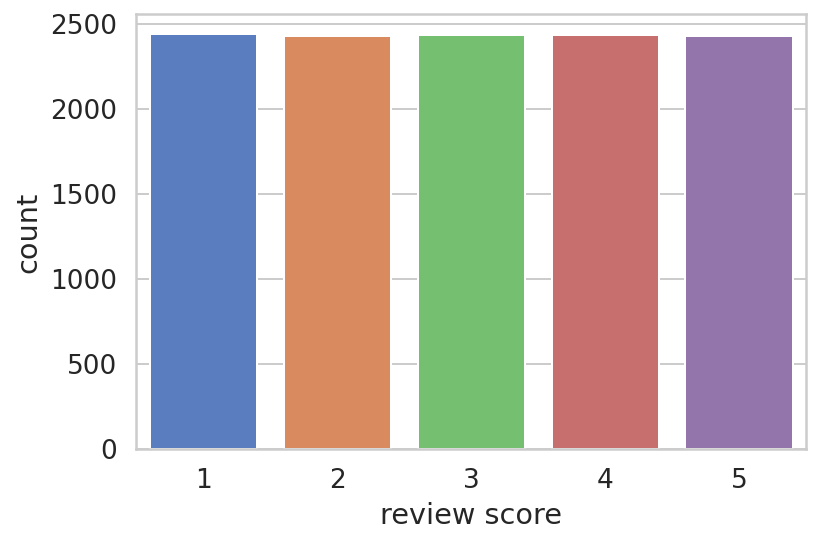

In [ ]:
sns.countplot(reviews_dataset.score)
plt.xlabel('review score');

## Data Preprocessing

In [ ]:
# drop non useful columns
columns_of_interest = ["content", "score", "thumbsUpCount", "appId"]
reviews_dataset = reviews_dataset[columns_of_interest]

# Make the range of the score from 0->4 instead of 1->5
reviews_dataset["score"] = reviews_dataset["score"]-1

reviews_dataset.head()

,content,score,thumbsUpCount,appId
0,The user interface is horrible. The way the ta...,0,145,com.anydo
1,It keeps losing the events - only saves some! ...,0,2,com.anydo
2,I have adhd and wanted to try this app out to ...,0,0,com.anydo
3,No point paying premium for colour tags when t...,0,3,com.anydo
4,Installed and had a look around and uninstalle...,0,1,com.anydo


In [ ]:
reviews_dataset['content'] = reviews_dataset['content'].astype(str)

#### Conversion of Emoticon to Words

In [ ]:
EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

In [ ]:
import re

In [ ]:
# remember remove underscores

def convert_emoticons(text):
    for emot in EMOTICONS:
        text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
    return text

In [ ]:
print(convert_emoticons("Hello :-)"))

Hello Happy_face_smiley


#### Conversion of Emoji to Words

##### emojis dict

In [ ]:
EMO_UNICODE = {
    u':1st_place_medal:': u'\U0001F947',
    u':2nd_place_medal:': u'\U0001F948',
    u':3rd_place_medal:': u'\U0001F949',
    u':AB_button_(blood_type):': u'\U0001F18E',
    u':ATM_sign:': u'\U0001F3E7',
    u':A_button_(blood_type):': u'\U0001F170',
    u':Afghanistan:': u'\U0001F1E6 \U0001F1EB',
    u':Albania:': u'\U0001F1E6 \U0001F1F1',
    u':Algeria:': u'\U0001F1E9 \U0001F1FF',
    u':American_Samoa:': u'\U0001F1E6 \U0001F1F8',
    u':Andorra:': u'\U0001F1E6 \U0001F1E9',
    u':Angola:': u'\U0001F1E6 \U0001F1F4',
    u':Anguilla:': u'\U0001F1E6 \U0001F1EE',
    u':Antarctica:': u'\U0001F1E6 \U0001F1F6',
    u':Antigua_&_Barbuda:': u'\U0001F1E6 \U0001F1EC',
    u':Aquarius:': u'\U00002652',
    u':Argentina:': u'\U0001F1E6 \U0001F1F7',
    u':Aries:': u'\U00002648',
    u':Armenia:': u'\U0001F1E6 \U0001F1F2',
    u':Aruba:': u'\U0001F1E6 \U0001F1FC',
    u':Ascension_Island:': u'\U0001F1E6 \U0001F1E8',
    u':Australia:': u'\U0001F1E6 \U0001F1FA',
    u':Austria:': u'\U0001F1E6 \U0001F1F9',
    u':Azerbaijan:': u'\U0001F1E6 \U0001F1FF',
    u':BACK_arrow:': u'\U0001F519',
    u':B_button_(blood_type):': u'\U0001F171',
    u':Bahamas:': u'\U0001F1E7 \U0001F1F8',
    u':Bahrain:': u'\U0001F1E7 \U0001F1ED',
    u':Bangladesh:': u'\U0001F1E7 \U0001F1E9',
    u':Barbados:': u'\U0001F1E7 \U0001F1E7',
    u':Belarus:': u'\U0001F1E7 \U0001F1FE',
    u':Belgium:': u'\U0001F1E7 \U0001F1EA',
    u':Belize:': u'\U0001F1E7 \U0001F1FF',
    u':Benin:': u'\U0001F1E7 \U0001F1EF',
    u':Bermuda:': u'\U0001F1E7 \U0001F1F2',
    u':Bhutan:': u'\U0001F1E7 \U0001F1F9',
    u':Bolivia:': u'\U0001F1E7 \U0001F1F4',
    u':Bosnia_&_Herzegovina:': u'\U0001F1E7 \U0001F1E6',
    u':Botswana:': u'\U0001F1E7 \U0001F1FC',
    u':Bouvet_Island:': u'\U0001F1E7 \U0001F1FB',
    u':Brazil:': u'\U0001F1E7 \U0001F1F7',
    u':British_Indian_Ocean_Territory:': u'\U0001F1EE \U0001F1F4',
    u':British_Virgin_Islands:': u'\U0001F1FB \U0001F1EC',
    u':Brunei:': u'\U0001F1E7 \U0001F1F3',
    u':Bulgaria:': u'\U0001F1E7 \U0001F1EC',
    u':Burkina_Faso:': u'\U0001F1E7 \U0001F1EB',
    u':Burundi:': u'\U0001F1E7 \U0001F1EE',
    u':CL_button:': u'\U0001F191',
    u':COOL_button:': u'\U0001F192',
    u':Cambodia:': u'\U0001F1F0 \U0001F1ED',
    u':Cameroon:': u'\U0001F1E8 \U0001F1F2',
    u':Canada:': u'\U0001F1E8 \U0001F1E6',
    u':Canary_Islands:': u'\U0001F1EE \U0001F1E8',
    u':Cancer:': u'\U0000264B',
    u':Cape_Verde:': u'\U0001F1E8 \U0001F1FB',
    u':Capricorn:': u'\U00002651',
    u':Caribbean_Netherlands:': u'\U0001F1E7 \U0001F1F6',
    u':Cayman_Islands:': u'\U0001F1F0 \U0001F1FE',
    u':Central_African_Republic:': u'\U0001F1E8 \U0001F1EB',
    u':Ceuta_&_Melilla:': u'\U0001F1EA \U0001F1E6',
    u':Chad:': u'\U0001F1F9 \U0001F1E9',
    u':Chile:': u'\U0001F1E8 \U0001F1F1',
    u':China:': u'\U0001F1E8 \U0001F1F3',
    u':Christmas_Island:': u'\U0001F1E8 \U0001F1FD',
    u':Christmas_tree:': u'\U0001F384',
    u':Clipperton_Island:': u'\U0001F1E8 \U0001F1F5',
    u':Cocos_(Keeling)_Islands:': u'\U0001F1E8 \U0001F1E8',
    u':Colombia:': u'\U0001F1E8 \U0001F1F4',
    u':Comoros:': u'\U0001F1F0 \U0001F1F2',
    u':Congo_-_Brazzaville:': u'\U0001F1E8 \U0001F1EC',
    u':Congo_-_Kinshasa:': u'\U0001F1E8 \U0001F1E9',
    u':Cook_Islands:': u'\U0001F1E8 \U0001F1F0',
    u':Costa_Rica:': u'\U0001F1E8 \U0001F1F7',
    u':Croatia:': u'\U0001F1ED \U0001F1F7',
    u':Cuba:': u'\U0001F1E8 \U0001F1FA',
    u':Curaçao:': u'\U0001F1E8 \U0001F1FC',
    u':Cyprus:': u'\U0001F1E8 \U0001F1FE',
    u':Czech_Republic:': u'\U0001F1E8 \U0001F1FF',
    u':Côte_d’Ivoire:': u'\U0001F1E8 \U0001F1EE',
    u':Denmark:': u'\U0001F1E9 \U0001F1F0',
    u':Diego_Garcia:': u'\U0001F1E9 \U0001F1EC',
    u':Djibouti:': u'\U0001F1E9 \U0001F1EF',
    u':Dominica:': u'\U0001F1E9 \U0001F1F2',
    u':Dominican_Republic:': u'\U0001F1E9 \U0001F1F4',
    u':END_arrow:': u'\U0001F51A',
    u':Ecuador:': u'\U0001F1EA \U0001F1E8',
    u':Egypt:': u'\U0001F1EA \U0001F1EC',
    u':El_Salvador:': u'\U0001F1F8 \U0001F1FB',
    u':Equatorial_Guinea:': u'\U0001F1EC \U0001F1F6',
    u':Eritrea:': u'\U0001F1EA \U0001F1F7',
    u':Estonia:': u'\U0001F1EA \U0001F1EA',
    u':Ethiopia:': u'\U0001F1EA \U0001F1F9',
    u':European_Union:': u'\U0001F1EA \U0001F1FA',
    u':FREE_button:': u'\U0001F193',
    u':Falkland_Islands:': u'\U0001F1EB \U0001F1F0',
    u':Faroe_Islands:': u'\U0001F1EB \U0001F1F4',
    u':Fiji:': u'\U0001F1EB \U0001F1EF',
    u':Finland:': u'\U0001F1EB \U0001F1EE',
    u':France:': u'\U0001F1EB \U0001F1F7',
    u':French_Guiana:': u'\U0001F1EC \U0001F1EB',
    u':French_Polynesia:': u'\U0001F1F5 \U0001F1EB',
    u':French_Southern_Territories:': u'\U0001F1F9 \U0001F1EB',
    u':Gabon:': u'\U0001F1EC \U0001F1E6',
    u':Gambia:': u'\U0001F1EC \U0001F1F2',
    u':Gemini:': u'\U0000264A',
    u':Georgia:': u'\U0001F1EC \U0001F1EA',
    u':Germany:': u'\U0001F1E9 \U0001F1EA',
    u':Ghana:': u'\U0001F1EC \U0001F1ED',
    u':Gibraltar:': u'\U0001F1EC \U0001F1EE',
    u':Greece:': u'\U0001F1EC \U0001F1F7',
    u':Greenland:': u'\U0001F1EC \U0001F1F1',
    u':Grenada:': u'\U0001F1EC \U0001F1E9',
    u':Guadeloupe:': u'\U0001F1EC \U0001F1F5',
    u':Guam:': u'\U0001F1EC \U0001F1FA',
    u':Guatemala:': u'\U0001F1EC \U0001F1F9',
    u':Guernsey:': u'\U0001F1EC \U0001F1EC',
    u':Guinea:': u'\U0001F1EC \U0001F1F3',
    u':Guinea-Bissau:': u'\U0001F1EC \U0001F1FC',
    u':Guyana:': u'\U0001F1EC \U0001F1FE',
    u':Haiti:': u'\U0001F1ED \U0001F1F9',
    u':Heard_&_McDonald_Islands:': u'\U0001F1ED \U0001F1F2',
    u':Honduras:': u'\U0001F1ED \U0001F1F3',
    u':Hong_Kong_SAR_China:': u'\U0001F1ED \U0001F1F0',
    u':Hungary:': u'\U0001F1ED \U0001F1FA',
    u':ID_button:': u'\U0001F194',
    u':Iceland:': u'\U0001F1EE \U0001F1F8',
    u':India:': u'\U0001F1EE \U0001F1F3',
    u':Indonesia:': u'\U0001F1EE \U0001F1E9',
    u':Iran:': u'\U0001F1EE \U0001F1F7',
    u':Iraq:': u'\U0001F1EE \U0001F1F6',
    u':Ireland:': u'\U0001F1EE \U0001F1EA',
    u':Isle_of_Man:': u'\U0001F1EE \U0001F1F2',
    u':Israel:': u'\U0001F1EE \U0001F1F1',
    u':Italy:': u'\U0001F1EE \U0001F1F9',
    u':Jamaica:': u'\U0001F1EF \U0001F1F2',
    u':Japan:': u'\U0001F1EF \U0001F1F5',
    u':Japanese_acceptable_button:': u'\U0001F251',
    u':Japanese_application_button:': u'\U0001F238',
    u':Japanese_bargain_button:': u'\U0001F250',
    u':Japanese_castle:': u'\U0001F3EF',
    u':Japanese_congratulations_button:': u'\U00003297',
    u':Japanese_discount_button:': u'\U0001F239',
    u':Japanese_dolls:': u'\U0001F38E',
    u':Japanese_free_of_charge_button:': u'\U0001F21A',
    u':Japanese_here_button:': u'\U0001F201',
    u':Japanese_monthly_amount_button:': u'\U0001F237',
    u':Japanese_no_vacancy_button:': u'\U0001F235',
    u':Japanese_not_free_of_charge_button:': u'\U0001F236',
    u':Japanese_open_for_business_button:': u'\U0001F23A',
    u':Japanese_passing_grade_button:': u'\U0001F234',
    u':Japanese_post_office:': u'\U0001F3E3',
    u':Japanese_prohibited_button:': u'\U0001F232',
    u':Japanese_reserved_button:': u'\U0001F22F',
    u':Japanese_secret_button:': u'\U00003299',
    u':Japanese_service_charge_button:': u'\U0001F202',
    u':Japanese_symbol_for_beginner:': u'\U0001F530',
    u':Japanese_vacancy_button:': u'\U0001F233',
    u':Jersey:': u'\U0001F1EF \U0001F1EA',
    u':Jordan:': u'\U0001F1EF \U0001F1F4',
    u':Kazakhstan:': u'\U0001F1F0 \U0001F1FF',
    u':Kenya:': u'\U0001F1F0 \U0001F1EA',
    u':Kiribati:': u'\U0001F1F0 \U0001F1EE',
    u':Kosovo:': u'\U0001F1FD \U0001F1F0',
    u':Kuwait:': u'\U0001F1F0 \U0001F1FC',
    u':Kyrgyzstan:': u'\U0001F1F0 \U0001F1EC',
    u':Laos:': u'\U0001F1F1 \U0001F1E6',
    u':Latvia:': u'\U0001F1F1 \U0001F1FB',
    u':Lebanon:': u'\U0001F1F1 \U0001F1E7',
    u':Leo:': u'\U0000264C',
    u':Lesotho:': u'\U0001F1F1 \U0001F1F8',
    u':Liberia:': u'\U0001F1F1 \U0001F1F7',
    u':Libra:': u'\U0000264E',
    u':Libya:': u'\U0001F1F1 \U0001F1FE',
    u':Liechtenstein:': u'\U0001F1F1 \U0001F1EE',
    u':Lithuania:': u'\U0001F1F1 \U0001F1F9',
    u':Luxembourg:': u'\U0001F1F1 \U0001F1FA',
    u':Macau_SAR_China:': u'\U0001F1F2 \U0001F1F4',
    u':Macedonia:': u'\U0001F1F2 \U0001F1F0',
    u':Madagascar:': u'\U0001F1F2 \U0001F1EC',
    u':Malawi:': u'\U0001F1F2 \U0001F1FC',
    u':Malaysia:': u'\U0001F1F2 \U0001F1FE',
    u':Maldives:': u'\U0001F1F2 \U0001F1FB',
    u':Mali:': u'\U0001F1F2 \U0001F1F1',
    u':Malta:': u'\U0001F1F2 \U0001F1F9',
    u':Marshall_Islands:': u'\U0001F1F2 \U0001F1ED',
    u':Martinique:': u'\U0001F1F2 \U0001F1F6',
    u':Mauritania:': u'\U0001F1F2 \U0001F1F7',
    u':Mauritius:': u'\U0001F1F2 \U0001F1FA',
    u':Mayotte:': u'\U0001F1FE \U0001F1F9',
    u':Mexico:': u'\U0001F1F2 \U0001F1FD',
    u':Micronesia:': u'\U0001F1EB \U0001F1F2',
    u':Moldova:': u'\U0001F1F2 \U0001F1E9',
    u':Monaco:': u'\U0001F1F2 \U0001F1E8',
    u':Mongolia:': u'\U0001F1F2 \U0001F1F3',
    u':Montenegro:': u'\U0001F1F2 \U0001F1EA',
    u':Montserrat:': u'\U0001F1F2 \U0001F1F8',
    u':Morocco:': u'\U0001F1F2 \U0001F1E6',
    u':Mozambique:': u'\U0001F1F2 \U0001F1FF',
    u':Mrs._Claus:': u'\U0001F936',
    u':Mrs._Claus_dark_skin_tone:': u'\U0001F936 \U0001F3FF',
    u':Mrs._Claus_light_skin_tone:': u'\U0001F936 \U0001F3FB',
    u':Mrs._Claus_medium-dark_skin_tone:': u'\U0001F936 \U0001F3FE',
    u':Mrs._Claus_medium-light_skin_tone:': u'\U0001F936 \U0001F3FC',
    u':Mrs._Claus_medium_skin_tone:': u'\U0001F936 \U0001F3FD',
    u':Myanmar_(Burma):': u'\U0001F1F2 \U0001F1F2',
    u':NEW_button:': u'\U0001F195',
    u':NG_button:': u'\U0001F196',
    u':Namibia:': u'\U0001F1F3 \U0001F1E6',
    u':Nauru:': u'\U0001F1F3 \U0001F1F7',
    u':Nepal:': u'\U0001F1F3 \U0001F1F5',
    u':Netherlands:': u'\U0001F1F3 \U0001F1F1',
    u':New_Caledonia:': u'\U0001F1F3 \U0001F1E8',
    u':New_Zealand:': u'\U0001F1F3 \U0001F1FF',
    u':Nicaragua:': u'\U0001F1F3 \U0001F1EE',
    u':Niger:': u'\U0001F1F3 \U0001F1EA',
    u':Nigeria:': u'\U0001F1F3 \U0001F1EC',
    u':Niue:': u'\U0001F1F3 \U0001F1FA',
    u':Norfolk_Island:': u'\U0001F1F3 \U0001F1EB',
    u':North_Korea:': u'\U0001F1F0 \U0001F1F5',
    u':Northern_Mariana_Islands:': u'\U0001F1F2 \U0001F1F5',
    u':Norway:': u'\U0001F1F3 \U0001F1F4',
    u':OK_button:': u'\U0001F197',
    u':OK_hand:': u'\U0001F44C',
    u':OK_hand_dark_skin_tone:': u'\U0001F44C \U0001F3FF',
    u':OK_hand_light_skin_tone:': u'\U0001F44C \U0001F3FB',
    u':OK_hand_medium-dark_skin_tone:': u'\U0001F44C \U0001F3FE',
    u':OK_hand_medium-light_skin_tone:': u'\U0001F44C \U0001F3FC',
    u':OK_hand_medium_skin_tone:': u'\U0001F44C \U0001F3FD',
    u':ON!_arrow:': u'\U0001F51B',
    u':O_button_(blood_type):': u'\U0001F17E',
    u':Oman:': u'\U0001F1F4 \U0001F1F2',
    u':Ophiuchus:': u'\U000026CE',
    u':P_button:': u'\U0001F17F',
    u':Pakistan:': u'\U0001F1F5 \U0001F1F0',
    u':Palau:': u'\U0001F1F5 \U0001F1FC',
    u':Palestinian_Territories:': u'\U0001F1F5 \U0001F1F8',
    u':Panama:': u'\U0001F1F5 \U0001F1E6',
    u':Papua_New_Guinea:': u'\U0001F1F5 \U0001F1EC',
    u':Paraguay:': u'\U0001F1F5 \U0001F1FE',
    u':Peru:': u'\U0001F1F5 \U0001F1EA',
    u':Philippines:': u'\U0001F1F5 \U0001F1ED',
    u':Pisces:': u'\U00002653',
    u':Pitcairn_Islands:': u'\U0001F1F5 \U0001F1F3',
    u':Poland:': u'\U0001F1F5 \U0001F1F1',
    u':Portugal:': u'\U0001F1F5 \U0001F1F9',
    u':Puerto_Rico:': u'\U0001F1F5 \U0001F1F7',
    u':Qatar:': u'\U0001F1F6 \U0001F1E6',
    u':Romania:': u'\U0001F1F7 \U0001F1F4',
    u':Russia:': u'\U0001F1F7 \U0001F1FA',
    u':Rwanda:': u'\U0001F1F7 \U0001F1FC',
    u':Réunion:': u'\U0001F1F7 \U0001F1EA',
    u':SOON_arrow:': u'\U0001F51C',
    u':SOS_button:': u'\U0001F198',
    u':Sagittarius:': u'\U00002650',
    u':Samoa:': u'\U0001F1FC \U0001F1F8',
    u':San_Marino:': u'\U0001F1F8 \U0001F1F2',
    u':Santa_Claus:': u'\U0001F385',
    u':Santa_Claus_dark_skin_tone:': u'\U0001F385 \U0001F3FF',
    u':Santa_Claus_light_skin_tone:': u'\U0001F385 \U0001F3FB',
    u':Santa_Claus_medium-dark_skin_tone:': u'\U0001F385 \U0001F3FE',
    u':Santa_Claus_medium-light_skin_tone:': u'\U0001F385 \U0001F3FC',
    u':Santa_Claus_medium_skin_tone:': u'\U0001F385 \U0001F3FD',
    u':Saudi_Arabia:': u'\U0001F1F8 \U0001F1E6',
    u':Scorpius:': u'\U0000264F',
    u':Senegal:': u'\U0001F1F8 \U0001F1F3',
    u':Serbia:': u'\U0001F1F7 \U0001F1F8',
    u':Seychelles:': u'\U0001F1F8 \U0001F1E8',
    u':Sierra_Leone:': u'\U0001F1F8 \U0001F1F1',
    u':Singapore:': u'\U0001F1F8 \U0001F1EC',
    u':Sint_Maarten:': u'\U0001F1F8 \U0001F1FD',
    u':Slovakia:': u'\U0001F1F8 \U0001F1F0',
    u':Slovenia:': u'\U0001F1F8 \U0001F1EE',
    u':Solomon_Islands:': u'\U0001F1F8 \U0001F1E7',
    u':Somalia:': u'\U0001F1F8 \U0001F1F4',
    u':South_Africa:': u'\U0001F1FF \U0001F1E6',
    u':South_Georgia_&_South_Sandwich_Islands:': u'\U0001F1EC \U0001F1F8',
    u':South_Korea:': u'\U0001F1F0 \U0001F1F7',
    u':South_Sudan:': u'\U0001F1F8 \U0001F1F8',
    u':Spain:': u'\U0001F1EA \U0001F1F8',
    u':Sri_Lanka:': u'\U0001F1F1 \U0001F1F0',
    u':St._Barthélemy:': u'\U0001F1E7 \U0001F1F1',
    u':St._Helena:': u'\U0001F1F8 \U0001F1ED',
    u':St._Kitts_&_Nevis:': u'\U0001F1F0 \U0001F1F3',
    u':St._Lucia:': u'\U0001F1F1 \U0001F1E8',
    u':St._Martin:': u'\U0001F1F2 \U0001F1EB',
    u':St._Pierre_&_Miquelon:': u'\U0001F1F5 \U0001F1F2',
    u':St._Vincent_&_Grenadines:': u'\U0001F1FB \U0001F1E8',
    u':Statue_of_Liberty:': u'\U0001F5FD',
    u':Sudan:': u'\U0001F1F8 \U0001F1E9',
    u':Suriname:': u'\U0001F1F8 \U0001F1F7',
    u':Svalbard_&_Jan_Mayen:': u'\U0001F1F8 \U0001F1EF',
    u':Swaziland:': u'\U0001F1F8 \U0001F1FF',
    u':Sweden:': u'\U0001F1F8 \U0001F1EA',
    u':Switzerland:': u'\U0001F1E8 \U0001F1ED',
    u':Syria:': u'\U0001F1F8 \U0001F1FE',
    u':São_Tomé_&_Príncipe:': u'\U0001F1F8 \U0001F1F9',
    u':TOP_arrow:': u'\U0001F51D',
    u':Taiwan:': u'\U0001F1F9 \U0001F1FC',
    u':Tajikistan:': u'\U0001F1F9 \U0001F1EF',
    u':Tanzania:': u'\U0001F1F9 \U0001F1FF',
    u':Taurus:': u'\U00002649',
    u':Thailand:': u'\U0001F1F9 \U0001F1ED',
    u':Timor-Leste:': u'\U0001F1F9 \U0001F1F1',
    u':Togo:': u'\U0001F1F9 \U0001F1EC',
    u':Tokelau:': u'\U0001F1F9 \U0001F1F0',
    u':Tokyo_tower:': u'\U0001F5FC',
    u':Tonga:': u'\U0001F1F9 \U0001F1F4',
    u':Trinidad_&_Tobago:': u'\U0001F1F9 \U0001F1F9',
    u':Tristan_da_Cunha:': u'\U0001F1F9 \U0001F1E6',
    u':Tunisia:': u'\U0001F1F9 \U0001F1F3',
    u':Turkey:': u'\U0001F1F9 \U0001F1F7',
    u':Turkmenistan:': u'\U0001F1F9 \U0001F1F2',
    u':Turks_&_Caicos_Islands:': u'\U0001F1F9 \U0001F1E8',
    u':Tuvalu:': u'\U0001F1F9 \U0001F1FB',
    u':U.S._Outlying_Islands:': u'\U0001F1FA \U0001F1F2',
    u':U.S._Virgin_Islands:': u'\U0001F1FB \U0001F1EE',
    u':UP!_button:': u'\U0001F199',
    u':Uganda:': u'\U0001F1FA \U0001F1EC',
    u':Ukraine:': u'\U0001F1FA \U0001F1E6',
    u':United_Arab_Emirates:': u'\U0001F1E6 \U0001F1EA',
    u':United_Kingdom:': u'\U0001F1EC \U0001F1E7',
    u':United_Nations:': u'\U0001F1FA \U0001F1F3',
    u':United_States:': u'\U0001F1FA \U0001F1F8',
    u':Uruguay:': u'\U0001F1FA \U0001F1FE',
    u':Uzbekistan:': u'\U0001F1FA \U0001F1FF',
    u':VS_button:': u'\U0001F19A',
    u':Vanuatu:': u'\U0001F1FB \U0001F1FA',
    u':Vatican_City:': u'\U0001F1FB \U0001F1E6',
    u':Venezuela:': u'\U0001F1FB \U0001F1EA',
    u':Vietnam:': u'\U0001F1FB \U0001F1F3',
    u':Virgo:': u'\U0000264D',
    u':Wallis_&_Futuna:': u'\U0001F1FC \U0001F1EB',
    u':Western_Sahara:': u'\U0001F1EA \U0001F1ED',
    u':Yemen:': u'\U0001F1FE \U0001F1EA',
    u':Zambia:': u'\U0001F1FF \U0001F1F2',
    u':Zimbabwe:': u'\U0001F1FF \U0001F1FC',
    u':admission_tickets:': u'\U0001F39F',
    u':aerial_tramway:': u'\U0001F6A1',
    u':airplane:': u'\U00002708',
    u':airplane_arrival:': u'\U0001F6EC',
    u':airplane_departure:': u'\U0001F6EB',
    u':alarm_clock:': u'\U000023F0',
    u':alembic:': u'\U00002697',
    u':alien:': u'\U0001F47D',
    u':alien_monster:': u'\U0001F47E',
    u':ambulance:': u'\U0001F691',
    u':american_football:': u'\U0001F3C8',
    u':amphora:': u'\U0001F3FA',
    u':anchor:': u'\U00002693',
    u':anger_symbol:': u'\U0001F4A2',
    u':angry_face:': u'\U0001F620',
    u':angry_face_with_horns:': u'\U0001F47F',
    u':anguished_face:': u'\U0001F627',
    u':ant:': u'\U0001F41C',
    u':antenna_bars:': u'\U0001F4F6',
    u':anticlockwise_arrows_button:': u'\U0001F504',
    u':articulated_lorry:': u'\U0001F69B',
    u':artist_palette:': u'\U0001F3A8',
    u':astonished_face:': u'\U0001F632',
    u':atom_symbol:': u'\U0000269B',
    u':automobile:': u'\U0001F697',
    u':avocado:': u'\U0001F951',
    u':baby:': u'\U0001F476',
    u':baby_angel:': u'\U0001F47C',
    u':baby_angel_dark_skin_tone:': u'\U0001F47C \U0001F3FF',
    u':baby_angel_light_skin_tone:': u'\U0001F47C \U0001F3FB',
    u':baby_angel_medium-dark_skin_tone:': u'\U0001F47C \U0001F3FE',
    u':baby_angel_medium-light_skin_tone:': u'\U0001F47C \U0001F3FC',
    u':baby_angel_medium_skin_tone:': u'\U0001F47C \U0001F3FD',
    u':baby_bottle:': u'\U0001F37C',
    u':baby_chick:': u'\U0001F424',
    u':baby_dark_skin_tone:': u'\U0001F476 \U0001F3FF',
    u':baby_light_skin_tone:': u'\U0001F476 \U0001F3FB',
    u':baby_medium-dark_skin_tone:': u'\U0001F476 \U0001F3FE',
    u':baby_medium-light_skin_tone:': u'\U0001F476 \U0001F3FC',
    u':baby_medium_skin_tone:': u'\U0001F476 \U0001F3FD',
    u':baby_symbol:': u'\U0001F6BC',
    u':backhand_index_pointing_down:': u'\U0001F447',
    u':backhand_index_pointing_down_dark_skin_tone:': u'\U0001F447 \U0001F3FF',
    u':backhand_index_pointing_down_light_skin_tone:': u'\U0001F447 \U0001F3FB',
    u':backhand_index_pointing_down_medium-dark_skin_tone:': u'\U0001F447 \U0001F3FE',
    u':backhand_index_pointing_down_medium-light_skin_tone:': u'\U0001F447 \U0001F3FC',
    u':backhand_index_pointing_down_medium_skin_tone:': u'\U0001F447 \U0001F3FD',
    u':backhand_index_pointing_left:': u'\U0001F448',
    u':backhand_index_pointing_left_dark_skin_tone:': u'\U0001F448 \U0001F3FF',
    u':backhand_index_pointing_left_light_skin_tone:': u'\U0001F448 \U0001F3FB',
    u':backhand_index_pointing_left_medium-dark_skin_tone:': u'\U0001F448 \U0001F3FE',
    u':backhand_index_pointing_left_medium-light_skin_tone:': u'\U0001F448 \U0001F3FC',
    u':backhand_index_pointing_left_medium_skin_tone:': u'\U0001F448 \U0001F3FD',
    u':backhand_index_pointing_right:': u'\U0001F449',
    u':backhand_index_pointing_right_dark_skin_tone:': u'\U0001F449 \U0001F3FF',
    u':backhand_index_pointing_right_light_skin_tone:': u'\U0001F449 \U0001F3FB',
    u':backhand_index_pointing_right_medium-dark_skin_tone:': u'\U0001F449 \U0001F3FE',
    u':backhand_index_pointing_right_medium-light_skin_tone:': u'\U0001F449 \U0001F3FC',
    u':backhand_index_pointing_right_medium_skin_tone:': u'\U0001F449 \U0001F3FD',
    u':backhand_index_pointing_up:': u'\U0001F446',
    u':backhand_index_pointing_up_dark_skin_tone:': u'\U0001F446 \U0001F3FF',
    u':backhand_index_pointing_up_light_skin_tone:': u'\U0001F446 \U0001F3FB',
    u':backhand_index_pointing_up_medium-dark_skin_tone:': u'\U0001F446 \U0001F3FE',
    u':backhand_index_pointing_up_medium-light_skin_tone:': u'\U0001F446 \U0001F3FC',
    u':backhand_index_pointing_up_medium_skin_tone:': u'\U0001F446 \U0001F3FD',
    u':bacon:': u'\U0001F953',
    u':badminton:': u'\U0001F3F8',
    u':baggage_claim:': u'\U0001F6C4',
    u':baguette_bread:': u'\U0001F956',
    u':balance_scale:': u'\U00002696',
    u':balloon:': u'\U0001F388',
    u':ballot_box_with_ballot:': u'\U0001F5F3',
    u':ballot_box_with_check:': u'\U00002611',
    u':banana:': u'\U0001F34C',
    u':bank:': u'\U0001F3E6',
    u':bar_chart:': u'\U0001F4CA',
    u':barber_pole:': u'\U0001F488',
    u':baseball:': u'\U000026BE',
    u':basketball:': u'\U0001F3C0',
    u':bat:': u'\U0001F987',
    u':bathtub:': u'\U0001F6C1',
    u':battery:': u'\U0001F50B',
    u':beach_with_umbrella:': u'\U0001F3D6',
    u':bear_face:': u'\U0001F43B',
    u':beating_heart:': u'\U0001F493',
    u':bed:': u'\U0001F6CF',
    u':beer_mug:': u'\U0001F37A',
    u':bell:': u'\U0001F514',
    u':bell_with_slash:': u'\U0001F515',
    u':bellhop_bell:': u'\U0001F6CE',
    u':bento_box:': u'\U0001F371',
    u':bicycle:': u'\U0001F6B2',
    u':bikini:': u'\U0001F459',
    u':biohazard:': u'\U00002623',
    u':bird:': u'\U0001F426',
    u':birthday_cake:': u'\U0001F382',
    u':black_circle:': u'\U000026AB',
    u':black_flag:': u'\U0001F3F4',
    u':black_heart:': u'\U0001F5A4',
    u':black_large_square:': u'\U00002B1B',
    u':black_medium-small_square:': u'\U000025FE',
    u':black_medium_square:': u'\U000025FC',
    u':black_nib:': u'\U00002712',
    u':black_small_square:': u'\U000025AA',
    u':black_square_button:': u'\U0001F532',
    u':blond-haired_man:': u'\U0001F471 \U0000200D \U00002642 \U0000FE0F',
    u':blond-haired_man_dark_skin_tone:': u'\U0001F471 \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':blond-haired_man_light_skin_tone:': u'\U0001F471 \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':blond-haired_man_medium-dark_skin_tone:': u'\U0001F471 \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':blond-haired_man_medium-light_skin_tone:': u'\U0001F471 \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':blond-haired_man_medium_skin_tone:': u'\U0001F471 \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':blond-haired_person:': u'\U0001F471',
    u':blond-haired_person_dark_skin_tone:': u'\U0001F471 \U0001F3FF',
    u':blond-haired_person_light_skin_tone:': u'\U0001F471 \U0001F3FB',
    u':blond-haired_person_medium-dark_skin_tone:': u'\U0001F471 \U0001F3FE',
    u':blond-haired_person_medium-light_skin_tone:': u'\U0001F471 \U0001F3FC',
    u':blond-haired_person_medium_skin_tone:': u'\U0001F471 \U0001F3FD',
    u':blond-haired_woman:': u'\U0001F471 \U0000200D \U00002640 \U0000FE0F',
    u':blond-haired_woman_dark_skin_tone:': u'\U0001F471 \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':blond-haired_woman_light_skin_tone:': u'\U0001F471 \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':blond-haired_woman_medium-dark_skin_tone:': u'\U0001F471 \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':blond-haired_woman_medium-light_skin_tone:': u'\U0001F471 \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':blond-haired_woman_medium_skin_tone:': u'\U0001F471 \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':blossom:': u'\U0001F33C',
    u':blowfish:': u'\U0001F421',
    u':blue_book:': u'\U0001F4D8',
    u':blue_circle:': u'\U0001F535',
    u':blue_heart:': u'\U0001F499',
    u':boar:': u'\U0001F417',
    u':bomb:': u'\U0001F4A3',
    u':bookmark:': u'\U0001F516',
    u':bookmark_tabs:': u'\U0001F4D1',
    u':books:': u'\U0001F4DA',
    u':bottle_with_popping_cork:': u'\U0001F37E',
    u':bouquet:': u'\U0001F490',
    u':bow_and_arrow:': u'\U0001F3F9',
    u':bowling:': u'\U0001F3B3',
    u':boxing_glove:': u'\U0001F94A',
    u':boy:': u'\U0001F466',
    u':boy_dark_skin_tone:': u'\U0001F466 \U0001F3FF',
    u':boy_light_skin_tone:': u'\U0001F466 \U0001F3FB',
    u':boy_medium-dark_skin_tone:': u'\U0001F466 \U0001F3FE',
    u':boy_medium-light_skin_tone:': u'\U0001F466 \U0001F3FC',
    u':boy_medium_skin_tone:': u'\U0001F466 \U0001F3FD',
    u':bread:': u'\U0001F35E',
    u':bride_with_veil:': u'\U0001F470',
    u':bride_with_veil_dark_skin_tone:': u'\U0001F470 \U0001F3FF',
    u':bride_with_veil_light_skin_tone:': u'\U0001F470 \U0001F3FB',
    u':bride_with_veil_medium-dark_skin_tone:': u'\U0001F470 \U0001F3FE',
    u':bride_with_veil_medium-light_skin_tone:': u'\U0001F470 \U0001F3FC',
    u':bride_with_veil_medium_skin_tone:': u'\U0001F470 \U0001F3FD',
    u':bridge_at_night:': u'\U0001F309',
    u':briefcase:': u'\U0001F4BC',
    u':bright_button:': u'\U0001F506',
    u':broken_heart:': u'\U0001F494',
    u':bug:': u'\U0001F41B',
    u':building_construction:': u'\U0001F3D7',
    u':burrito:': u'\U0001F32F',
    u':bus:': u'\U0001F68C',
    u':bus_stop:': u'\U0001F68F',
    u':bust_in_silhouette:': u'\U0001F464',
    u':busts_in_silhouette:': u'\U0001F465',
    u':butterfly:': u'\U0001F98B',
    u':cactus:': u'\U0001F335',
    u':calendar:': u'\U0001F4C5',
    u':call_me_hand:': u'\U0001F919',
    u':call_me_hand_dark_skin_tone:': u'\U0001F919 \U0001F3FF',
    u':call_me_hand_light_skin_tone:': u'\U0001F919 \U0001F3FB',
    u':call_me_hand_medium-dark_skin_tone:': u'\U0001F919 \U0001F3FE',
    u':call_me_hand_medium-light_skin_tone:': u'\U0001F919 \U0001F3FC',
    u':call_me_hand_medium_skin_tone:': u'\U0001F919 \U0001F3FD',
    u':camel:': u'\U0001F42A',
    u':camera:': u'\U0001F4F7',
    u':camera_with_flash:': u'\U0001F4F8',
    u':camping:': u'\U0001F3D5',
    u':candle:': u'\U0001F56F',
    u':candy:': u'\U0001F36C',
    u':canoe:': u'\U0001F6F6',
    u':card_file_box:': u'\U0001F5C3',
    u':card_index:': u'\U0001F4C7',
    u':card_index_dividers:': u'\U0001F5C2',
    u':carousel_horse:': u'\U0001F3A0',
    u':carp_streamer:': u'\U0001F38F',
    u':carrot:': u'\U0001F955',
    u':castle:': u'\U0001F3F0',
    u':cat:': u'\U0001F408',
    u':cat_face:': u'\U0001F431',
    u':cat_face_with_tears_of_joy:': u'\U0001F639',
    u':cat_face_with_wry_smile:': u'\U0001F63C',
    u':chains:': u'\U000026D3',
    u':chart_decreasing:': u'\U0001F4C9',
    u':chart_increasing:': u'\U0001F4C8',
    u':chart_increasing_with_yen:': u'\U0001F4B9',
    u':cheese_wedge:': u'\U0001F9C0',
    u':chequered_flag:': u'\U0001F3C1',
    u':cherries:': u'\U0001F352',
    u':cherry_blossom:': u'\U0001F338',
    u':chestnut:': u'\U0001F330',
    u':chicken:': u'\U0001F414',
    u':children_crossing:': u'\U0001F6B8',
    u':chipmunk:': u'\U0001F43F',
    u':chocolate_bar:': u'\U0001F36B',
    u':church:': u'\U000026EA',
    u':cigarette:': u'\U0001F6AC',
    u':cinema:': u'\U0001F3A6',
    u':circled_M:': u'\U000024C2',
    u':circus_tent:': u'\U0001F3AA',
    u':cityscape:': u'\U0001F3D9',
    u':cityscape_at_dusk:': u'\U0001F306',
    u':clamp:': u'\U0001F5DC',
    u':clapper_board:': u'\U0001F3AC',
    u':clapping_hands:': u'\U0001F44F',
    u':clapping_hands_dark_skin_tone:': u'\U0001F44F \U0001F3FF',
    u':clapping_hands_light_skin_tone:': u'\U0001F44F \U0001F3FB',
    u':clapping_hands_medium-dark_skin_tone:': u'\U0001F44F \U0001F3FE',
    u':clapping_hands_medium-light_skin_tone:': u'\U0001F44F \U0001F3FC',
    u':clapping_hands_medium_skin_tone:': u'\U0001F44F \U0001F3FD',
    u':classical_building:': u'\U0001F3DB',
    u':clinking_beer_mugs:': u'\U0001F37B',
    u':clinking_glasses:': u'\U0001F942',
    u':clipboard:': u'\U0001F4CB',
    u':clockwise_vertical_arrows:': u'\U0001F503',
    u':closed_book:': u'\U0001F4D5',
    u':closed_mailbox_with_lowered_flag:': u'\U0001F4EA',
    u':closed_mailbox_with_raised_flag:': u'\U0001F4EB',
    u':closed_umbrella:': u'\U0001F302',
    u':cloud:': u'\U00002601',
    u':cloud_with_lightning:': u'\U0001F329',
    u':cloud_with_lightning_and_rain:': u'\U000026C8',
    u':cloud_with_rain:': u'\U0001F327',
    u':cloud_with_snow:': u'\U0001F328',
    u':clown_face:': u'\U0001F921',
    u':club_suit:': u'\U00002663',
    u':clutch_bag:': u'\U0001F45D',
    u':cocktail_glass:': u'\U0001F378',
    u':coffin:': u'\U000026B0',
    u':collision:': u'\U0001F4A5',
    u':comet:': u'\U00002604',
    u':computer_disk:': u'\U0001F4BD',
    u':computer_mouse:': u'\U0001F5B1',
    u':confetti_ball:': u'\U0001F38A',
    u':confounded_face:': u'\U0001F616',
    u':confused_face:': u'\U0001F615',
    u':construction:': u'\U0001F6A7',
    u':construction_worker:': u'\U0001F477',
    u':construction_worker_dark_skin_tone:': u'\U0001F477 \U0001F3FF',
    u':construction_worker_light_skin_tone:': u'\U0001F477 \U0001F3FB',
    u':construction_worker_medium-dark_skin_tone:': u'\U0001F477 \U0001F3FE',
    u':construction_worker_medium-light_skin_tone:': u'\U0001F477 \U0001F3FC',
    u':construction_worker_medium_skin_tone:': u'\U0001F477 \U0001F3FD',
    u':control_knobs:': u'\U0001F39B',
    u':convenience_store:': u'\U0001F3EA',
    u':cooked_rice:': u'\U0001F35A',
    u':cookie:': u'\U0001F36A',
    u':cooking:': u'\U0001F373',
    u':copyright:': u'\U000000A9',
    u':couch_and_lamp:': u'\U0001F6CB',
    u':couple_with_heart:': u'\U0001F491',
    u':couple_with_heart_man_man:': u'\U0001F468 \U0000200D \U00002764 \U0000FE0F \U0000200D \U0001F468',
    u':couple_with_heart_woman_man:': u'\U0001F469 \U0000200D \U00002764 \U0000FE0F \U0000200D \U0001F468',
    u':couple_with_heart_woman_woman:': u'\U0001F469 \U0000200D \U00002764 \U0000FE0F \U0000200D \U0001F469',
    u':cow:': u'\U0001F404',
    u':cow_face:': u'\U0001F42E',
    u':cowboy_hat_face:': u'\U0001F920',
    u':crab:': u'\U0001F980',
    u':crayon:': u'\U0001F58D',
    u':credit_card:': u'\U0001F4B3',
    u':crescent_moon:': u'\U0001F319',
    u':cricket:': u'\U0001F3CF',
    u':crocodile:': u'\U0001F40A',
    u':croissant:': u'\U0001F950',
    u':cross_mark:': u'\U0000274C',
    u':cross_mark_button:': u'\U0000274E',
    u':crossed_fingers:': u'\U0001F91E',
    u':crossed_fingers_dark_skin_tone:': u'\U0001F91E \U0001F3FF',
    u':crossed_fingers_light_skin_tone:': u'\U0001F91E \U0001F3FB',
    u':crossed_fingers_medium-dark_skin_tone:': u'\U0001F91E \U0001F3FE',
    u':crossed_fingers_medium-light_skin_tone:': u'\U0001F91E \U0001F3FC',
    u':crossed_fingers_medium_skin_tone:': u'\U0001F91E \U0001F3FD',
    u':crossed_flags:': u'\U0001F38C',
    u':crossed_swords:': u'\U00002694',
    u':crown:': u'\U0001F451',
    u':crying_cat_face:': u'\U0001F63F',
    u':crying_face:': u'\U0001F622',
    u':crystal_ball:': u'\U0001F52E',
    u':cucumber:': u'\U0001F952',
    u':curly_loop:': u'\U000027B0',
    u':currency_exchange:': u'\U0001F4B1',
    u':curry_rice:': u'\U0001F35B',
    u':custard:': u'\U0001F36E',
    u':customs:': u'\U0001F6C3',
    u':cyclone:': u'\U0001F300',
    u':dagger:': u'\U0001F5E1',
    u':dango:': u'\U0001F361',
    u':dark_skin_tone:': u'\U0001F3FF',
    u':dashing_away:': u'\U0001F4A8',
    u':deciduous_tree:': u'\U0001F333',
    u':deer:': u'\U0001F98C',
    u':delivery_truck:': u'\U0001F69A',
    u':department_store:': u'\U0001F3EC',
    u':derelict_house:': u'\U0001F3DA',
    u':desert:': u'\U0001F3DC',
    u':desert_island:': u'\U0001F3DD',
    u':desktop_computer:': u'\U0001F5A5',
    u':detective:': u'\U0001F575',
    u':detective_dark_skin_tone:': u'\U0001F575 \U0001F3FF',
    u':detective_light_skin_tone:': u'\U0001F575 \U0001F3FB',
    u':detective_medium-dark_skin_tone:': u'\U0001F575 \U0001F3FE',
    u':detective_medium-light_skin_tone:': u'\U0001F575 \U0001F3FC',
    u':detective_medium_skin_tone:': u'\U0001F575 \U0001F3FD',
    u':diamond_suit:': u'\U00002666',
    u':diamond_with_a_dot:': u'\U0001F4A0',
    u':dim_button:': u'\U0001F505',
    u':direct_hit:': u'\U0001F3AF',
    u':disappointed_but_relieved_face:': u'\U0001F625',
    u':disappointed_face:': u'\U0001F61E',
    u':dizzy:': u'\U0001F4AB',
    u':dizzy_face:': u'\U0001F635',
    u':dog:': u'\U0001F415',
    u':dog_face:': u'\U0001F436',
    u':dollar_banknote:': u'\U0001F4B5',
    u':dolphin:': u'\U0001F42C',
    u':door:': u'\U0001F6AA',
    u':dotted_six-pointed_star:': u'\U0001F52F',
    u':double_curly_loop:': u'\U000027BF',
    u':double_exclamation_mark:': u'\U0000203C',
    u':doughnut:': u'\U0001F369',
    u':dove:': u'\U0001F54A',
    u':down-left_arrow:': u'\U00002199',
    u':down-right_arrow:': u'\U00002198',
    u':down_arrow:': u'\U00002B07',
    u':down_button:': u'\U0001F53D',
    u':dragon:': u'\U0001F409',
    u':dragon_face:': u'\U0001F432',
    u':dress:': u'\U0001F457',
    u':drooling_face:': u'\U0001F924',
    u':droplet:': u'\U0001F4A7',
    u':drum:': u'\U0001F941',
    u':duck:': u'\U0001F986',
    u':dvd:': u'\U0001F4C0',
    u':e-mail:': u'\U0001F4E7',
    u':eagle:': u'\U0001F985',
    u':ear:': u'\U0001F442',
    u':ear_dark_skin_tone:': u'\U0001F442 \U0001F3FF',
    u':ear_light_skin_tone:': u'\U0001F442 \U0001F3FB',
    u':ear_medium-dark_skin_tone:': u'\U0001F442 \U0001F3FE',
    u':ear_medium-light_skin_tone:': u'\U0001F442 \U0001F3FC',
    u':ear_medium_skin_tone:': u'\U0001F442 \U0001F3FD',
    u':ear_of_corn:': u'\U0001F33D',
    u':egg:': u'\U0001F95A',
    u':eggplant:': u'\U0001F346',
    u':eight-pointed_star:': u'\U00002734',
    u':eight-spoked_asterisk:': u'\U00002733',
    u':eight-thirty:': u'\U0001F563',
    u':eight_o’clock:': u'\U0001F557',
    u':eject_button:': u'\U000023CF',
    u':electric_plug:': u'\U0001F50C',
    u':elephant:': u'\U0001F418',
    u':eleven-thirty:': u'\U0001F566',
    u':eleven_o’clock:': u'\U0001F55A',
    u':envelope:': u'\U00002709',
    u':envelope_with_arrow:': u'\U0001F4E9',
    u':euro_banknote:': u'\U0001F4B6',
    u':evergreen_tree:': u'\U0001F332',
    u':exclamation_mark:': u'\U00002757',
    u':exclamation_question_mark:': u'\U00002049',
    u':expressionless_face:': u'\U0001F611',
    u':eye:': u'\U0001F441',
    u':eye_in_speech_bubble:': u'\U0001F441 \U0000FE0F \U0000200D \U0001F5E8 \U0000FE0F',
    u':eyes:': u'\U0001F440',
    u':face_blowing_a_kiss:': u'\U0001F618',
    u':face_savouring_delicious_food:': u'\U0001F60B',
    u':face_screaming_in_fear:': u'\U0001F631',
    u':face_with_cold_sweat:': u'\U0001F613',
    u':face_with_head-bandage:': u'\U0001F915',
    u':face_with_medical_mask:': u'\U0001F637',
    u':face_with_open_mouth:': u'\U0001F62E',
    u':face_with_open_mouth_&_cold_sweat:': u'\U0001F630',
    u':face_with_rolling_eyes:': u'\U0001F644',
    u':face_with_steam_from_nose:': u'\U0001F624',
    u':face_with_stuck-out_tongue:': u'\U0001F61B',
    u':face_with_stuck-out_tongue_&_closed_eyes:': u'\U0001F61D',
    u':face_with_stuck-out_tongue_&_winking_eye:': u'\U0001F61C',
    u':face_with_tears_of_joy:': u'\U0001F602',
    u':face_with_thermometer:': u'\U0001F912',
    u':face_without_mouth:': u'\U0001F636',
    u':factory:': u'\U0001F3ED',
    u':fallen_leaf:': u'\U0001F342',
    u':family:': u'\U0001F46A',
    u':family_man_boy:': u'\U0001F468 \U0000200D \U0001F466',
    u':family_man_boy_boy:': u'\U0001F468 \U0000200D \U0001F466 \U0000200D \U0001F466',
    u':family_man_girl:': u'\U0001F468 \U0000200D \U0001F467',
    u':family_man_girl_boy:': u'\U0001F468 \U0000200D \U0001F467 \U0000200D \U0001F466',
    u':family_man_girl_girl:': u'\U0001F468 \U0000200D \U0001F467 \U0000200D \U0001F467',
    u':family_man_man_boy:': u'\U0001F468 \U0000200D \U0001F468 \U0000200D \U0001F466',
    u':family_man_man_boy_boy:': u'\U0001F468 \U0000200D \U0001F468 \U0000200D \U0001F466 \U0000200D \U0001F466',
    u':family_man_man_girl:': u'\U0001F468 \U0000200D \U0001F468 \U0000200D \U0001F467',
    u':family_man_man_girl_boy:': u'\U0001F468 \U0000200D \U0001F468 \U0000200D \U0001F467 \U0000200D \U0001F466',
    u':family_man_man_girl_girl:': u'\U0001F468 \U0000200D \U0001F468 \U0000200D \U0001F467 \U0000200D \U0001F467',
    u':family_man_woman_boy:': u'\U0001F468 \U0000200D \U0001F469 \U0000200D \U0001F466',
    u':family_man_woman_boy_boy:': u'\U0001F468 \U0000200D \U0001F469 \U0000200D \U0001F466 \U0000200D \U0001F466',
    u':family_man_woman_girl:': u'\U0001F468 \U0000200D \U0001F469 \U0000200D \U0001F467',
    u':family_man_woman_girl_boy:': u'\U0001F468 \U0000200D \U0001F469 \U0000200D \U0001F467 \U0000200D \U0001F466',
    u':family_man_woman_girl_girl:': u'\U0001F468 \U0000200D \U0001F469 \U0000200D \U0001F467 \U0000200D \U0001F467',
    u':family_woman_boy:': u'\U0001F469 \U0000200D \U0001F466',
    u':family_woman_boy_boy:': u'\U0001F469 \U0000200D \U0001F466 \U0000200D \U0001F466',
    u':family_woman_girl:': u'\U0001F469 \U0000200D \U0001F467',
    u':family_woman_girl_boy:': u'\U0001F469 \U0000200D \U0001F467 \U0000200D \U0001F466',
    u':family_woman_girl_girl:': u'\U0001F469 \U0000200D \U0001F467 \U0000200D \U0001F467',
    u':family_woman_woman_boy:': u'\U0001F469 \U0000200D \U0001F469 \U0000200D \U0001F466',
    u':family_woman_woman_boy_boy:': u'\U0001F469 \U0000200D \U0001F469 \U0000200D \U0001F466 \U0000200D \U0001F466',
    u':family_woman_woman_girl:': u'\U0001F469 \U0000200D \U0001F469 \U0000200D \U0001F467',
    u':family_woman_woman_girl_boy:': u'\U0001F469 \U0000200D \U0001F469 \U0000200D \U0001F467 \U0000200D \U0001F466',
    u':family_woman_woman_girl_girl:': u'\U0001F469 \U0000200D \U0001F469 \U0000200D \U0001F467 \U0000200D \U0001F467',
    u':fast-forward_button:': u'\U000023E9',
    u':fast_down_button:': u'\U000023EC',
    u':fast_reverse_button:': u'\U000023EA',
    u':fast_up_button:': u'\U000023EB',
    u':fax_machine:': u'\U0001F4E0',
    u':fearful_face:': u'\U0001F628',
    u':female_sign:': u'\U00002640',
    u':ferris_wheel:': u'\U0001F3A1',
    u':ferry:': u'\U000026F4',
    u':field_hockey:': u'\U0001F3D1',
    u':file_cabinet:': u'\U0001F5C4',
    u':file_folder:': u'\U0001F4C1',
    u':film_frames:': u'\U0001F39E',
    u':film_projector:': u'\U0001F4FD',
    u':fire:': u'\U0001F525',
    u':fire_engine:': u'\U0001F692',
    u':fireworks:': u'\U0001F386',
    u':first_quarter_moon:': u'\U0001F313',
    u':first_quarter_moon_with_face:': u'\U0001F31B',
    u':fish:': u'\U0001F41F',
    u':fish_cake_with_swirl:': u'\U0001F365',
    u':fishing_pole:': u'\U0001F3A3',
    u':five-thirty:': u'\U0001F560',
    u':five_o’clock:': u'\U0001F554',
    u':flag_in_hole:': u'\U000026F3',
    u':flashlight:': u'\U0001F526',
    u':fleur-de-lis:': u'\U0000269C',
    u':flexed_biceps:': u'\U0001F4AA',
    u':flexed_biceps_dark_skin_tone:': u'\U0001F4AA \U0001F3FF',
    u':flexed_biceps_light_skin_tone:': u'\U0001F4AA \U0001F3FB',
    u':flexed_biceps_medium-dark_skin_tone:': u'\U0001F4AA \U0001F3FE',
    u':flexed_biceps_medium-light_skin_tone:': u'\U0001F4AA \U0001F3FC',
    u':flexed_biceps_medium_skin_tone:': u'\U0001F4AA \U0001F3FD',
    u':floppy_disk:': u'\U0001F4BE',
    u':flower_playing_cards:': u'\U0001F3B4',
    u':flushed_face:': u'\U0001F633',
    u':fog:': u'\U0001F32B',
    u':foggy:': u'\U0001F301',
    u':folded_hands:': u'\U0001F64F',
    u':folded_hands_dark_skin_tone:': u'\U0001F64F \U0001F3FF',
    u':folded_hands_light_skin_tone:': u'\U0001F64F \U0001F3FB',
    u':folded_hands_medium-dark_skin_tone:': u'\U0001F64F \U0001F3FE',
    u':folded_hands_medium-light_skin_tone:': u'\U0001F64F \U0001F3FC',
    u':folded_hands_medium_skin_tone:': u'\U0001F64F \U0001F3FD',
    u':footprints:': u'\U0001F463',
    u':fork_and_knife:': u'\U0001F374',
    u':fork_and_knife_with_plate:': u'\U0001F37D',
    u':fountain:': u'\U000026F2',
    u':fountain_pen:': u'\U0001F58B',
    u':four-thirty:': u'\U0001F55F',
    u':four_leaf_clover:': u'\U0001F340',
    u':four_o’clock:': u'\U0001F553',
    u':fox_face:': u'\U0001F98A',
    u':framed_picture:': u'\U0001F5BC',
    u':french_fries:': u'\U0001F35F',
    u':fried_shrimp:': u'\U0001F364',
    u':frog_face:': u'\U0001F438',
    u':front-facing_baby_chick:': u'\U0001F425',
    u':frowning_face:': u'\U00002639',
    u':frowning_face_with_open_mouth:': u'\U0001F626',
    u':fuel_pump:': u'\U000026FD',
    u':full_moon:': u'\U0001F315',
    u':full_moon_with_face:': u'\U0001F31D',
    u':funeral_urn:': u'\U000026B1',
    u':game_die:': u'\U0001F3B2',
    u':gear:': u'\U00002699',
    u':gem_stone:': u'\U0001F48E',
    u':ghost:': u'\U0001F47B',
    u':girl:': u'\U0001F467',
    u':girl_dark_skin_tone:': u'\U0001F467 \U0001F3FF',
    u':girl_light_skin_tone:': u'\U0001F467 \U0001F3FB',
    u':girl_medium-dark_skin_tone:': u'\U0001F467 \U0001F3FE',
    u':girl_medium-light_skin_tone:': u'\U0001F467 \U0001F3FC',
    u':girl_medium_skin_tone:': u'\U0001F467 \U0001F3FD',
    u':glass_of_milk:': u'\U0001F95B',
    u':glasses:': u'\U0001F453',
    u':globe_showing_Americas:': u'\U0001F30E',
    u':globe_showing_Asia-Australia:': u'\U0001F30F',
    u':globe_showing_Europe-Africa:': u'\U0001F30D',
    u':globe_with_meridians:': u'\U0001F310',
    u':glowing_star:': u'\U0001F31F',
    u':goal_net:': u'\U0001F945',
    u':goat:': u'\U0001F410',
    u':goblin:': u'\U0001F47A',
    u':gorilla:': u'\U0001F98D',
    u':graduation_cap:': u'\U0001F393',
    u':grapes:': u'\U0001F347',
    u':green_apple:': u'\U0001F34F',
    u':green_book:': u'\U0001F4D7',
    u':green_heart:': u'\U0001F49A',
    u':green_salad:': u'\U0001F957',
    u':grimacing_face:': u'\U0001F62C',
    u':grinning_cat_face_with_smiling_eyes:': u'\U0001F638',
    u':grinning_face:': u'\U0001F600',
    u':grinning_face_with_smiling_eyes:': u'\U0001F601',
    u':growing_heart:': u'\U0001F497',
    u':guard:': u'\U0001F482',
    u':guard_dark_skin_tone:': u'\U0001F482 \U0001F3FF',
    u':guard_light_skin_tone:': u'\U0001F482 \U0001F3FB',
    u':guard_medium-dark_skin_tone:': u'\U0001F482 \U0001F3FE',
    u':guard_medium-light_skin_tone:': u'\U0001F482 \U0001F3FC',
    u':guard_medium_skin_tone:': u'\U0001F482 \U0001F3FD',
    u':guitar:': u'\U0001F3B8',
    u':hamburger:': u'\U0001F354',
    u':hammer:': u'\U0001F528',
    u':hammer_and_pick:': u'\U00002692',
    u':hammer_and_wrench:': u'\U0001F6E0',
    u':hamster_face:': u'\U0001F439',
    u':handbag:': u'\U0001F45C',
    u':handshake:': u'\U0001F91D',
    u':hatching_chick:': u'\U0001F423',
    u':headphone:': u'\U0001F3A7',
    u':hear-no-evil_monkey:': u'\U0001F649',
    u':heart_decoration:': u'\U0001F49F',
    u':heart_suit:': u'\U00002665',
    u':heart_with_arrow:': u'\U0001F498',
    u':heart_with_ribbon:': u'\U0001F49D',
    u':heavy_check_mark:': u'\U00002714',
    u':heavy_division_sign:': u'\U00002797',
    u':heavy_dollar_sign:': u'\U0001F4B2',
    u':heavy_heart_exclamation:': u'\U00002763',
    u':heavy_large_circle:': u'\U00002B55',
    u':heavy_minus_sign:': u'\U00002796',
    u':heavy_multiplication_x:': u'\U00002716',
    u':heavy_plus_sign:': u'\U00002795',
    u':helicopter:': u'\U0001F681',
    u':herb:': u'\U0001F33F',
    u':hibiscus:': u'\U0001F33A',
    u':high-heeled_shoe:': u'\U0001F460',
    u':high-speed_train:': u'\U0001F684',
    u':high-speed_train_with_bullet_nose:': u'\U0001F685',
    u':high_voltage:': u'\U000026A1',
    u':hole:': u'\U0001F573',
    u':honey_pot:': u'\U0001F36F',
    u':honeybee:': u'\U0001F41D',
    u':horizontal_traffic_light:': u'\U0001F6A5',
    u':horse:': u'\U0001F40E',
    u':horse_face:': u'\U0001F434',
    u':horse_racing:': u'\U0001F3C7',
    u':horse_racing_dark_skin_tone:': u'\U0001F3C7 \U0001F3FF',
    u':horse_racing_light_skin_tone:': u'\U0001F3C7 \U0001F3FB',
    u':horse_racing_medium-dark_skin_tone:': u'\U0001F3C7 \U0001F3FE',
    u':horse_racing_medium-light_skin_tone:': u'\U0001F3C7 \U0001F3FC',
    u':horse_racing_medium_skin_tone:': u'\U0001F3C7 \U0001F3FD',
    u':hospital:': u'\U0001F3E5',
    u':hot_beverage:': u'\U00002615',
    u':hot_dog:': u'\U0001F32D',
    u':hot_pepper:': u'\U0001F336',
    u':hot_springs:': u'\U00002668',
    u':hotel:': u'\U0001F3E8',
    u':hourglass:': u'\U0000231B',
    u':hourglass_with_flowing_sand:': u'\U000023F3',
    u':house:': u'\U0001F3E0',
    u':house_with_garden:': u'\U0001F3E1',
    u':hugging_face:': u'\U0001F917',
    u':hundred_points:': u'\U0001F4AF',
    u':hushed_face:': u'\U0001F62F',
    u':ice_cream:': u'\U0001F368',
    u':ice_hockey:': u'\U0001F3D2',
    u':ice_skate:': u'\U000026F8',
    u':inbox_tray:': u'\U0001F4E5',
    u':incoming_envelope:': u'\U0001F4E8',
    u':index_pointing_up:': u'\U0000261D',
    u':index_pointing_up_dark_skin_tone:': u'\U0000261D \U0001F3FF',
    u':index_pointing_up_light_skin_tone:': u'\U0000261D \U0001F3FB',
    u':index_pointing_up_medium-dark_skin_tone:': u'\U0000261D \U0001F3FE',
    u':index_pointing_up_medium-light_skin_tone:': u'\U0000261D \U0001F3FC',
    u':index_pointing_up_medium_skin_tone:': u'\U0000261D \U0001F3FD',
    u':information:': u'\U00002139',
    u':input_latin_letters:': u'\U0001F524',
    u':input_latin_lowercase:': u'\U0001F521',
    u':input_latin_uppercase:': u'\U0001F520',
    u':input_numbers:': u'\U0001F522',
    u':input_symbols:': u'\U0001F523',
    u':jack-o-lantern:': u'\U0001F383',
    u':jeans:': u'\U0001F456',
    u':joker:': u'\U0001F0CF',
    u':joystick:': u'\U0001F579',
    u':kaaba:': u'\U0001F54B',
    u':key:': u'\U0001F511',
    u':keyboard:': u'\U00002328',
    u':keycap_#:': u'\U00000023 \U0000FE0F \U000020E3',
    #u':keycap_*:': u'\U0000002A \U0000FE0F \U000020E3',
    u':keycap_0:': u'\U00000030 \U0000FE0F \U000020E3',
    u':keycap_1:': u'\U00000031 \U0000FE0F \U000020E3',
    u':keycap_10:': u'\U0001F51F',
    u':keycap_2:': u'\U00000032 \U0000FE0F \U000020E3',
    u':keycap_3:': u'\U00000033 \U0000FE0F \U000020E3',
    u':keycap_4:': u'\U00000034 \U0000FE0F \U000020E3',
    u':keycap_5:': u'\U00000035 \U0000FE0F \U000020E3',
    u':keycap_6:': u'\U00000036 \U0000FE0F \U000020E3',
    u':keycap_7:': u'\U00000037 \U0000FE0F \U000020E3',
    u':keycap_8:': u'\U00000038 \U0000FE0F \U000020E3',
    u':keycap_9:': u'\U00000039 \U0000FE0F \U000020E3',
    u':kick_scooter:': u'\U0001F6F4',
    u':kimono:': u'\U0001F458',
    u':kiss:': u'\U0001F48F',
    u':kiss_man_man:': u'\U0001F468 \U0000200D \U00002764 \U0000FE0F \U0000200D \U0001F48B \U0000200D \U0001F468',
    u':kiss_mark:': u'\U0001F48B',
    u':kiss_woman_man:': u'\U0001F469 \U0000200D \U00002764 \U0000FE0F \U0000200D \U0001F48B \U0000200D \U0001F468',
    u':kiss_woman_woman:': u'\U0001F469 \U0000200D \U00002764 \U0000FE0F \U0000200D \U0001F48B \U0000200D \U0001F469',
    u':kissing_cat_face_with_closed_eyes:': u'\U0001F63D',
    u':kissing_face:': u'\U0001F617',
    u':kissing_face_with_closed_eyes:': u'\U0001F61A',
    u':kissing_face_with_smiling_eyes:': u'\U0001F619',
    u':kitchen_knife:': u'\U0001F52A',
    u':kiwi_fruit:': u'\U0001F95D',
    u':koala:': u'\U0001F428',
    u':label:': u'\U0001F3F7',
    u':lady_beetle:': u'\U0001F41E',
    u':laptop_computer:': u'\U0001F4BB',
    u':large_blue_diamond:': u'\U0001F537',
    u':large_orange_diamond:': u'\U0001F536',
    u':last_quarter_moon:': u'\U0001F317',
    u':last_quarter_moon_with_face:': u'\U0001F31C',
    u':last_track_button:': u'\U000023EE',
    u':latin_cross:': u'\U0000271D',
    u':leaf_fluttering_in_wind:': u'\U0001F343',
    u':ledger:': u'\U0001F4D2',
    u':left-facing_fist:': u'\U0001F91B',
    u':left-facing_fist_dark_skin_tone:': u'\U0001F91B \U0001F3FF',
    u':left-facing_fist_light_skin_tone:': u'\U0001F91B \U0001F3FB',
    u':left-facing_fist_medium-dark_skin_tone:': u'\U0001F91B \U0001F3FE',
    u':left-facing_fist_medium-light_skin_tone:': u'\U0001F91B \U0001F3FC',
    u':left-facing_fist_medium_skin_tone:': u'\U0001F91B \U0001F3FD',
    u':left-pointing_magnifying_glass:': u'\U0001F50D',
    u':left-right_arrow:': u'\U00002194',
    u':left_arrow:': u'\U00002B05',
    u':left_arrow_curving_right:': u'\U000021AA',
    u':left_luggage:': u'\U0001F6C5',
    u':left_speech_bubble:': u'\U0001F5E8',
    u':lemon:': u'\U0001F34B',
    u':leopard:': u'\U0001F406',
    u':level_slider:': u'\U0001F39A',
    u':light_bulb:': u'\U0001F4A1',
    u':light_rail:': u'\U0001F688',
    u':light_skin_tone:': u'\U0001F3FB',
    u':link:': u'\U0001F517',
    u':linked_paperclips:': u'\U0001F587',
    u':lion_face:': u'\U0001F981',
    u':lipstick:': u'\U0001F484',
    u':litter_in_bin_sign:': u'\U0001F6AE',
    u':lizard:': u'\U0001F98E',
    u':locked:': u'\U0001F512',
    u':locked_with_key:': u'\U0001F510',
    u':locked_with_pen:': u'\U0001F50F',
    u':locomotive:': u'\U0001F682',
    u':lollipop:': u'\U0001F36D',
    u':loudly_crying_face:': u'\U0001F62D',
    u':loudspeaker:': u'\U0001F4E2',
    u':love_hotel:': u'\U0001F3E9',
    u':love_letter:': u'\U0001F48C',
    u':lying_face:': u'\U0001F925',
    u':mahjong_red_dragon:': u'\U0001F004',
    u':male_sign:': u'\U00002642',
    u':man:': u'\U0001F468',
    u':man_and_woman_holding_hands:': u'\U0001F46B',
    u':man_artist:': u'\U0001F468 \U0000200D \U0001F3A8',
    u':man_artist_dark_skin_tone:': u'\U0001F468 \U0001F3FF \U0000200D \U0001F3A8',
    u':man_artist_light_skin_tone:': u'\U0001F468 \U0001F3FB \U0000200D \U0001F3A8',
    u':man_artist_medium-dark_skin_tone:': u'\U0001F468 \U0001F3FE \U0000200D \U0001F3A8',
    u':man_artist_medium-light_skin_tone:': u'\U0001F468 \U0001F3FC \U0000200D \U0001F3A8',
    u':man_artist_medium_skin_tone:': u'\U0001F468 \U0001F3FD \U0000200D \U0001F3A8',
    u':man_astronaut:': u'\U0001F468 \U0000200D \U0001F680',
    u':man_astronaut_dark_skin_tone:': u'\U0001F468 \U0001F3FF \U0000200D \U0001F680',
    u':man_astronaut_light_skin_tone:': u'\U0001F468 \U0001F3FB \U0000200D \U0001F680',
    u':man_astronaut_medium-dark_skin_tone:': u'\U0001F468 \U0001F3FE \U0000200D \U0001F680',
    u':man_astronaut_medium-light_skin_tone:': u'\U0001F468 \U0001F3FC \U0000200D \U0001F680',
    u':man_astronaut_medium_skin_tone:': u'\U0001F468 \U0001F3FD \U0000200D \U0001F680',
    u':man_biking:': u'\U0001F6B4 \U0000200D \U00002642 \U0000FE0F',
    u':man_biking_dark_skin_tone:': u'\U0001F6B4 \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_biking_light_skin_tone:': u'\U0001F6B4 \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_biking_medium-dark_skin_tone:': u'\U0001F6B4 \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_biking_medium-light_skin_tone:': u'\U0001F6B4 \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_biking_medium_skin_tone:': u'\U0001F6B4 \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_bouncing_ball:': u'\U000026F9 \U0000FE0F \U0000200D \U00002642 \U0000FE0F',
    u':man_bouncing_ball_dark_skin_tone:': u'\U000026F9 \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_bouncing_ball_light_skin_tone:': u'\U000026F9 \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_bouncing_ball_medium-dark_skin_tone:': u'\U000026F9 \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_bouncing_ball_medium-light_skin_tone:': u'\U000026F9 \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_bouncing_ball_medium_skin_tone:': u'\U000026F9 \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_bowing:': u'\U0001F647 \U0000200D \U00002642 \U0000FE0F',
    u':man_bowing_dark_skin_tone:': u'\U0001F647 \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_bowing_light_skin_tone:': u'\U0001F647 \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_bowing_medium-dark_skin_tone:': u'\U0001F647 \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_bowing_medium-light_skin_tone:': u'\U0001F647 \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_bowing_medium_skin_tone:': u'\U0001F647 \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_cartwheeling:': u'\U0001F938 \U0000200D \U00002642 \U0000FE0F',
    u':man_cartwheeling_dark_skin_tone:': u'\U0001F938 \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_cartwheeling_light_skin_tone:': u'\U0001F938 \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_cartwheeling_medium-dark_skin_tone:': u'\U0001F938 \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_cartwheeling_medium-light_skin_tone:': u'\U0001F938 \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_cartwheeling_medium_skin_tone:': u'\U0001F938 \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_construction_worker:': u'\U0001F477 \U0000200D \U00002642 \U0000FE0F',
    u':man_construction_worker_dark_skin_tone:': u'\U0001F477 \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_construction_worker_light_skin_tone:': u'\U0001F477 \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_construction_worker_medium-dark_skin_tone:': u'\U0001F477 \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_construction_worker_medium-light_skin_tone:': u'\U0001F477 \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_construction_worker_medium_skin_tone:': u'\U0001F477 \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_cook:': u'\U0001F468 \U0000200D \U0001F373',
    u':man_cook_dark_skin_tone:': u'\U0001F468 \U0001F3FF \U0000200D \U0001F373',
    u':man_cook_light_skin_tone:': u'\U0001F468 \U0001F3FB \U0000200D \U0001F373',
    u':man_cook_medium-dark_skin_tone:': u'\U0001F468 \U0001F3FE \U0000200D \U0001F373',
    u':man_cook_medium-light_skin_tone:': u'\U0001F468 \U0001F3FC \U0000200D \U0001F373',
    u':man_cook_medium_skin_tone:': u'\U0001F468 \U0001F3FD \U0000200D \U0001F373',
    u':man_dancing:': u'\U0001F57A',
    u':man_dancing_dark_skin_tone:': u'\U0001F57A \U0001F3FF',
    u':man_dancing_light_skin_tone:': u'\U0001F57A \U0001F3FB',
    u':man_dancing_medium-dark_skin_tone:': u'\U0001F57A \U0001F3FE',
    u':man_dancing_medium-light_skin_tone:': u'\U0001F57A \U0001F3FC',
    u':man_dancing_medium_skin_tone:': u'\U0001F57A \U0001F3FD',
    u':man_dark_skin_tone:': u'\U0001F468 \U0001F3FF',
    u':man_detective:': u'\U0001F575 \U0000FE0F \U0000200D \U00002642 \U0000FE0F',
    u':man_detective_dark_skin_tone:': u'\U0001F575 \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_detective_light_skin_tone:': u'\U0001F575 \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_detective_medium-dark_skin_tone:': u'\U0001F575 \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_detective_medium-light_skin_tone:': u'\U0001F575 \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_detective_medium_skin_tone:': u'\U0001F575 \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_facepalming:': u'\U0001F926 \U0000200D \U00002642 \U0000FE0F',
    u':man_facepalming_dark_skin_tone:': u'\U0001F926 \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_facepalming_light_skin_tone:': u'\U0001F926 \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_facepalming_medium-dark_skin_tone:': u'\U0001F926 \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_facepalming_medium-light_skin_tone:': u'\U0001F926 \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_facepalming_medium_skin_tone:': u'\U0001F926 \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_factory_worker:': u'\U0001F468 \U0000200D \U0001F3ED',
    u':man_factory_worker_dark_skin_tone:': u'\U0001F468 \U0001F3FF \U0000200D \U0001F3ED',
    u':man_factory_worker_light_skin_tone:': u'\U0001F468 \U0001F3FB \U0000200D \U0001F3ED',
    u':man_factory_worker_medium-dark_skin_tone:': u'\U0001F468 \U0001F3FE \U0000200D \U0001F3ED',
    u':man_factory_worker_medium-light_skin_tone:': u'\U0001F468 \U0001F3FC \U0000200D \U0001F3ED',
    u':man_factory_worker_medium_skin_tone:': u'\U0001F468 \U0001F3FD \U0000200D \U0001F3ED',
    u':man_farmer:': u'\U0001F468 \U0000200D \U0001F33E',
    u':man_farmer_dark_skin_tone:': u'\U0001F468 \U0001F3FF \U0000200D \U0001F33E',
    u':man_farmer_light_skin_tone:': u'\U0001F468 \U0001F3FB \U0000200D \U0001F33E',
    u':man_farmer_medium-dark_skin_tone:': u'\U0001F468 \U0001F3FE \U0000200D \U0001F33E',
    u':man_farmer_medium-light_skin_tone:': u'\U0001F468 \U0001F3FC \U0000200D \U0001F33E',
    u':man_farmer_medium_skin_tone:': u'\U0001F468 \U0001F3FD \U0000200D \U0001F33E',
    u':man_firefighter:': u'\U0001F468 \U0000200D \U0001F692',
    u':man_firefighter_dark_skin_tone:': u'\U0001F468 \U0001F3FF \U0000200D \U0001F692',
    u':man_firefighter_light_skin_tone:': u'\U0001F468 \U0001F3FB \U0000200D \U0001F692',
    u':man_firefighter_medium-dark_skin_tone:': u'\U0001F468 \U0001F3FE \U0000200D \U0001F692',
    u':man_firefighter_medium-light_skin_tone:': u'\U0001F468 \U0001F3FC \U0000200D \U0001F692',
    u':man_firefighter_medium_skin_tone:': u'\U0001F468 \U0001F3FD \U0000200D \U0001F692',
    u':man_frowning:': u'\U0001F64D \U0000200D \U00002642 \U0000FE0F',
    u':man_frowning_dark_skin_tone:': u'\U0001F64D \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_frowning_light_skin_tone:': u'\U0001F64D \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_frowning_medium-dark_skin_tone:': u'\U0001F64D \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_frowning_medium-light_skin_tone:': u'\U0001F64D \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_frowning_medium_skin_tone:': u'\U0001F64D \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_gesturing_NO:': u'\U0001F645 \U0000200D \U00002642 \U0000FE0F',
    u':man_gesturing_NO_dark_skin_tone:': u'\U0001F645 \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_gesturing_NO_light_skin_tone:': u'\U0001F645 \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_gesturing_NO_medium-dark_skin_tone:': u'\U0001F645 \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_gesturing_NO_medium-light_skin_tone:': u'\U0001F645 \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_gesturing_NO_medium_skin_tone:': u'\U0001F645 \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_gesturing_OK:': u'\U0001F646 \U0000200D \U00002642 \U0000FE0F',
    u':man_gesturing_OK_dark_skin_tone:': u'\U0001F646 \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_gesturing_OK_light_skin_tone:': u'\U0001F646 \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_gesturing_OK_medium-dark_skin_tone:': u'\U0001F646 \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_gesturing_OK_medium-light_skin_tone:': u'\U0001F646 \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_gesturing_OK_medium_skin_tone:': u'\U0001F646 \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_getting_haircut:': u'\U0001F487 \U0000200D \U00002642 \U0000FE0F',
    u':man_getting_haircut_dark_skin_tone:': u'\U0001F487 \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_getting_haircut_light_skin_tone:': u'\U0001F487 \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_getting_haircut_medium-dark_skin_tone:': u'\U0001F487 \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_getting_haircut_medium-light_skin_tone:': u'\U0001F487 \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_getting_haircut_medium_skin_tone:': u'\U0001F487 \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_getting_massage:': u'\U0001F486 \U0000200D \U00002642 \U0000FE0F',
    u':man_getting_massage_dark_skin_tone:': u'\U0001F486 \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_getting_massage_light_skin_tone:': u'\U0001F486 \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_getting_massage_medium-dark_skin_tone:': u'\U0001F486 \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_getting_massage_medium-light_skin_tone:': u'\U0001F486 \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_getting_massage_medium_skin_tone:': u'\U0001F486 \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_golfing:': u'\U0001F3CC \U0000FE0F \U0000200D \U00002642 \U0000FE0F',
    u':man_golfing_dark_skin_tone:': u'\U0001F3CC \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_golfing_light_skin_tone:': u'\U0001F3CC \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_golfing_medium-dark_skin_tone:': u'\U0001F3CC \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_golfing_medium-light_skin_tone:': u'\U0001F3CC \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_golfing_medium_skin_tone:': u'\U0001F3CC \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_guard:': u'\U0001F482 \U0000200D \U00002642 \U0000FE0F',
    u':man_guard_dark_skin_tone:': u'\U0001F482 \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_guard_light_skin_tone:': u'\U0001F482 \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_guard_medium-dark_skin_tone:': u'\U0001F482 \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_guard_medium-light_skin_tone:': u'\U0001F482 \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_guard_medium_skin_tone:': u'\U0001F482 \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_health_worker:': u'\U0001F468 \U0000200D \U00002695 \U0000FE0F',
    u':man_health_worker_dark_skin_tone:': u'\U0001F468 \U0001F3FF \U0000200D \U00002695 \U0000FE0F',
    u':man_health_worker_light_skin_tone:': u'\U0001F468 \U0001F3FB \U0000200D \U00002695 \U0000FE0F',
    u':man_health_worker_medium-dark_skin_tone:': u'\U0001F468 \U0001F3FE \U0000200D \U00002695 \U0000FE0F',
    u':man_health_worker_medium-light_skin_tone:': u'\U0001F468 \U0001F3FC \U0000200D \U00002695 \U0000FE0F',
    u':man_health_worker_medium_skin_tone:': u'\U0001F468 \U0001F3FD \U0000200D \U00002695 \U0000FE0F',
    u':man_in_business_suit_levitating:': u'\U0001F574',
    u':man_in_business_suit_levitating_dark_skin_tone:': u'\U0001F574 \U0001F3FF',
    u':man_in_business_suit_levitating_light_skin_tone:': u'\U0001F574 \U0001F3FB',
    u':man_in_business_suit_levitating_medium-dark_skin_tone:': u'\U0001F574 \U0001F3FE',
    u':man_in_business_suit_levitating_medium-light_skin_tone:': u'\U0001F574 \U0001F3FC',
    u':man_in_business_suit_levitating_medium_skin_tone:': u'\U0001F574 \U0001F3FD',
    u':man_in_tuxedo:': u'\U0001F935',
    u':man_in_tuxedo_dark_skin_tone:': u'\U0001F935 \U0001F3FF',
    u':man_in_tuxedo_light_skin_tone:': u'\U0001F935 \U0001F3FB',
    u':man_in_tuxedo_medium-dark_skin_tone:': u'\U0001F935 \U0001F3FE',
    u':man_in_tuxedo_medium-light_skin_tone:': u'\U0001F935 \U0001F3FC',
    u':man_in_tuxedo_medium_skin_tone:': u'\U0001F935 \U0001F3FD',
    u':man_judge:': u'\U0001F468 \U0000200D \U00002696 \U0000FE0F',
    u':man_judge_dark_skin_tone:': u'\U0001F468 \U0001F3FF \U0000200D \U00002696 \U0000FE0F',
    u':man_judge_light_skin_tone:': u'\U0001F468 \U0001F3FB \U0000200D \U00002696 \U0000FE0F',
    u':man_judge_medium-dark_skin_tone:': u'\U0001F468 \U0001F3FE \U0000200D \U00002696 \U0000FE0F',
    u':man_judge_medium-light_skin_tone:': u'\U0001F468 \U0001F3FC \U0000200D \U00002696 \U0000FE0F',
    u':man_judge_medium_skin_tone:': u'\U0001F468 \U0001F3FD \U0000200D \U00002696 \U0000FE0F',
    u':man_juggling:': u'\U0001F939 \U0000200D \U00002642 \U0000FE0F',
    u':man_juggling_dark_skin_tone:': u'\U0001F939 \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_juggling_light_skin_tone:': u'\U0001F939 \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_juggling_medium-dark_skin_tone:': u'\U0001F939 \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_juggling_medium-light_skin_tone:': u'\U0001F939 \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_juggling_medium_skin_tone:': u'\U0001F939 \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_lifting_weights:': u'\U0001F3CB \U0000FE0F \U0000200D \U00002642 \U0000FE0F',
    u':man_lifting_weights_dark_skin_tone:': u'\U0001F3CB \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_lifting_weights_light_skin_tone:': u'\U0001F3CB \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_lifting_weights_medium-dark_skin_tone:': u'\U0001F3CB \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_lifting_weights_medium-light_skin_tone:': u'\U0001F3CB \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_lifting_weights_medium_skin_tone:': u'\U0001F3CB \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_light_skin_tone:': u'\U0001F468 \U0001F3FB',
    u':man_mechanic:': u'\U0001F468 \U0000200D \U0001F527',
    u':man_mechanic_dark_skin_tone:': u'\U0001F468 \U0001F3FF \U0000200D \U0001F527',
    u':man_mechanic_light_skin_tone:': u'\U0001F468 \U0001F3FB \U0000200D \U0001F527',
    u':man_mechanic_medium-dark_skin_tone:': u'\U0001F468 \U0001F3FE \U0000200D \U0001F527',
    u':man_mechanic_medium-light_skin_tone:': u'\U0001F468 \U0001F3FC \U0000200D \U0001F527',
    u':man_mechanic_medium_skin_tone:': u'\U0001F468 \U0001F3FD \U0000200D \U0001F527',
    u':man_medium-dark_skin_tone:': u'\U0001F468 \U0001F3FE',
    u':man_medium-light_skin_tone:': u'\U0001F468 \U0001F3FC',
    u':man_medium_skin_tone:': u'\U0001F468 \U0001F3FD',
    u':man_mountain_biking:': u'\U0001F6B5 \U0000200D \U00002642 \U0000FE0F',
    u':man_mountain_biking_dark_skin_tone:': u'\U0001F6B5 \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_mountain_biking_light_skin_tone:': u'\U0001F6B5 \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_mountain_biking_medium-dark_skin_tone:': u'\U0001F6B5 \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_mountain_biking_medium-light_skin_tone:': u'\U0001F6B5 \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_mountain_biking_medium_skin_tone:': u'\U0001F6B5 \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_office_worker:': u'\U0001F468 \U0000200D \U0001F4BC',
    u':man_office_worker_dark_skin_tone:': u'\U0001F468 \U0001F3FF \U0000200D \U0001F4BC',
    u':man_office_worker_light_skin_tone:': u'\U0001F468 \U0001F3FB \U0000200D \U0001F4BC',
    u':man_office_worker_medium-dark_skin_tone:': u'\U0001F468 \U0001F3FE \U0000200D \U0001F4BC',
    u':man_office_worker_medium-light_skin_tone:': u'\U0001F468 \U0001F3FC \U0000200D \U0001F4BC',
    u':man_office_worker_medium_skin_tone:': u'\U0001F468 \U0001F3FD \U0000200D \U0001F4BC',
    u':man_pilot:': u'\U0001F468 \U0000200D \U00002708 \U0000FE0F',
    u':man_pilot_dark_skin_tone:': u'\U0001F468 \U0001F3FF \U0000200D \U00002708 \U0000FE0F',
    u':man_pilot_light_skin_tone:': u'\U0001F468 \U0001F3FB \U0000200D \U00002708 \U0000FE0F',
    u':man_pilot_medium-dark_skin_tone:': u'\U0001F468 \U0001F3FE \U0000200D \U00002708 \U0000FE0F',
    u':man_pilot_medium-light_skin_tone:': u'\U0001F468 \U0001F3FC \U0000200D \U00002708 \U0000FE0F',
    u':man_pilot_medium_skin_tone:': u'\U0001F468 \U0001F3FD \U0000200D \U00002708 \U0000FE0F',
    u':man_playing_handball:': u'\U0001F93E \U0000200D \U00002642 \U0000FE0F',
    u':man_playing_handball_dark_skin_tone:': u'\U0001F93E \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_playing_handball_light_skin_tone:': u'\U0001F93E \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_playing_handball_medium-dark_skin_tone:': u'\U0001F93E \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_playing_handball_medium-light_skin_tone:': u'\U0001F93E \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_playing_handball_medium_skin_tone:': u'\U0001F93E \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_playing_water_polo:': u'\U0001F93D \U0000200D \U00002642 \U0000FE0F',
    u':man_playing_water_polo_dark_skin_tone:': u'\U0001F93D \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_playing_water_polo_light_skin_tone:': u'\U0001F93D \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_playing_water_polo_medium-dark_skin_tone:': u'\U0001F93D \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_playing_water_polo_medium-light_skin_tone:': u'\U0001F93D \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_playing_water_polo_medium_skin_tone:': u'\U0001F93D \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_police_officer:': u'\U0001F46E \U0000200D \U00002642 \U0000FE0F',
    u':man_police_officer_dark_skin_tone:': u'\U0001F46E \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_police_officer_light_skin_tone:': u'\U0001F46E \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_police_officer_medium-dark_skin_tone:': u'\U0001F46E \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_police_officer_medium-light_skin_tone:': u'\U0001F46E \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_police_officer_medium_skin_tone:': u'\U0001F46E \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_pouting:': u'\U0001F64E \U0000200D \U00002642 \U0000FE0F',
    u':man_pouting_dark_skin_tone:': u'\U0001F64E \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_pouting_light_skin_tone:': u'\U0001F64E \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_pouting_medium-dark_skin_tone:': u'\U0001F64E \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_pouting_medium-light_skin_tone:': u'\U0001F64E \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_pouting_medium_skin_tone:': u'\U0001F64E \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_raising_hand:': u'\U0001F64B \U0000200D \U00002642 \U0000FE0F',
    u':man_raising_hand_dark_skin_tone:': u'\U0001F64B \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_raising_hand_light_skin_tone:': u'\U0001F64B \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_raising_hand_medium-dark_skin_tone:': u'\U0001F64B \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_raising_hand_medium-light_skin_tone:': u'\U0001F64B \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_raising_hand_medium_skin_tone:': u'\U0001F64B \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_rowing_boat:': u'\U0001F6A3 \U0000200D \U00002642 \U0000FE0F',
    u':man_rowing_boat_dark_skin_tone:': u'\U0001F6A3 \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_rowing_boat_light_skin_tone:': u'\U0001F6A3 \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_rowing_boat_medium-dark_skin_tone:': u'\U0001F6A3 \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_rowing_boat_medium-light_skin_tone:': u'\U0001F6A3 \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_rowing_boat_medium_skin_tone:': u'\U0001F6A3 \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_running:': u'\U0001F3C3 \U0000200D \U00002642 \U0000FE0F',
    u':man_running_dark_skin_tone:': u'\U0001F3C3 \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_running_light_skin_tone:': u'\U0001F3C3 \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_running_medium-dark_skin_tone:': u'\U0001F3C3 \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_running_medium-light_skin_tone:': u'\U0001F3C3 \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_running_medium_skin_tone:': u'\U0001F3C3 \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_scientist:': u'\U0001F468 \U0000200D \U0001F52C',
    u':man_scientist_dark_skin_tone:': u'\U0001F468 \U0001F3FF \U0000200D \U0001F52C',
    u':man_scientist_light_skin_tone:': u'\U0001F468 \U0001F3FB \U0000200D \U0001F52C',
    u':man_scientist_medium-dark_skin_tone:': u'\U0001F468 \U0001F3FE \U0000200D \U0001F52C',
    u':man_scientist_medium-light_skin_tone:': u'\U0001F468 \U0001F3FC \U0000200D \U0001F52C',
    u':man_scientist_medium_skin_tone:': u'\U0001F468 \U0001F3FD \U0000200D \U0001F52C',
    u':man_shrugging:': u'\U0001F937 \U0000200D \U00002642 \U0000FE0F',
    u':man_shrugging_dark_skin_tone:': u'\U0001F937 \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_shrugging_light_skin_tone:': u'\U0001F937 \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_shrugging_medium-dark_skin_tone:': u'\U0001F937 \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_shrugging_medium-light_skin_tone:': u'\U0001F937 \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_shrugging_medium_skin_tone:': u'\U0001F937 \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_singer:': u'\U0001F468 \U0000200D \U0001F3A4',
    u':man_singer_dark_skin_tone:': u'\U0001F468 \U0001F3FF \U0000200D \U0001F3A4',
    u':man_singer_light_skin_tone:': u'\U0001F468 \U0001F3FB \U0000200D \U0001F3A4',
    u':man_singer_medium-dark_skin_tone:': u'\U0001F468 \U0001F3FE \U0000200D \U0001F3A4',
    u':man_singer_medium-light_skin_tone:': u'\U0001F468 \U0001F3FC \U0000200D \U0001F3A4',
    u':man_singer_medium_skin_tone:': u'\U0001F468 \U0001F3FD \U0000200D \U0001F3A4',
    u':man_student:': u'\U0001F468 \U0000200D \U0001F393',
    u':man_student_dark_skin_tone:': u'\U0001F468 \U0001F3FF \U0000200D \U0001F393',
    u':man_student_light_skin_tone:': u'\U0001F468 \U0001F3FB \U0000200D \U0001F393',
    u':man_student_medium-dark_skin_tone:': u'\U0001F468 \U0001F3FE \U0000200D \U0001F393',
    u':man_student_medium-light_skin_tone:': u'\U0001F468 \U0001F3FC \U0000200D \U0001F393',
    u':man_student_medium_skin_tone:': u'\U0001F468 \U0001F3FD \U0000200D \U0001F393',
    u':man_surfing:': u'\U0001F3C4 \U0000200D \U00002642 \U0000FE0F',
    u':man_surfing_dark_skin_tone:': u'\U0001F3C4 \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_surfing_light_skin_tone:': u'\U0001F3C4 \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_surfing_medium-dark_skin_tone:': u'\U0001F3C4 \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_surfing_medium-light_skin_tone:': u'\U0001F3C4 \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_surfing_medium_skin_tone:': u'\U0001F3C4 \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_swimming:': u'\U0001F3CA \U0000200D \U00002642 \U0000FE0F',
    u':man_swimming_dark_skin_tone:': u'\U0001F3CA \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_swimming_light_skin_tone:': u'\U0001F3CA \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_swimming_medium-dark_skin_tone:': u'\U0001F3CA \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_swimming_medium-light_skin_tone:': u'\U0001F3CA \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_swimming_medium_skin_tone:': u'\U0001F3CA \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_teacher:': u'\U0001F468 \U0000200D \U0001F3EB',
    u':man_teacher_dark_skin_tone:': u'\U0001F468 \U0001F3FF \U0000200D \U0001F3EB',
    u':man_teacher_light_skin_tone:': u'\U0001F468 \U0001F3FB \U0000200D \U0001F3EB',
    u':man_teacher_medium-dark_skin_tone:': u'\U0001F468 \U0001F3FE \U0000200D \U0001F3EB',
    u':man_teacher_medium-light_skin_tone:': u'\U0001F468 \U0001F3FC \U0000200D \U0001F3EB',
    u':man_teacher_medium_skin_tone:': u'\U0001F468 \U0001F3FD \U0000200D \U0001F3EB',
    u':man_technologist:': u'\U0001F468 \U0000200D \U0001F4BB',
    u':man_technologist_dark_skin_tone:': u'\U0001F468 \U0001F3FF \U0000200D \U0001F4BB',
    u':man_technologist_light_skin_tone:': u'\U0001F468 \U0001F3FB \U0000200D \U0001F4BB',
    u':man_technologist_medium-dark_skin_tone:': u'\U0001F468 \U0001F3FE \U0000200D \U0001F4BB',
    u':man_technologist_medium-light_skin_tone:': u'\U0001F468 \U0001F3FC \U0000200D \U0001F4BB',
    u':man_technologist_medium_skin_tone:': u'\U0001F468 \U0001F3FD \U0000200D \U0001F4BB',
    u':man_tipping_hand:': u'\U0001F481 \U0000200D \U00002642 \U0000FE0F',
    u':man_tipping_hand_dark_skin_tone:': u'\U0001F481 \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_tipping_hand_light_skin_tone:': u'\U0001F481 \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_tipping_hand_medium-dark_skin_tone:': u'\U0001F481 \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_tipping_hand_medium-light_skin_tone:': u'\U0001F481 \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_tipping_hand_medium_skin_tone:': u'\U0001F481 \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_walking:': u'\U0001F6B6 \U0000200D \U00002642 \U0000FE0F',
    u':man_walking_dark_skin_tone:': u'\U0001F6B6 \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_walking_light_skin_tone:': u'\U0001F6B6 \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_walking_medium-dark_skin_tone:': u'\U0001F6B6 \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_walking_medium-light_skin_tone:': u'\U0001F6B6 \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_walking_medium_skin_tone:': u'\U0001F6B6 \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_wearing_turban:': u'\U0001F473 \U0000200D \U00002642 \U0000FE0F',
    u':man_wearing_turban_dark_skin_tone:': u'\U0001F473 \U0001F3FF \U0000200D \U00002642 \U0000FE0F',
    u':man_wearing_turban_light_skin_tone:': u'\U0001F473 \U0001F3FB \U0000200D \U00002642 \U0000FE0F',
    u':man_wearing_turban_medium-dark_skin_tone:': u'\U0001F473 \U0001F3FE \U0000200D \U00002642 \U0000FE0F',
    u':man_wearing_turban_medium-light_skin_tone:': u'\U0001F473 \U0001F3FC \U0000200D \U00002642 \U0000FE0F',
    u':man_wearing_turban_medium_skin_tone:': u'\U0001F473 \U0001F3FD \U0000200D \U00002642 \U0000FE0F',
    u':man_with_Chinese_cap:': u'\U0001F472',
    u':man_with_Chinese_cap_dark_skin_tone:': u'\U0001F472 \U0001F3FF',
    u':man_with_Chinese_cap_light_skin_tone:': u'\U0001F472 \U0001F3FB',
    u':man_with_Chinese_cap_medium-dark_skin_tone:': u'\U0001F472 \U0001F3FE',
    u':man_with_Chinese_cap_medium-light_skin_tone:': u'\U0001F472 \U0001F3FC',
    u':man_with_Chinese_cap_medium_skin_tone:': u'\U0001F472 \U0001F3FD',
    u':mantelpiece_clock:': u'\U0001F570',
    u':man’s_shoe:': u'\U0001F45E',
    u':map_of_Japan:': u'\U0001F5FE',
    u':maple_leaf:': u'\U0001F341',
    u':martial_arts_uniform:': u'\U0001F94B',
    u':meat_on_bone:': u'\U0001F356',
    u':medical_symbol:': u'\U00002695',
    u':medium-dark_skin_tone:': u'\U0001F3FE',
    u':medium-light_skin_tone:': u'\U0001F3FC',
    u':medium_skin_tone:': u'\U0001F3FD',
    u':megaphone:': u'\U0001F4E3',
    u':melon:': u'\U0001F348',
    u':memo:': u'\U0001F4DD',
    u':men_with_bunny_ears_partying:': u'\U0001F46F \U0000200D \U00002642 \U0000FE0F',
    u':men_wrestling:': u'\U0001F93C \U0000200D \U00002642 \U0000FE0F',
    u':menorah:': u'\U0001F54E',
    u':men’s_room:': u'\U0001F6B9',
    u':metro:': u'\U0001F687',
    u':microphone:': u'\U0001F3A4',
    u':microscope:': u'\U0001F52C',
    u':middle_finger:': u'\U0001F595',
    u':middle_finger_dark_skin_tone:': u'\U0001F595 \U0001F3FF',
    u':middle_finger_light_skin_tone:': u'\U0001F595 \U0001F3FB',
    u':middle_finger_medium-dark_skin_tone:': u'\U0001F595 \U0001F3FE',
    u':middle_finger_medium-light_skin_tone:': u'\U0001F595 \U0001F3FC',
    u':middle_finger_medium_skin_tone:': u'\U0001F595 \U0001F3FD',
    u':military_medal:': u'\U0001F396',
    u':milky_way:': u'\U0001F30C',
    u':minibus:': u'\U0001F690',
    u':moai:': u'\U0001F5FF',
    u':mobile_phone:': u'\U0001F4F1',
    u':mobile_phone_off:': u'\U0001F4F4',
    u':mobile_phone_with_arrow:': u'\U0001F4F2',
    u':money-mouth_face:': u'\U0001F911',
    u':money_bag:': u'\U0001F4B0',
    u':money_with_wings:': u'\U0001F4B8',
    u':monkey:': u'\U0001F412',
    u':monkey_face:': u'\U0001F435',
    u':monorail:': u'\U0001F69D',
    u':moon_viewing_ceremony:': u'\U0001F391',
    u':mosque:': u'\U0001F54C',
    u':motor_boat:': u'\U0001F6E5',
    u':motor_scooter:': u'\U0001F6F5',
    u':motorcycle:': u'\U0001F3CD',
    u':motorway:': u'\U0001F6E3',
    u':mount_fuji:': u'\U0001F5FB',
    u':mountain:': u'\U000026F0',
    u':mountain_cableway:': u'\U0001F6A0',
    u':mountain_railway:': u'\U0001F69E',
    u':mouse:': u'\U0001F401',
    u':mouse_face:': u'\U0001F42D',
    u':mouth:': u'\U0001F444',
    u':movie_camera:': u'\U0001F3A5',
    u':mushroom:': u'\U0001F344',
    u':musical_keyboard:': u'\U0001F3B9',
    u':musical_note:': u'\U0001F3B5',
    u':musical_notes:': u'\U0001F3B6',
    u':musical_score:': u'\U0001F3BC',
    u':muted_speaker:': u'\U0001F507',
    u':nail_polish:': u'\U0001F485',
    u':nail_polish_dark_skin_tone:': u'\U0001F485 \U0001F3FF',
    u':nail_polish_light_skin_tone:': u'\U0001F485 \U0001F3FB',
    u':nail_polish_medium-dark_skin_tone:': u'\U0001F485 \U0001F3FE',
    u':nail_polish_medium-light_skin_tone:': u'\U0001F485 \U0001F3FC',
    u':nail_polish_medium_skin_tone:': u'\U0001F485 \U0001F3FD',
    u':name_badge:': u'\U0001F4DB',
    u':national_park:': u'\U0001F3DE',
    u':nauseated_face:': u'\U0001F922',
    u':necktie:': u'\U0001F454',
    u':nerd_face:': u'\U0001F913',
    u':neutral_face:': u'\U0001F610',
    u':new_moon:': u'\U0001F311',
    u':new_moon_face:': u'\U0001F31A',
    u':newspaper:': u'\U0001F4F0',
    u':next_track_button:': u'\U000023ED',
    u':night_with_stars:': u'\U0001F303',
    u':nine-thirty:': u'\U0001F564',
    u':nine_o’clock:': u'\U0001F558',
    u':no_bicycles:': u'\U0001F6B3',
    u':no_entry:': u'\U000026D4',
    u':no_littering:': u'\U0001F6AF',
    u':no_mobile_phones:': u'\U0001F4F5',
    u':no_one_under_eighteen:': u'\U0001F51E',
    u':no_pedestrians:': u'\U0001F6B7',
    u':no_smoking:': u'\U0001F6AD',
    u':non-potable_water:': u'\U0001F6B1',
    u':nose:': u'\U0001F443',
    u':nose_dark_skin_tone:': u'\U0001F443 \U0001F3FF',
    u':nose_light_skin_tone:': u'\U0001F443 \U0001F3FB',
    u':nose_medium-dark_skin_tone:': u'\U0001F443 \U0001F3FE',
    u':nose_medium-light_skin_tone:': u'\U0001F443 \U0001F3FC',
    u':nose_medium_skin_tone:': u'\U0001F443 \U0001F3FD',
    u':notebook:': u'\U0001F4D3',
    u':notebook_with_decorative_cover:': u'\U0001F4D4',
    u':nut_and_bolt:': u'\U0001F529',
    u':octopus:': u'\U0001F419',
    u':oden:': u'\U0001F362',
    u':office_building:': u'\U0001F3E2',
    u':ogre:': u'\U0001F479',
    u':oil_drum:': u'\U0001F6E2',
    u':old_key:': u'\U0001F5DD',
    u':old_man:': u'\U0001F474',
    u':old_man_dark_skin_tone:': u'\U0001F474 \U0001F3FF',
    u':old_man_light_skin_tone:': u'\U0001F474 \U0001F3FB',
    u':old_man_medium-dark_skin_tone:': u'\U0001F474 \U0001F3FE',
    u':old_man_medium-light_skin_tone:': u'\U0001F474 \U0001F3FC',
    u':old_man_medium_skin_tone:': u'\U0001F474 \U0001F3FD',
    u':old_woman:': u'\U0001F475',
    u':old_woman_dark_skin_tone:': u'\U0001F475 \U0001F3FF',
    u':old_woman_light_skin_tone:': u'\U0001F475 \U0001F3FB',
    u':old_woman_medium-dark_skin_tone:': u'\U0001F475 \U0001F3FE',
    u':old_woman_medium-light_skin_tone:': u'\U0001F475 \U0001F3FC',
    u':old_woman_medium_skin_tone:': u'\U0001F475 \U0001F3FD',
    u':om:': u'\U0001F549',
    u':oncoming_automobile:': u'\U0001F698',
    u':oncoming_bus:': u'\U0001F68D',
    u':oncoming_fist:': u'\U0001F44A',
    u':oncoming_fist_dark_skin_tone:': u'\U0001F44A \U0001F3FF',
    u':oncoming_fist_light_skin_tone:': u'\U0001F44A \U0001F3FB',
    u':oncoming_fist_medium-dark_skin_tone:': u'\U0001F44A \U0001F3FE',
    u':oncoming_fist_medium-light_skin_tone:': u'\U0001F44A \U0001F3FC',
    u':oncoming_fist_medium_skin_tone:': u'\U0001F44A \U0001F3FD',
    u':oncoming_police_car:': u'\U0001F694',
    u':oncoming_taxi:': u'\U0001F696',
    u':one-thirty:': u'\U0001F55C',
    u':one_o’clock:': u'\U0001F550',
    u':open_book:': u'\U0001F4D6',
    u':open_file_folder:': u'\U0001F4C2',
    u':open_hands:': u'\U0001F450',
    u':open_hands_dark_skin_tone:': u'\U0001F450 \U0001F3FF',
    u':open_hands_light_skin_tone:': u'\U0001F450 \U0001F3FB',
    u':open_hands_medium-dark_skin_tone:': u'\U0001F450 \U0001F3FE',
    u':open_hands_medium-light_skin_tone:': u'\U0001F450 \U0001F3FC',
    u':open_hands_medium_skin_tone:': u'\U0001F450 \U0001F3FD',
    u':open_mailbox_with_lowered_flag:': u'\U0001F4ED',
    u':open_mailbox_with_raised_flag:': u'\U0001F4EC',
    u':optical_disk:': u'\U0001F4BF',
    u':orange_book:': u'\U0001F4D9',
    u':orthodox_cross:': u'\U00002626',
    u':outbox_tray:': u'\U0001F4E4',
    u':owl:': u'\U0001F989',
    u':ox:': u'\U0001F402',
    u':package:': u'\U0001F4E6',
    u':page_facing_up:': u'\U0001F4C4',
    u':page_with_curl:': u'\U0001F4C3',
    u':pager:': u'\U0001F4DF',
    u':paintbrush:': u'\U0001F58C',
    u':palm_tree:': u'\U0001F334',
    u':pancakes:': u'\U0001F95E',
    u':panda_face:': u'\U0001F43C',
    u':paperclip:': u'\U0001F4CE',
    u':part_alternation_mark:': u'\U0000303D',
    u':party_popper:': u'\U0001F389',
    u':passenger_ship:': u'\U0001F6F3',
    u':passport_control:': u'\U0001F6C2',
    u':pause_button:': u'\U000023F8',
    u':paw_prints:': u'\U0001F43E',
    u':peace_symbol:': u'\U0000262E',
    u':peach:': u'\U0001F351',
    u':peanuts:': u'\U0001F95C',
    u':pear:': u'\U0001F350',
    u':pen:': u'\U0001F58A',
    u':pencil:': u'\U0000270F',
    u':penguin:': u'\U0001F427',
    u':pensive_face:': u'\U0001F614',
    u':people_with_bunny_ears_partying:': u'\U0001F46F',
    u':people_wrestling:': u'\U0001F93C',
    u':performing_arts:': u'\U0001F3AD',
    u':persevering_face:': u'\U0001F623',
    u':person_biking:': u'\U0001F6B4',
    u':person_biking_dark_skin_tone:': u'\U0001F6B4 \U0001F3FF',
    u':person_biking_light_skin_tone:': u'\U0001F6B4 \U0001F3FB',
    u':person_biking_medium-dark_skin_tone:': u'\U0001F6B4 \U0001F3FE',
    u':person_biking_medium-light_skin_tone:': u'\U0001F6B4 \U0001F3FC',
    u':person_biking_medium_skin_tone:': u'\U0001F6B4 \U0001F3FD',
    u':person_bouncing_ball:': u'\U000026F9',
    u':person_bouncing_ball_dark_skin_tone:': u'\U000026F9 \U0001F3FF',
    u':person_bouncing_ball_light_skin_tone:': u'\U000026F9 \U0001F3FB',
    u':person_bouncing_ball_medium-dark_skin_tone:': u'\U000026F9 \U0001F3FE',
    u':person_bouncing_ball_medium-light_skin_tone:': u'\U000026F9 \U0001F3FC',
    u':person_bouncing_ball_medium_skin_tone:': u'\U000026F9 \U0001F3FD',
    u':person_bowing:': u'\U0001F647',
    u':person_bowing_dark_skin_tone:': u'\U0001F647 \U0001F3FF',
    u':person_bowing_light_skin_tone:': u'\U0001F647 \U0001F3FB',
    u':person_bowing_medium-dark_skin_tone:': u'\U0001F647 \U0001F3FE',
    u':person_bowing_medium-light_skin_tone:': u'\U0001F647 \U0001F3FC',
    u':person_bowing_medium_skin_tone:': u'\U0001F647 \U0001F3FD',
    u':person_cartwheeling:': u'\U0001F938',
    u':person_cartwheeling_dark_skin_tone:': u'\U0001F938 \U0001F3FF',
    u':person_cartwheeling_light_skin_tone:': u'\U0001F938 \U0001F3FB',
    u':person_cartwheeling_medium-dark_skin_tone:': u'\U0001F938 \U0001F3FE',
    u':person_cartwheeling_medium-light_skin_tone:': u'\U0001F938 \U0001F3FC',
    u':person_cartwheeling_medium_skin_tone:': u'\U0001F938 \U0001F3FD',
    u':person_facepalming:': u'\U0001F926',
    u':person_facepalming_dark_skin_tone:': u'\U0001F926 \U0001F3FF',
    u':person_facepalming_light_skin_tone:': u'\U0001F926 \U0001F3FB',
    u':person_facepalming_medium-dark_skin_tone:': u'\U0001F926 \U0001F3FE',
    u':person_facepalming_medium-light_skin_tone:': u'\U0001F926 \U0001F3FC',
    u':person_facepalming_medium_skin_tone:': u'\U0001F926 \U0001F3FD',
    u':person_fencing:': u'\U0001F93A',
    u':person_frowning:': u'\U0001F64D',
    u':person_frowning_dark_skin_tone:': u'\U0001F64D \U0001F3FF',
    u':person_frowning_light_skin_tone:': u'\U0001F64D \U0001F3FB',
    u':person_frowning_medium-dark_skin_tone:': u'\U0001F64D \U0001F3FE',
    u':person_frowning_medium-light_skin_tone:': u'\U0001F64D \U0001F3FC',
    u':person_frowning_medium_skin_tone:': u'\U0001F64D \U0001F3FD',
    u':person_gesturing_NO:': u'\U0001F645',
    u':person_gesturing_NO_dark_skin_tone:': u'\U0001F645 \U0001F3FF',
    u':person_gesturing_NO_light_skin_tone:': u'\U0001F645 \U0001F3FB',
    u':person_gesturing_NO_medium-dark_skin_tone:': u'\U0001F645 \U0001F3FE',
    u':person_gesturing_NO_medium-light_skin_tone:': u'\U0001F645 \U0001F3FC',
    u':person_gesturing_NO_medium_skin_tone:': u'\U0001F645 \U0001F3FD',
    u':person_gesturing_OK:': u'\U0001F646',
    u':person_gesturing_OK_dark_skin_tone:': u'\U0001F646 \U0001F3FF',
    u':person_gesturing_OK_light_skin_tone:': u'\U0001F646 \U0001F3FB',
    u':person_gesturing_OK_medium-dark_skin_tone:': u'\U0001F646 \U0001F3FE',
    u':person_gesturing_OK_medium-light_skin_tone:': u'\U0001F646 \U0001F3FC',
    u':person_gesturing_OK_medium_skin_tone:': u'\U0001F646 \U0001F3FD',
    u':person_getting_haircut:': u'\U0001F487',
    u':person_getting_haircut_dark_skin_tone:': u'\U0001F487 \U0001F3FF',
    u':person_getting_haircut_light_skin_tone:': u'\U0001F487 \U0001F3FB',
    u':person_getting_haircut_medium-dark_skin_tone:': u'\U0001F487 \U0001F3FE',
    u':person_getting_haircut_medium-light_skin_tone:': u'\U0001F487 \U0001F3FC',
    u':person_getting_haircut_medium_skin_tone:': u'\U0001F487 \U0001F3FD',
    u':person_getting_massage:': u'\U0001F486',
    u':person_getting_massage_dark_skin_tone:': u'\U0001F486 \U0001F3FF',
    u':person_getting_massage_light_skin_tone:': u'\U0001F486 \U0001F3FB',
    u':person_getting_massage_medium-dark_skin_tone:': u'\U0001F486 \U0001F3FE',
    u':person_getting_massage_medium-light_skin_tone:': u'\U0001F486 \U0001F3FC',
    u':person_getting_massage_medium_skin_tone:': u'\U0001F486 \U0001F3FD',
    u':person_golfing:': u'\U0001F3CC',
    u':person_golfing_dark_skin_tone:': u'\U0001F3CC \U0001F3FF',
    u':person_golfing_light_skin_tone:': u'\U0001F3CC \U0001F3FB',
    u':person_golfing_medium-dark_skin_tone:': u'\U0001F3CC \U0001F3FE',
    u':person_golfing_medium-light_skin_tone:': u'\U0001F3CC \U0001F3FC',
    u':person_golfing_medium_skin_tone:': u'\U0001F3CC \U0001F3FD',
    u':person_in_bed:': u'\U0001F6CC',
    u':person_in_bed_dark_skin_tone:': u'\U0001F6CC \U0001F3FF',
    u':person_in_bed_light_skin_tone:': u'\U0001F6CC \U0001F3FB',
    u':person_in_bed_medium-dark_skin_tone:': u'\U0001F6CC \U0001F3FE',
    u':person_in_bed_medium-light_skin_tone:': u'\U0001F6CC \U0001F3FC',
    u':person_in_bed_medium_skin_tone:': u'\U0001F6CC \U0001F3FD',
    u':person_juggling:': u'\U0001F939',
    u':person_juggling_dark_skin_tone:': u'\U0001F939 \U0001F3FF',
    u':person_juggling_light_skin_tone:': u'\U0001F939 \U0001F3FB',
    u':person_juggling_medium-dark_skin_tone:': u'\U0001F939 \U0001F3FE',
    u':person_juggling_medium-light_skin_tone:': u'\U0001F939 \U0001F3FC',
    u':person_juggling_medium_skin_tone:': u'\U0001F939 \U0001F3FD',
    u':person_lifting_weights:': u'\U0001F3CB',
    u':person_lifting_weights_dark_skin_tone:': u'\U0001F3CB \U0001F3FF',
    u':person_lifting_weights_light_skin_tone:': u'\U0001F3CB \U0001F3FB',
    u':person_lifting_weights_medium-dark_skin_tone:': u'\U0001F3CB \U0001F3FE',
    u':person_lifting_weights_medium-light_skin_tone:': u'\U0001F3CB \U0001F3FC',
    u':person_lifting_weights_medium_skin_tone:': u'\U0001F3CB \U0001F3FD',
    u':person_mountain_biking:': u'\U0001F6B5',
    u':person_mountain_biking_dark_skin_tone:': u'\U0001F6B5 \U0001F3FF',
    u':person_mountain_biking_light_skin_tone:': u'\U0001F6B5 \U0001F3FB',
    u':person_mountain_biking_medium-dark_skin_tone:': u'\U0001F6B5 \U0001F3FE',
    u':person_mountain_biking_medium-light_skin_tone:': u'\U0001F6B5 \U0001F3FC',
    u':person_mountain_biking_medium_skin_tone:': u'\U0001F6B5 \U0001F3FD',
    u':person_playing_handball:': u'\U0001F93E',
    u':person_playing_handball_dark_skin_tone:': u'\U0001F93E \U0001F3FF',
    u':person_playing_handball_light_skin_tone:': u'\U0001F93E \U0001F3FB',
    u':person_playing_handball_medium-dark_skin_tone:': u'\U0001F93E \U0001F3FE',
    u':person_playing_handball_medium-light_skin_tone:': u'\U0001F93E \U0001F3FC',
    u':person_playing_handball_medium_skin_tone:': u'\U0001F93E \U0001F3FD',
    u':person_playing_water_polo:': u'\U0001F93D',
    u':person_playing_water_polo_dark_skin_tone:': u'\U0001F93D \U0001F3FF',
    u':person_playing_water_polo_light_skin_tone:': u'\U0001F93D \U0001F3FB',
    u':person_playing_water_polo_medium-dark_skin_tone:': u'\U0001F93D \U0001F3FE',
    u':person_playing_water_polo_medium-light_skin_tone:': u'\U0001F93D \U0001F3FC',
    u':person_playing_water_polo_medium_skin_tone:': u'\U0001F93D \U0001F3FD',
    u':person_pouting:': u'\U0001F64E',
    u':person_pouting_dark_skin_tone:': u'\U0001F64E \U0001F3FF',
    u':person_pouting_light_skin_tone:': u'\U0001F64E \U0001F3FB',
    u':person_pouting_medium-dark_skin_tone:': u'\U0001F64E \U0001F3FE',
    u':person_pouting_medium-light_skin_tone:': u'\U0001F64E \U0001F3FC',
    u':person_pouting_medium_skin_tone:': u'\U0001F64E \U0001F3FD',
    u':person_raising_hand:': u'\U0001F64B',
    u':person_raising_hand_dark_skin_tone:': u'\U0001F64B \U0001F3FF',
    u':person_raising_hand_light_skin_tone:': u'\U0001F64B \U0001F3FB',
    u':person_raising_hand_medium-dark_skin_tone:': u'\U0001F64B \U0001F3FE',
    u':person_raising_hand_medium-light_skin_tone:': u'\U0001F64B \U0001F3FC',
    u':person_raising_hand_medium_skin_tone:': u'\U0001F64B \U0001F3FD',
    u':person_rowing_boat:': u'\U0001F6A3',
    u':person_rowing_boat_dark_skin_tone:': u'\U0001F6A3 \U0001F3FF',
    u':person_rowing_boat_light_skin_tone:': u'\U0001F6A3 \U0001F3FB',
    u':person_rowing_boat_medium-dark_skin_tone:': u'\U0001F6A3 \U0001F3FE',
    u':person_rowing_boat_medium-light_skin_tone:': u'\U0001F6A3 \U0001F3FC',
    u':person_rowing_boat_medium_skin_tone:': u'\U0001F6A3 \U0001F3FD',
    u':person_running:': u'\U0001F3C3',
    u':person_running_dark_skin_tone:': u'\U0001F3C3 \U0001F3FF',
    u':person_running_light_skin_tone:': u'\U0001F3C3 \U0001F3FB',
    u':person_running_medium-dark_skin_tone:': u'\U0001F3C3 \U0001F3FE',
    u':person_running_medium-light_skin_tone:': u'\U0001F3C3 \U0001F3FC',
    u':person_running_medium_skin_tone:': u'\U0001F3C3 \U0001F3FD',
    u':person_shrugging:': u'\U0001F937',
    u':person_shrugging_dark_skin_tone:': u'\U0001F937 \U0001F3FF',
    u':person_shrugging_light_skin_tone:': u'\U0001F937 \U0001F3FB',
    u':person_shrugging_medium-dark_skin_tone:': u'\U0001F937 \U0001F3FE',
    u':person_shrugging_medium-light_skin_tone:': u'\U0001F937 \U0001F3FC',
    u':person_shrugging_medium_skin_tone:': u'\U0001F937 \U0001F3FD',
    u':person_surfing:': u'\U0001F3C4',
    u':person_surfing_dark_skin_tone:': u'\U0001F3C4 \U0001F3FF',
    u':person_surfing_light_skin_tone:': u'\U0001F3C4 \U0001F3FB',
    u':person_surfing_medium-dark_skin_tone:': u'\U0001F3C4 \U0001F3FE',
    u':person_surfing_medium-light_skin_tone:': u'\U0001F3C4 \U0001F3FC',
    u':person_surfing_medium_skin_tone:': u'\U0001F3C4 \U0001F3FD',
    u':person_swimming:': u'\U0001F3CA',
    u':person_swimming_dark_skin_tone:': u'\U0001F3CA \U0001F3FF',
    u':person_swimming_light_skin_tone:': u'\U0001F3CA \U0001F3FB',
    u':person_swimming_medium-dark_skin_tone:': u'\U0001F3CA \U0001F3FE',
    u':person_swimming_medium-light_skin_tone:': u'\U0001F3CA \U0001F3FC',
    u':person_swimming_medium_skin_tone:': u'\U0001F3CA \U0001F3FD',
    u':person_taking_bath:': u'\U0001F6C0',
    u':person_taking_bath_dark_skin_tone:': u'\U0001F6C0 \U0001F3FF',
    u':person_taking_bath_light_skin_tone:': u'\U0001F6C0 \U0001F3FB',
    u':person_taking_bath_medium-dark_skin_tone:': u'\U0001F6C0 \U0001F3FE',
    u':person_taking_bath_medium-light_skin_tone:': u'\U0001F6C0 \U0001F3FC',
    u':person_taking_bath_medium_skin_tone:': u'\U0001F6C0 \U0001F3FD',
    u':person_tipping_hand:': u'\U0001F481',
    u':person_tipping_hand_dark_skin_tone:': u'\U0001F481 \U0001F3FF',
    u':person_tipping_hand_light_skin_tone:': u'\U0001F481 \U0001F3FB',
    u':person_tipping_hand_medium-dark_skin_tone:': u'\U0001F481 \U0001F3FE',
    u':person_tipping_hand_medium-light_skin_tone:': u'\U0001F481 \U0001F3FC',
    u':person_tipping_hand_medium_skin_tone:': u'\U0001F481 \U0001F3FD',
    u':person_walking:': u'\U0001F6B6',
    u':person_walking_dark_skin_tone:': u'\U0001F6B6 \U0001F3FF',
    u':person_walking_light_skin_tone:': u'\U0001F6B6 \U0001F3FB',
    u':person_walking_medium-dark_skin_tone:': u'\U0001F6B6 \U0001F3FE',
    u':person_walking_medium-light_skin_tone:': u'\U0001F6B6 \U0001F3FC',
    u':person_walking_medium_skin_tone:': u'\U0001F6B6 \U0001F3FD',
    u':person_wearing_turban:': u'\U0001F473',
    u':person_wearing_turban_dark_skin_tone:': u'\U0001F473 \U0001F3FF',
    u':person_wearing_turban_light_skin_tone:': u'\U0001F473 \U0001F3FB',
    u':person_wearing_turban_medium-dark_skin_tone:': u'\U0001F473 \U0001F3FE',
    u':person_wearing_turban_medium-light_skin_tone:': u'\U0001F473 \U0001F3FC',
    u':person_wearing_turban_medium_skin_tone:': u'\U0001F473 \U0001F3FD',
    u':pick:': u'\U000026CF',
    u':pig:': u'\U0001F416',
    u':pig_face:': u'\U0001F437',
    u':pig_nose:': u'\U0001F43D',
    u':pile_of_poo:': u'\U0001F4A9',
    u':pill:': u'\U0001F48A',
    u':pine_decoration:': u'\U0001F38D',
    u':pineapple:': u'\U0001F34D',
    u':ping_pong:': u'\U0001F3D3',
    u':pistol:': u'\U0001F52B',
    u':pizza:': u'\U0001F355',
    u':place_of_worship:': u'\U0001F6D0',
    u':play_button:': u'\U000025B6',
    u':play_or_pause_button:': u'\U000023EF',
    u':police_car:': u'\U0001F693',
    u':police_car_light:': u'\U0001F6A8',
    u':police_officer:': u'\U0001F46E',
    u':police_officer_dark_skin_tone:': u'\U0001F46E \U0001F3FF',
    u':police_officer_light_skin_tone:': u'\U0001F46E \U0001F3FB',
    u':police_officer_medium-dark_skin_tone:': u'\U0001F46E \U0001F3FE',
    u':police_officer_medium-light_skin_tone:': u'\U0001F46E \U0001F3FC',
    u':police_officer_medium_skin_tone:': u'\U0001F46E \U0001F3FD',
    u':poodle:': u'\U0001F429',
    u':pool_8_ball:': u'\U0001F3B1',
    u':popcorn:': u'\U0001F37F',
    u':post_office:': u'\U0001F3E4',
    u':postal_horn:': u'\U0001F4EF',
    u':postbox:': u'\U0001F4EE',
    u':pot_of_food:': u'\U0001F372',
    u':potable_water:': u'\U0001F6B0',
    u':potato:': u'\U0001F954',
    u':poultry_leg:': u'\U0001F357',
    u':pound_banknote:': u'\U0001F4B7',
    u':pouting_cat_face:': u'\U0001F63E',
    u':pouting_face:': u'\U0001F621',
    u':prayer_beads:': u'\U0001F4FF',
    u':pregnant_woman:': u'\U0001F930',
    u':pregnant_woman_dark_skin_tone:': u'\U0001F930 \U0001F3FF',
    u':pregnant_woman_light_skin_tone:': u'\U0001F930 \U0001F3FB',
    u':pregnant_woman_medium-dark_skin_tone:': u'\U0001F930 \U0001F3FE',
    u':pregnant_woman_medium-light_skin_tone:': u'\U0001F930 \U0001F3FC',
    u':pregnant_woman_medium_skin_tone:': u'\U0001F930 \U0001F3FD',
    u':prince:': u'\U0001F934',
    u':prince_dark_skin_tone:': u'\U0001F934 \U0001F3FF',
    u':prince_light_skin_tone:': u'\U0001F934 \U0001F3FB',
    u':prince_medium-dark_skin_tone:': u'\U0001F934 \U0001F3FE',
    u':prince_medium-light_skin_tone:': u'\U0001F934 \U0001F3FC',
    u':prince_medium_skin_tone:': u'\U0001F934 \U0001F3FD',
    u':princess:': u'\U0001F478',
    u':princess_dark_skin_tone:': u'\U0001F478 \U0001F3FF',
    u':princess_light_skin_tone:': u'\U0001F478 \U0001F3FB',
    u':princess_medium-dark_skin_tone:': u'\U0001F478 \U0001F3FE',
    u':princess_medium-light_skin_tone:': u'\U0001F478 \U0001F3FC',
    u':princess_medium_skin_tone:': u'\U0001F478 \U0001F3FD',
    u':printer:': u'\U0001F5A8',
    u':prohibited:': u'\U0001F6AB',
    u':purple_heart:': u'\U0001F49C',
    u':purse:': u'\U0001F45B',
    u':pushpin:': u'\U0001F4CC',
    u':question_mark:': u'\U00002753',
    u':rabbit:': u'\U0001F407',
    u':rabbit_face:': u'\U0001F430',
    u':racing_car:': u'\U0001F3CE',
    u':radio:': u'\U0001F4FB',
    u':radio_button:': u'\U0001F518',
    u':radioactive:': u'\U00002622',
    u':railway_car:': u'\U0001F683',
    u':railway_track:': u'\U0001F6E4',
    u':rainbow:': u'\U0001F308',
    u':rainbow_flag:': u'\U0001F3F3 \U0000FE0F \U0000200D \U0001F308',
    u':raised_back_of_hand:': u'\U0001F91A',
    u':raised_back_of_hand_dark_skin_tone:': u'\U0001F91A \U0001F3FF',
    u':raised_back_of_hand_light_skin_tone:': u'\U0001F91A \U0001F3FB',
    u':raised_back_of_hand_medium-dark_skin_tone:': u'\U0001F91A \U0001F3FE',
    u':raised_back_of_hand_medium-light_skin_tone:': u'\U0001F91A \U0001F3FC',
    u':raised_back_of_hand_medium_skin_tone:': u'\U0001F91A \U0001F3FD',
    u':raised_fist:': u'\U0000270A',
    u':raised_fist_dark_skin_tone:': u'\U0000270A \U0001F3FF',
    u':raised_fist_light_skin_tone:': u'\U0000270A \U0001F3FB',
    u':raised_fist_medium-dark_skin_tone:': u'\U0000270A \U0001F3FE',
    u':raised_fist_medium-light_skin_tone:': u'\U0000270A \U0001F3FC',
    u':raised_fist_medium_skin_tone:': u'\U0000270A \U0001F3FD',
    u':raised_hand:': u'\U0000270B',
    u':raised_hand_dark_skin_tone:': u'\U0000270B \U0001F3FF',
    u':raised_hand_light_skin_tone:': u'\U0000270B \U0001F3FB',
    u':raised_hand_medium-dark_skin_tone:': u'\U0000270B \U0001F3FE',
    u':raised_hand_medium-light_skin_tone:': u'\U0000270B \U0001F3FC',
    u':raised_hand_medium_skin_tone:': u'\U0000270B \U0001F3FD',
    u':raised_hand_with_fingers_splayed:': u'\U0001F590',
    u':raised_hand_with_fingers_splayed_dark_skin_tone:': u'\U0001F590 \U0001F3FF',
    u':raised_hand_with_fingers_splayed_light_skin_tone:': u'\U0001F590 \U0001F3FB',
    u':raised_hand_with_fingers_splayed_medium-dark_skin_tone:': u'\U0001F590 \U0001F3FE',
    u':raised_hand_with_fingers_splayed_medium-light_skin_tone:': u'\U0001F590 \U0001F3FC',
    u':raised_hand_with_fingers_splayed_medium_skin_tone:': u'\U0001F590 \U0001F3FD',
    u':raising_hands:': u'\U0001F64C',
    u':raising_hands_dark_skin_tone:': u'\U0001F64C \U0001F3FF',
    u':raising_hands_light_skin_tone:': u'\U0001F64C \U0001F3FB',
    u':raising_hands_medium-dark_skin_tone:': u'\U0001F64C \U0001F3FE',
    u':raising_hands_medium-light_skin_tone:': u'\U0001F64C \U0001F3FC',
    u':raising_hands_medium_skin_tone:': u'\U0001F64C \U0001F3FD',
    u':ram:': u'\U0001F40F',
    u':rat:': u'\U0001F400',
    u':record_button:': u'\U000023FA',
    u':recycling_symbol:': u'\U0000267B',
    u':red_apple:': u'\U0001F34E',
    u':red_circle:': u'\U0001F534',
    u':red_heart:': u'\U00002764',
    u':red_paper_lantern:': u'\U0001F3EE',
    u':red_triangle_pointed_down:': u'\U0001F53B',
    u':red_triangle_pointed_up:': u'\U0001F53A',
    u':registered:': u'\U000000AE',
    u':relieved_face:': u'\U0001F60C',
    u':reminder_ribbon:': u'\U0001F397',
    u':repeat_button:': u'\U0001F501',
    u':repeat_single_button:': u'\U0001F502',
    u':rescue_worker’s_helmet:': u'\U000026D1',
    u':restroom:': u'\U0001F6BB',
    u':reverse_button:': u'\U000025C0',
    u':revolving_hearts:': u'\U0001F49E',
    u':rhinoceros:': u'\U0001F98F',
    u':ribbon:': u'\U0001F380',
    u':rice_ball:': u'\U0001F359',
    u':rice_cracker:': u'\U0001F358',
    u':right-facing_fist:': u'\U0001F91C',
    u':right-facing_fist_dark_skin_tone:': u'\U0001F91C \U0001F3FF',
    u':right-facing_fist_light_skin_tone:': u'\U0001F91C \U0001F3FB',
    u':right-facing_fist_medium-dark_skin_tone:': u'\U0001F91C \U0001F3FE',
    u':right-facing_fist_medium-light_skin_tone:': u'\U0001F91C \U0001F3FC',
    u':right-facing_fist_medium_skin_tone:': u'\U0001F91C \U0001F3FD',
    u':right-pointing_magnifying_glass:': u'\U0001F50E',
    u':right_anger_bubble:': u'\U0001F5EF',
    u':right_arrow:': u'\U000027A1',
    u':right_arrow_curving_down:': u'\U00002935',
    u':right_arrow_curving_left:': u'\U000021A9',
    u':right_arrow_curving_up:': u'\U00002934',
    u':ring:': u'\U0001F48D',
    u':roasted_sweet_potato:': u'\U0001F360',
    u':robot_face:': u'\U0001F916',
    u':rocket:': u'\U0001F680',
    u':rolled-up_newspaper:': u'\U0001F5DE',
    u':roller_coaster:': u'\U0001F3A2',
    u':rolling_on_the_floor_laughing:': u'\U0001F923',
    u':rooster:': u'\U0001F413',
    u':rose:': u'\U0001F339',
    u':rosette:': u'\U0001F3F5',
    u':round_pushpin:': u'\U0001F4CD',
    u':rugby_football:': u'\U0001F3C9',
    u':running_shirt:': u'\U0001F3BD',
    u':running_shoe:': u'\U0001F45F',
    u':sailboat:': u'\U000026F5',
    u':sake:': u'\U0001F376',
    u':satellite:': u'\U0001F6F0',
    u':satellite_antenna:': u'\U0001F4E1',
    u':saxophone:': u'\U0001F3B7',
    u':school:': u'\U0001F3EB',
    u':school_backpack:': u'\U0001F392',
    u':scissors:': u'\U00002702',
    u':scorpion:': u'\U0001F982',
    u':scroll:': u'\U0001F4DC',
    u':seat:': u'\U0001F4BA',
    u':see-no-evil_monkey:': u'\U0001F648',
    u':seedling:': u'\U0001F331',
    u':selfie:': u'\U0001F933',
    u':selfie_dark_skin_tone:': u'\U0001F933 \U0001F3FF',
    u':selfie_light_skin_tone:': u'\U0001F933 \U0001F3FB',
    u':selfie_medium-dark_skin_tone:': u'\U0001F933 \U0001F3FE',
    u':selfie_medium-light_skin_tone:': u'\U0001F933 \U0001F3FC',
    u':selfie_medium_skin_tone:': u'\U0001F933 \U0001F3FD',
    u':seven-thirty:': u'\U0001F562',
    u':seven_o’clock:': u'\U0001F556',
    u':shallow_pan_of_food:': u'\U0001F958',
    u':shamrock:': u'\U00002618',
    u':shark:': u'\U0001F988',
    u':shaved_ice:': u'\U0001F367',
    u':sheaf_of_rice:': u'\U0001F33E',
    u':sheep:': u'\U0001F411',
    u':shield:': u'\U0001F6E1',
    u':shinto_shrine:': u'\U000026E9',
    u':ship:': u'\U0001F6A2',
    u':shooting_star:': u'\U0001F320',
    u':shopping_bags:': u'\U0001F6CD',
    u':shopping_cart:': u'\U0001F6D2',
    u':shortcake:': u'\U0001F370',
    u':shower:': u'\U0001F6BF',
    u':shrimp:': u'\U0001F990',
    u':shuffle_tracks_button:': u'\U0001F500',
    u':sign_of_the_horns:': u'\U0001F918',
    u':sign_of_the_horns_dark_skin_tone:': u'\U0001F918 \U0001F3FF',
    u':sign_of_the_horns_light_skin_tone:': u'\U0001F918 \U0001F3FB',
    u':sign_of_the_horns_medium-dark_skin_tone:': u'\U0001F918 \U0001F3FE',
    u':sign_of_the_horns_medium-light_skin_tone:': u'\U0001F918 \U0001F3FC',
    u':sign_of_the_horns_medium_skin_tone:': u'\U0001F918 \U0001F3FD',
    u':six-thirty:': u'\U0001F561',
    u':six_o’clock:': u'\U0001F555',
    u':skier:': u'\U000026F7',
    u':skis:': u'\U0001F3BF',
    u':skull:': u'\U0001F480',
    u':skull_and_crossbones:': u'\U00002620',
    u':sleeping_face:': u'\U0001F634',
    u':sleepy_face:': u'\U0001F62A',
    u':slightly_frowning_face:': u'\U0001F641',
    u':slightly_smiling_face:': u'\U0001F642',
    u':slot_machine:': u'\U0001F3B0',
    u':small_airplane:': u'\U0001F6E9',
    u':small_blue_diamond:': u'\U0001F539',
    u':small_orange_diamond:': u'\U0001F538',
    u':smiling_cat_face_with_heart-eyes:': u'\U0001F63B',
    u':smiling_cat_face_with_open_mouth:': u'\U0001F63A',
    u':smiling_face:': u'\U0000263A',
    u':smiling_face_with_halo:': u'\U0001F607',
    u':smiling_face_with_heart-eyes:': u'\U0001F60D',
    u':smiling_face_with_horns:': u'\U0001F608',
    u':smiling_face_with_open_mouth:': u'\U0001F603',
    u':smiling_face_with_open_mouth_&_closed_eyes:': u'\U0001F606',
    u':smiling_face_with_open_mouth_&_cold_sweat:': u'\U0001F605',
    u':smiling_face_with_open_mouth_&_smiling_eyes:': u'\U0001F604',
    u':smiling_face_with_smiling_eyes:': u'\U0001F60A',
    u':smiling_face_with_sunglasses:': u'\U0001F60E',
    u':smirking_face:': u'\U0001F60F',
    u':snail:': u'\U0001F40C',
    u':snake:': u'\U0001F40D',
    u':sneezing_face:': u'\U0001F927',
    u':snow-capped_mountain:': u'\U0001F3D4',
    u':snowboarder:': u'\U0001F3C2',
    u':snowboarder_dark_skin_tone:': u'\U0001F3C2 \U0001F3FF',
    u':snowboarder_light_skin_tone:': u'\U0001F3C2 \U0001F3FB',
    u':snowboarder_medium-dark_skin_tone:': u'\U0001F3C2 \U0001F3FE',
    u':snowboarder_medium-light_skin_tone:': u'\U0001F3C2 \U0001F3FC',
    u':snowboarder_medium_skin_tone:': u'\U0001F3C2 \U0001F3FD',
    u':snowflake:': u'\U00002744',
    u':snowman:': u'\U00002603',
    u':snowman_without_snow:': u'\U000026C4',
    u':soccer_ball:': u'\U000026BD',
    u':soft_ice_cream:': u'\U0001F366',
    u':spade_suit:': u'\U00002660',
    u':spaghetti:': u'\U0001F35D',
    u':sparkle:': u'\U00002747',
    u':sparkler:': u'\U0001F387',
    u':sparkles:': u'\U00002728',
    u':sparkling_heart:': u'\U0001F496',
    u':speak-no-evil_monkey:': u'\U0001F64A',
    u':speaker_high_volume:': u'\U0001F50A',
    u':speaker_low_volume:': u'\U0001F508',
    u':speaker_medium_volume:': u'\U0001F509',
    u':speaking_head:': u'\U0001F5E3',
    u':speech_balloon:': u'\U0001F4AC',
    u':speedboat:': u'\U0001F6A4',
    u':spider:': u'\U0001F577',
    u':spider_web:': u'\U0001F578',
    u':spiral_calendar:': u'\U0001F5D3',
    u':spiral_notepad:': u'\U0001F5D2',
    u':spiral_shell:': u'\U0001F41A',
    u':spoon:': u'\U0001F944',
    u':sport_utility_vehicle:': u'\U0001F699',
    u':sports_medal:': u'\U0001F3C5',
    u':spouting_whale:': u'\U0001F433',
    u':squid:': u'\U0001F991',
    u':stadium:': u'\U0001F3DF',
    u':star_and_crescent:': u'\U0000262A',
    u':star_of_David:': u'\U00002721',
    u':station:': u'\U0001F689',
    u':steaming_bowl:': u'\U0001F35C',
    u':stop_button:': u'\U000023F9',
    u':stop_sign:': u'\U0001F6D1',
    u':stopwatch:': u'\U000023F1',
    u':straight_ruler:': u'\U0001F4CF',
    u':strawberry:': u'\U0001F353',
    u':studio_microphone:': u'\U0001F399',
    u':stuffed_flatbread:': u'\U0001F959',
    u':sun:': u'\U00002600',
    u':sun_behind_cloud:': u'\U000026C5',
    u':sun_behind_large_cloud:': u'\U0001F325',
    u':sun_behind_rain_cloud:': u'\U0001F326',
    u':sun_behind_small_cloud:': u'\U0001F324',
    u':sun_with_face:': u'\U0001F31E',
    u':sunflower:': u'\U0001F33B',
    u':sunglasses:': u'\U0001F576',
    u':sunrise:': u'\U0001F305',
    u':sunrise_over_mountains:': u'\U0001F304',
    u':sunset:': u'\U0001F307',
    u':sushi:': u'\U0001F363',
    u':suspension_railway:': u'\U0001F69F',
    u':sweat_droplets:': u'\U0001F4A6',
    u':synagogue:': u'\U0001F54D',
    u':syringe:': u'\U0001F489',
    u':t-shirt:': u'\U0001F455',
    u':taco:': u'\U0001F32E',
    u':tanabata_tree:': u'\U0001F38B',
    u':tangerine:': u'\U0001F34A',
    u':taxi:': u'\U0001F695',
    u':teacup_without_handle:': u'\U0001F375',
    u':tear-off_calendar:': u'\U0001F4C6',
    u':telephone:': u'\U0000260E',
    u':telephone_receiver:': u'\U0001F4DE',
    u':telescope:': u'\U0001F52D',
    u':television:': u'\U0001F4FA',
    u':ten-thirty:': u'\U0001F565',
    u':ten_o’clock:': u'\U0001F559',
    u':tennis:': u'\U0001F3BE',
    u':tent:': u'\U000026FA',
    u':thermometer:': u'\U0001F321',
    u':thinking_face:': u'\U0001F914',
    u':thought_balloon:': u'\U0001F4AD',
    u':three-thirty:': u'\U0001F55E',
    u':three_o’clock:': u'\U0001F552',
    u':thumbs_down:': u'\U0001F44E',
    u':thumbs_down_dark_skin_tone:': u'\U0001F44E \U0001F3FF',
    u':thumbs_down_light_skin_tone:': u'\U0001F44E \U0001F3FB',
    u':thumbs_down_medium-dark_skin_tone:': u'\U0001F44E \U0001F3FE',
    u':thumbs_down_medium-light_skin_tone:': u'\U0001F44E \U0001F3FC',
    u':thumbs_down_medium_skin_tone:': u'\U0001F44E \U0001F3FD',
    u':thumbs_up:': u'\U0001F44D',
    u':thumbs_up_dark_skin_tone:': u'\U0001F44D \U0001F3FF',
    u':thumbs_up_light_skin_tone:': u'\U0001F44D \U0001F3FB',
    u':thumbs_up_medium-dark_skin_tone:': u'\U0001F44D \U0001F3FE',
    u':thumbs_up_medium-light_skin_tone:': u'\U0001F44D \U0001F3FC',
    u':thumbs_up_medium_skin_tone:': u'\U0001F44D \U0001F3FD',
    u':ticket:': u'\U0001F3AB',
    u':tiger:': u'\U0001F405',
    u':tiger_face:': u'\U0001F42F',
    u':timer_clock:': u'\U000023F2',
    u':tired_face:': u'\U0001F62B',
    u':toilet:': u'\U0001F6BD',
    u':tomato:': u'\U0001F345',
    u':tongue:': u'\U0001F445',
    u':top_hat:': u'\U0001F3A9',
    u':tornado:': u'\U0001F32A',
    u':trackball:': u'\U0001F5B2',
    u':tractor:': u'\U0001F69C',
    u':trade_mark:': u'\U00002122',
    u':train:': u'\U0001F686',
    u':tram:': u'\U0001F68A',
    u':tram_car:': u'\U0001F68B',
    u':triangular_flag:': u'\U0001F6A9',
    u':triangular_ruler:': u'\U0001F4D0',
    u':trident_emblem:': u'\U0001F531',
    u':trolleybus:': u'\U0001F68E',
    u':trophy:': u'\U0001F3C6',
    u':tropical_drink:': u'\U0001F379',
    u':tropical_fish:': u'\U0001F420',
    u':trumpet:': u'\U0001F3BA',
    u':tulip:': u'\U0001F337',
    u':tumbler_glass:': u'\U0001F943',
    u':turkey:': u'\U0001F983',
    u':turtle:': u'\U0001F422',
    u':twelve-thirty:': u'\U0001F567',
    u':twelve_o’clock:': u'\U0001F55B',
    u':two-hump_camel:': u'\U0001F42B',
    u':two-thirty:': u'\U0001F55D',
    u':two_hearts:': u'\U0001F495',
    u':two_men_holding_hands:': u'\U0001F46C',
    u':two_o’clock:': u'\U0001F551',
    u':two_women_holding_hands:': u'\U0001F46D',
    u':umbrella:': u'\U00002602',
    u':umbrella_on_ground:': u'\U000026F1',
    u':umbrella_with_rain_drops:': u'\U00002614',
    u':unamused_face:': u'\U0001F612',
    u':unicorn_face:': u'\U0001F984',
    u':unlocked:': u'\U0001F513',
    u':up-down_arrow:': u'\U00002195',
    u':up-left_arrow:': u'\U00002196',
    u':up-right_arrow:': u'\U00002197',
    u':up_arrow:': u'\U00002B06',
    u':up_button:': u'\U0001F53C',
    u':upside-down_face:': u'\U0001F643',
    u':vertical_traffic_light:': u'\U0001F6A6',
    u':vibration_mode:': u'\U0001F4F3',
    u':victory_hand:': u'\U0000270C',
    u':victory_hand_dark_skin_tone:': u'\U0000270C \U0001F3FF',
    u':victory_hand_light_skin_tone:': u'\U0000270C \U0001F3FB',
    u':victory_hand_medium-dark_skin_tone:': u'\U0000270C \U0001F3FE',
    u':victory_hand_medium-light_skin_tone:': u'\U0000270C \U0001F3FC',
    u':victory_hand_medium_skin_tone:': u'\U0000270C \U0001F3FD',
    u':video_camera:': u'\U0001F4F9',
    u':video_game:': u'\U0001F3AE',
    u':videocassette:': u'\U0001F4FC',
    u':violin:': u'\U0001F3BB',
    u':volcano:': u'\U0001F30B',
    u':volleyball:': u'\U0001F3D0',
    u':vulcan_salute:': u'\U0001F596',
    u':vulcan_salute_dark_skin_tone:': u'\U0001F596 \U0001F3FF',
    u':vulcan_salute_light_skin_tone:': u'\U0001F596 \U0001F3FB',
    u':vulcan_salute_medium-dark_skin_tone:': u'\U0001F596 \U0001F3FE',
    u':vulcan_salute_medium-light_skin_tone:': u'\U0001F596 \U0001F3FC',
    u':vulcan_salute_medium_skin_tone:': u'\U0001F596 \U0001F3FD',
    u':waning_crescent_moon:': u'\U0001F318',
    u':waning_gibbous_moon:': u'\U0001F316',
    u':warning:': u'\U000026A0',
    u':wastebasket:': u'\U0001F5D1',
    u':watch:': u'\U0000231A',
    u':water_buffalo:': u'\U0001F403',
    u':water_closet:': u'\U0001F6BE',
    u':water_wave:': u'\U0001F30A',
    u':watermelon:': u'\U0001F349',
    u':waving_hand:': u'\U0001F44B',
    u':waving_hand_dark_skin_tone:': u'\U0001F44B \U0001F3FF',
    u':waving_hand_light_skin_tone:': u'\U0001F44B \U0001F3FB',
    u':waving_hand_medium-dark_skin_tone:': u'\U0001F44B \U0001F3FE',
    u':waving_hand_medium-light_skin_tone:': u'\U0001F44B \U0001F3FC',
    u':waving_hand_medium_skin_tone:': u'\U0001F44B \U0001F3FD',
    u':wavy_dash:': u'\U00003030',
    u':waxing_crescent_moon:': u'\U0001F312',
    u':waxing_gibbous_moon:': u'\U0001F314',
    u':weary_cat_face:': u'\U0001F640',
    u':weary_face:': u'\U0001F629',
    u':wedding:': u'\U0001F492',
    u':whale:': u'\U0001F40B',
    u':wheel_of_dharma:': u'\U00002638',
    u':wheelchair_symbol:': u'\U0000267F',
    u':white_circle:': u'\U000026AA',
    u':white_exclamation_mark:': u'\U00002755',
    u':white_flag:': u'\U0001F3F3',
    u':white_flower:': u'\U0001F4AE',
    u':white_heavy_check_mark:': u'\U00002705',
    u':white_large_square:': u'\U00002B1C',
    u':white_medium-small_square:': u'\U000025FD',
    u':white_medium_square:': u'\U000025FB',
    u':white_medium_star:': u'\U00002B50',
    u':white_question_mark:': u'\U00002754',
    u':white_small_square:': u'\U000025AB',
    u':white_square_button:': u'\U0001F533',
    u':wilted_flower:': u'\U0001F940',
    u':wind_chime:': u'\U0001F390',
    u':wind_face:': u'\U0001F32C',
    u':wine_glass:': u'\U0001F377',
    u':winking_face:': u'\U0001F609',
    u':wolf_face:': u'\U0001F43A',
    u':woman:': u'\U0001F469',
    u':woman_artist:': u'\U0001F469 \U0000200D \U0001F3A8',
    u':woman_artist_dark_skin_tone:': u'\U0001F469 \U0001F3FF \U0000200D \U0001F3A8',
    u':woman_artist_light_skin_tone:': u'\U0001F469 \U0001F3FB \U0000200D \U0001F3A8',
    u':woman_artist_medium-dark_skin_tone:': u'\U0001F469 \U0001F3FE \U0000200D \U0001F3A8',
    u':woman_artist_medium-light_skin_tone:': u'\U0001F469 \U0001F3FC \U0000200D \U0001F3A8',
    u':woman_artist_medium_skin_tone:': u'\U0001F469 \U0001F3FD \U0000200D \U0001F3A8',
    u':woman_astronaut:': u'\U0001F469 \U0000200D \U0001F680',
    u':woman_astronaut_dark_skin_tone:': u'\U0001F469 \U0001F3FF \U0000200D \U0001F680',
    u':woman_astronaut_light_skin_tone:': u'\U0001F469 \U0001F3FB \U0000200D \U0001F680',
    u':woman_astronaut_medium-dark_skin_tone:': u'\U0001F469 \U0001F3FE \U0000200D \U0001F680',
    u':woman_astronaut_medium-light_skin_tone:': u'\U0001F469 \U0001F3FC \U0000200D \U0001F680',
    u':woman_astronaut_medium_skin_tone:': u'\U0001F469 \U0001F3FD \U0000200D \U0001F680',
    u':woman_biking:': u'\U0001F6B4 \U0000200D \U00002640 \U0000FE0F',
    u':woman_biking_dark_skin_tone:': u'\U0001F6B4 \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_biking_light_skin_tone:': u'\U0001F6B4 \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_biking_medium-dark_skin_tone:': u'\U0001F6B4 \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_biking_medium-light_skin_tone:': u'\U0001F6B4 \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_biking_medium_skin_tone:': u'\U0001F6B4 \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_bouncing_ball:': u'\U000026F9 \U0000FE0F \U0000200D \U00002640 \U0000FE0F',
    u':woman_bouncing_ball_dark_skin_tone:': u'\U000026F9 \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_bouncing_ball_light_skin_tone:': u'\U000026F9 \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_bouncing_ball_medium-dark_skin_tone:': u'\U000026F9 \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_bouncing_ball_medium-light_skin_tone:': u'\U000026F9 \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_bouncing_ball_medium_skin_tone:': u'\U000026F9 \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_bowing:': u'\U0001F647 \U0000200D \U00002640 \U0000FE0F',
    u':woman_bowing_dark_skin_tone:': u'\U0001F647 \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_bowing_light_skin_tone:': u'\U0001F647 \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_bowing_medium-dark_skin_tone:': u'\U0001F647 \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_bowing_medium-light_skin_tone:': u'\U0001F647 \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_bowing_medium_skin_tone:': u'\U0001F647 \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_cartwheeling:': u'\U0001F938 \U0000200D \U00002640 \U0000FE0F',
    u':woman_cartwheeling_dark_skin_tone:': u'\U0001F938 \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_cartwheeling_light_skin_tone:': u'\U0001F938 \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_cartwheeling_medium-dark_skin_tone:': u'\U0001F938 \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_cartwheeling_medium-light_skin_tone:': u'\U0001F938 \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_cartwheeling_medium_skin_tone:': u'\U0001F938 \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_construction_worker:': u'\U0001F477 \U0000200D \U00002640 \U0000FE0F',
    u':woman_construction_worker_dark_skin_tone:': u'\U0001F477 \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_construction_worker_light_skin_tone:': u'\U0001F477 \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_construction_worker_medium-dark_skin_tone:': u'\U0001F477 \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_construction_worker_medium-light_skin_tone:': u'\U0001F477 \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_construction_worker_medium_skin_tone:': u'\U0001F477 \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_cook:': u'\U0001F469 \U0000200D \U0001F373',
    u':woman_cook_dark_skin_tone:': u'\U0001F469 \U0001F3FF \U0000200D \U0001F373',
    u':woman_cook_light_skin_tone:': u'\U0001F469 \U0001F3FB \U0000200D \U0001F373',
    u':woman_cook_medium-dark_skin_tone:': u'\U0001F469 \U0001F3FE \U0000200D \U0001F373',
    u':woman_cook_medium-light_skin_tone:': u'\U0001F469 \U0001F3FC \U0000200D \U0001F373',
    u':woman_cook_medium_skin_tone:': u'\U0001F469 \U0001F3FD \U0000200D \U0001F373',
    u':woman_dancing:': u'\U0001F483',
    u':woman_dancing_dark_skin_tone:': u'\U0001F483 \U0001F3FF',
    u':woman_dancing_light_skin_tone:': u'\U0001F483 \U0001F3FB',
    u':woman_dancing_medium-dark_skin_tone:': u'\U0001F483 \U0001F3FE',
    u':woman_dancing_medium-light_skin_tone:': u'\U0001F483 \U0001F3FC',
    u':woman_dancing_medium_skin_tone:': u'\U0001F483 \U0001F3FD',
    u':woman_dark_skin_tone:': u'\U0001F469 \U0001F3FF',
    u':woman_detective:': u'\U0001F575 \U0000FE0F \U0000200D \U00002640 \U0000FE0F',
    u':woman_detective_dark_skin_tone:': u'\U0001F575 \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_detective_light_skin_tone:': u'\U0001F575 \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_detective_medium-dark_skin_tone:': u'\U0001F575 \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_detective_medium-light_skin_tone:': u'\U0001F575 \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_detective_medium_skin_tone:': u'\U0001F575 \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_facepalming:': u'\U0001F926 \U0000200D \U00002640 \U0000FE0F',
    u':woman_facepalming_dark_skin_tone:': u'\U0001F926 \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_facepalming_light_skin_tone:': u'\U0001F926 \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_facepalming_medium-dark_skin_tone:': u'\U0001F926 \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_facepalming_medium-light_skin_tone:': u'\U0001F926 \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_facepalming_medium_skin_tone:': u'\U0001F926 \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_factory_worker:': u'\U0001F469 \U0000200D \U0001F3ED',
    u':woman_factory_worker_dark_skin_tone:': u'\U0001F469 \U0001F3FF \U0000200D \U0001F3ED',
    u':woman_factory_worker_light_skin_tone:': u'\U0001F469 \U0001F3FB \U0000200D \U0001F3ED',
    u':woman_factory_worker_medium-dark_skin_tone:': u'\U0001F469 \U0001F3FE \U0000200D \U0001F3ED',
    u':woman_factory_worker_medium-light_skin_tone:': u'\U0001F469 \U0001F3FC \U0000200D \U0001F3ED',
    u':woman_factory_worker_medium_skin_tone:': u'\U0001F469 \U0001F3FD \U0000200D \U0001F3ED',
    u':woman_farmer:': u'\U0001F469 \U0000200D \U0001F33E',
    u':woman_farmer_dark_skin_tone:': u'\U0001F469 \U0001F3FF \U0000200D \U0001F33E',
    u':woman_farmer_light_skin_tone:': u'\U0001F469 \U0001F3FB \U0000200D \U0001F33E',
    u':woman_farmer_medium-dark_skin_tone:': u'\U0001F469 \U0001F3FE \U0000200D \U0001F33E',
    u':woman_farmer_medium-light_skin_tone:': u'\U0001F469 \U0001F3FC \U0000200D \U0001F33E',
    u':woman_farmer_medium_skin_tone:': u'\U0001F469 \U0001F3FD \U0000200D \U0001F33E',
    u':woman_firefighter:': u'\U0001F469 \U0000200D \U0001F692',
    u':woman_firefighter_dark_skin_tone:': u'\U0001F469 \U0001F3FF \U0000200D \U0001F692',
    u':woman_firefighter_light_skin_tone:': u'\U0001F469 \U0001F3FB \U0000200D \U0001F692',
    u':woman_firefighter_medium-dark_skin_tone:': u'\U0001F469 \U0001F3FE \U0000200D \U0001F692',
    u':woman_firefighter_medium-light_skin_tone:': u'\U0001F469 \U0001F3FC \U0000200D \U0001F692',
    u':woman_firefighter_medium_skin_tone:': u'\U0001F469 \U0001F3FD \U0000200D \U0001F692',
    u':woman_frowning:': u'\U0001F64D \U0000200D \U00002640 \U0000FE0F',
    u':woman_frowning_dark_skin_tone:': u'\U0001F64D \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_frowning_light_skin_tone:': u'\U0001F64D \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_frowning_medium-dark_skin_tone:': u'\U0001F64D \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_frowning_medium-light_skin_tone:': u'\U0001F64D \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_frowning_medium_skin_tone:': u'\U0001F64D \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_gesturing_NO:': u'\U0001F645 \U0000200D \U00002640 \U0000FE0F',
    u':woman_gesturing_NO_dark_skin_tone:': u'\U0001F645 \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_gesturing_NO_light_skin_tone:': u'\U0001F645 \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_gesturing_NO_medium-dark_skin_tone:': u'\U0001F645 \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_gesturing_NO_medium-light_skin_tone:': u'\U0001F645 \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_gesturing_NO_medium_skin_tone:': u'\U0001F645 \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_gesturing_OK:': u'\U0001F646 \U0000200D \U00002640 \U0000FE0F',
    u':woman_gesturing_OK_dark_skin_tone:': u'\U0001F646 \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_gesturing_OK_light_skin_tone:': u'\U0001F646 \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_gesturing_OK_medium-dark_skin_tone:': u'\U0001F646 \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_gesturing_OK_medium-light_skin_tone:': u'\U0001F646 \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_gesturing_OK_medium_skin_tone:': u'\U0001F646 \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_getting_haircut:': u'\U0001F487 \U0000200D \U00002640 \U0000FE0F',
    u':woman_getting_haircut_dark_skin_tone:': u'\U0001F487 \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_getting_haircut_light_skin_tone:': u'\U0001F487 \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_getting_haircut_medium-dark_skin_tone:': u'\U0001F487 \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_getting_haircut_medium-light_skin_tone:': u'\U0001F487 \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_getting_haircut_medium_skin_tone:': u'\U0001F487 \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_getting_massage:': u'\U0001F486 \U0000200D \U00002640 \U0000FE0F',
    u':woman_getting_massage_dark_skin_tone:': u'\U0001F486 \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_getting_massage_light_skin_tone:': u'\U0001F486 \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_getting_massage_medium-dark_skin_tone:': u'\U0001F486 \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_getting_massage_medium-light_skin_tone:': u'\U0001F486 \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_getting_massage_medium_skin_tone:': u'\U0001F486 \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_golfing:': u'\U0001F3CC \U0000FE0F \U0000200D \U00002640 \U0000FE0F',
    u':woman_golfing_dark_skin_tone:': u'\U0001F3CC \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_golfing_light_skin_tone:': u'\U0001F3CC \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_golfing_medium-dark_skin_tone:': u'\U0001F3CC \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_golfing_medium-light_skin_tone:': u'\U0001F3CC \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_golfing_medium_skin_tone:': u'\U0001F3CC \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_guard:': u'\U0001F482 \U0000200D \U00002640 \U0000FE0F',
    u':woman_guard_dark_skin_tone:': u'\U0001F482 \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_guard_light_skin_tone:': u'\U0001F482 \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_guard_medium-dark_skin_tone:': u'\U0001F482 \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_guard_medium-light_skin_tone:': u'\U0001F482 \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_guard_medium_skin_tone:': u'\U0001F482 \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_health_worker:': u'\U0001F469 \U0000200D \U00002695 \U0000FE0F',
    u':woman_health_worker_dark_skin_tone:': u'\U0001F469 \U0001F3FF \U0000200D \U00002695 \U0000FE0F',
    u':woman_health_worker_light_skin_tone:': u'\U0001F469 \U0001F3FB \U0000200D \U00002695 \U0000FE0F',
    u':woman_health_worker_medium-dark_skin_tone:': u'\U0001F469 \U0001F3FE \U0000200D \U00002695 \U0000FE0F',
    u':woman_health_worker_medium-light_skin_tone:': u'\U0001F469 \U0001F3FC \U0000200D \U00002695 \U0000FE0F',
    u':woman_health_worker_medium_skin_tone:': u'\U0001F469 \U0001F3FD \U0000200D \U00002695 \U0000FE0F',
    u':woman_judge:': u'\U0001F469 \U0000200D \U00002696 \U0000FE0F',
    u':woman_judge_dark_skin_tone:': u'\U0001F469 \U0001F3FF \U0000200D \U00002696 \U0000FE0F',
    u':woman_judge_light_skin_tone:': u'\U0001F469 \U0001F3FB \U0000200D \U00002696 \U0000FE0F',
    u':woman_judge_medium-dark_skin_tone:': u'\U0001F469 \U0001F3FE \U0000200D \U00002696 \U0000FE0F',
    u':woman_judge_medium-light_skin_tone:': u'\U0001F469 \U0001F3FC \U0000200D \U00002696 \U0000FE0F',
    u':woman_judge_medium_skin_tone:': u'\U0001F469 \U0001F3FD \U0000200D \U00002696 \U0000FE0F',
    u':woman_juggling:': u'\U0001F939 \U0000200D \U00002640 \U0000FE0F',
    u':woman_juggling_dark_skin_tone:': u'\U0001F939 \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_juggling_light_skin_tone:': u'\U0001F939 \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_juggling_medium-dark_skin_tone:': u'\U0001F939 \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_juggling_medium-light_skin_tone:': u'\U0001F939 \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_juggling_medium_skin_tone:': u'\U0001F939 \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_lifting_weights:': u'\U0001F3CB \U0000FE0F \U0000200D \U00002640 \U0000FE0F',
    u':woman_lifting_weights_dark_skin_tone:': u'\U0001F3CB \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_lifting_weights_light_skin_tone:': u'\U0001F3CB \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_lifting_weights_medium-dark_skin_tone:': u'\U0001F3CB \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_lifting_weights_medium-light_skin_tone:': u'\U0001F3CB \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_lifting_weights_medium_skin_tone:': u'\U0001F3CB \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_light_skin_tone:': u'\U0001F469 \U0001F3FB',
    u':woman_mechanic:': u'\U0001F469 \U0000200D \U0001F527',
    u':woman_mechanic_dark_skin_tone:': u'\U0001F469 \U0001F3FF \U0000200D \U0001F527',
    u':woman_mechanic_light_skin_tone:': u'\U0001F469 \U0001F3FB \U0000200D \U0001F527',
    u':woman_mechanic_medium-dark_skin_tone:': u'\U0001F469 \U0001F3FE \U0000200D \U0001F527',
    u':woman_mechanic_medium-light_skin_tone:': u'\U0001F469 \U0001F3FC \U0000200D \U0001F527',
    u':woman_mechanic_medium_skin_tone:': u'\U0001F469 \U0001F3FD \U0000200D \U0001F527',
    u':woman_medium-dark_skin_tone:': u'\U0001F469 \U0001F3FE',
    u':woman_medium-light_skin_tone:': u'\U0001F469 \U0001F3FC',
    u':woman_medium_skin_tone:': u'\U0001F469 \U0001F3FD',
    u':woman_mountain_biking:': u'\U0001F6B5 \U0000200D \U00002640 \U0000FE0F',
    u':woman_mountain_biking_dark_skin_tone:': u'\U0001F6B5 \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_mountain_biking_light_skin_tone:': u'\U0001F6B5 \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_mountain_biking_medium-dark_skin_tone:': u'\U0001F6B5 \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_mountain_biking_medium-light_skin_tone:': u'\U0001F6B5 \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_mountain_biking_medium_skin_tone:': u'\U0001F6B5 \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_office_worker:': u'\U0001F469 \U0000200D \U0001F4BC',
    u':woman_office_worker_dark_skin_tone:': u'\U0001F469 \U0001F3FF \U0000200D \U0001F4BC',
    u':woman_office_worker_light_skin_tone:': u'\U0001F469 \U0001F3FB \U0000200D \U0001F4BC',
    u':woman_office_worker_medium-dark_skin_tone:': u'\U0001F469 \U0001F3FE \U0000200D \U0001F4BC',
    u':woman_office_worker_medium-light_skin_tone:': u'\U0001F469 \U0001F3FC \U0000200D \U0001F4BC',
    u':woman_office_worker_medium_skin_tone:': u'\U0001F469 \U0001F3FD \U0000200D \U0001F4BC',
    u':woman_pilot:': u'\U0001F469 \U0000200D \U00002708 \U0000FE0F',
    u':woman_pilot_dark_skin_tone:': u'\U0001F469 \U0001F3FF \U0000200D \U00002708 \U0000FE0F',
    u':woman_pilot_light_skin_tone:': u'\U0001F469 \U0001F3FB \U0000200D \U00002708 \U0000FE0F',
    u':woman_pilot_medium-dark_skin_tone:': u'\U0001F469 \U0001F3FE \U0000200D \U00002708 \U0000FE0F',
    u':woman_pilot_medium-light_skin_tone:': u'\U0001F469 \U0001F3FC \U0000200D \U00002708 \U0000FE0F',
    u':woman_pilot_medium_skin_tone:': u'\U0001F469 \U0001F3FD \U0000200D \U00002708 \U0000FE0F',
    u':woman_playing_handball:': u'\U0001F93E \U0000200D \U00002640 \U0000FE0F',
    u':woman_playing_handball_dark_skin_tone:': u'\U0001F93E \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_playing_handball_light_skin_tone:': u'\U0001F93E \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_playing_handball_medium-dark_skin_tone:': u'\U0001F93E \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_playing_handball_medium-light_skin_tone:': u'\U0001F93E \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_playing_handball_medium_skin_tone:': u'\U0001F93E \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_playing_water_polo:': u'\U0001F93D \U0000200D \U00002640 \U0000FE0F',
    u':woman_playing_water_polo_dark_skin_tone:': u'\U0001F93D \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_playing_water_polo_light_skin_tone:': u'\U0001F93D \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_playing_water_polo_medium-dark_skin_tone:': u'\U0001F93D \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_playing_water_polo_medium-light_skin_tone:': u'\U0001F93D \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_playing_water_polo_medium_skin_tone:': u'\U0001F93D \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_police_officer:': u'\U0001F46E \U0000200D \U00002640 \U0000FE0F',
    u':woman_police_officer_dark_skin_tone:': u'\U0001F46E \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_police_officer_light_skin_tone:': u'\U0001F46E \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_police_officer_medium-dark_skin_tone:': u'\U0001F46E \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_police_officer_medium-light_skin_tone:': u'\U0001F46E \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_police_officer_medium_skin_tone:': u'\U0001F46E \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_pouting:': u'\U0001F64E \U0000200D \U00002640 \U0000FE0F',
    u':woman_pouting_dark_skin_tone:': u'\U0001F64E \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_pouting_light_skin_tone:': u'\U0001F64E \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_pouting_medium-dark_skin_tone:': u'\U0001F64E \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_pouting_medium-light_skin_tone:': u'\U0001F64E \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_pouting_medium_skin_tone:': u'\U0001F64E \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_raising_hand:': u'\U0001F64B \U0000200D \U00002640 \U0000FE0F',
    u':woman_raising_hand_dark_skin_tone:': u'\U0001F64B \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_raising_hand_light_skin_tone:': u'\U0001F64B \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_raising_hand_medium-dark_skin_tone:': u'\U0001F64B \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_raising_hand_medium-light_skin_tone:': u'\U0001F64B \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_raising_hand_medium_skin_tone:': u'\U0001F64B \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_rowing_boat:': u'\U0001F6A3 \U0000200D \U00002640 \U0000FE0F',
    u':woman_rowing_boat_dark_skin_tone:': u'\U0001F6A3 \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_rowing_boat_light_skin_tone:': u'\U0001F6A3 \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_rowing_boat_medium-dark_skin_tone:': u'\U0001F6A3 \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_rowing_boat_medium-light_skin_tone:': u'\U0001F6A3 \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_rowing_boat_medium_skin_tone:': u'\U0001F6A3 \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_running:': u'\U0001F3C3 \U0000200D \U00002640 \U0000FE0F',
    u':woman_running_dark_skin_tone:': u'\U0001F3C3 \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_running_light_skin_tone:': u'\U0001F3C3 \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_running_medium-dark_skin_tone:': u'\U0001F3C3 \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_running_medium-light_skin_tone:': u'\U0001F3C3 \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_running_medium_skin_tone:': u'\U0001F3C3 \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_scientist:': u'\U0001F469 \U0000200D \U0001F52C',
    u':woman_scientist_dark_skin_tone:': u'\U0001F469 \U0001F3FF \U0000200D \U0001F52C',
    u':woman_scientist_light_skin_tone:': u'\U0001F469 \U0001F3FB \U0000200D \U0001F52C',
    u':woman_scientist_medium-dark_skin_tone:': u'\U0001F469 \U0001F3FE \U0000200D \U0001F52C',
    u':woman_scientist_medium-light_skin_tone:': u'\U0001F469 \U0001F3FC \U0000200D \U0001F52C',
    u':woman_scientist_medium_skin_tone:': u'\U0001F469 \U0001F3FD \U0000200D \U0001F52C',
    u':woman_shrugging:': u'\U0001F937 \U0000200D \U00002640 \U0000FE0F',
    u':woman_shrugging_dark_skin_tone:': u'\U0001F937 \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_shrugging_light_skin_tone:': u'\U0001F937 \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_shrugging_medium-dark_skin_tone:': u'\U0001F937 \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_shrugging_medium-light_skin_tone:': u'\U0001F937 \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_shrugging_medium_skin_tone:': u'\U0001F937 \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_singer:': u'\U0001F469 \U0000200D \U0001F3A4',
    u':woman_singer_dark_skin_tone:': u'\U0001F469 \U0001F3FF \U0000200D \U0001F3A4',
    u':woman_singer_light_skin_tone:': u'\U0001F469 \U0001F3FB \U0000200D \U0001F3A4',
    u':woman_singer_medium-dark_skin_tone:': u'\U0001F469 \U0001F3FE \U0000200D \U0001F3A4',
    u':woman_singer_medium-light_skin_tone:': u'\U0001F469 \U0001F3FC \U0000200D \U0001F3A4',
    u':woman_singer_medium_skin_tone:': u'\U0001F469 \U0001F3FD \U0000200D \U0001F3A4',
    u':woman_student:': u'\U0001F469 \U0000200D \U0001F393',
    u':woman_student_dark_skin_tone:': u'\U0001F469 \U0001F3FF \U0000200D \U0001F393',
    u':woman_student_light_skin_tone:': u'\U0001F469 \U0001F3FB \U0000200D \U0001F393',
    u':woman_student_medium-dark_skin_tone:': u'\U0001F469 \U0001F3FE \U0000200D \U0001F393',
    u':woman_student_medium-light_skin_tone:': u'\U0001F469 \U0001F3FC \U0000200D \U0001F393',
    u':woman_student_medium_skin_tone:': u'\U0001F469 \U0001F3FD \U0000200D \U0001F393',
    u':woman_surfing:': u'\U0001F3C4 \U0000200D \U00002640 \U0000FE0F',
    u':woman_surfing_dark_skin_tone:': u'\U0001F3C4 \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_surfing_light_skin_tone:': u'\U0001F3C4 \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_surfing_medium-dark_skin_tone:': u'\U0001F3C4 \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_surfing_medium-light_skin_tone:': u'\U0001F3C4 \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_surfing_medium_skin_tone:': u'\U0001F3C4 \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_swimming:': u'\U0001F3CA \U0000200D \U00002640 \U0000FE0F',
    u':woman_swimming_dark_skin_tone:': u'\U0001F3CA \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_swimming_light_skin_tone:': u'\U0001F3CA \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_swimming_medium-dark_skin_tone:': u'\U0001F3CA \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_swimming_medium-light_skin_tone:': u'\U0001F3CA \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_swimming_medium_skin_tone:': u'\U0001F3CA \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_teacher:': u'\U0001F469 \U0000200D \U0001F3EB',
    u':woman_teacher_dark_skin_tone:': u'\U0001F469 \U0001F3FF \U0000200D \U0001F3EB',
    u':woman_teacher_light_skin_tone:': u'\U0001F469 \U0001F3FB \U0000200D \U0001F3EB',
    u':woman_teacher_medium-dark_skin_tone:': u'\U0001F469 \U0001F3FE \U0000200D \U0001F3EB',
    u':woman_teacher_medium-light_skin_tone:': u'\U0001F469 \U0001F3FC \U0000200D \U0001F3EB',
    u':woman_teacher_medium_skin_tone:': u'\U0001F469 \U0001F3FD \U0000200D \U0001F3EB',
    u':woman_technologist:': u'\U0001F469 \U0000200D \U0001F4BB',
    u':woman_technologist_dark_skin_tone:': u'\U0001F469 \U0001F3FF \U0000200D \U0001F4BB',
    u':woman_technologist_light_skin_tone:': u'\U0001F469 \U0001F3FB \U0000200D \U0001F4BB',
    u':woman_technologist_medium-dark_skin_tone:': u'\U0001F469 \U0001F3FE \U0000200D \U0001F4BB',
    u':woman_technologist_medium-light_skin_tone:': u'\U0001F469 \U0001F3FC \U0000200D \U0001F4BB',
    u':woman_technologist_medium_skin_tone:': u'\U0001F469 \U0001F3FD \U0000200D \U0001F4BB',
    u':woman_tipping_hand:': u'\U0001F481 \U0000200D \U00002640 \U0000FE0F',
    u':woman_tipping_hand_dark_skin_tone:': u'\U0001F481 \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_tipping_hand_light_skin_tone:': u'\U0001F481 \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_tipping_hand_medium-dark_skin_tone:': u'\U0001F481 \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_tipping_hand_medium-light_skin_tone:': u'\U0001F481 \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_tipping_hand_medium_skin_tone:': u'\U0001F481 \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_walking:': u'\U0001F6B6 \U0000200D \U00002640 \U0000FE0F',
    u':woman_walking_dark_skin_tone:': u'\U0001F6B6 \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_walking_light_skin_tone:': u'\U0001F6B6 \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_walking_medium-dark_skin_tone:': u'\U0001F6B6 \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_walking_medium-light_skin_tone:': u'\U0001F6B6 \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_walking_medium_skin_tone:': u'\U0001F6B6 \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman_wearing_turban:': u'\U0001F473 \U0000200D \U00002640 \U0000FE0F',
    u':woman_wearing_turban_dark_skin_tone:': u'\U0001F473 \U0001F3FF \U0000200D \U00002640 \U0000FE0F',
    u':woman_wearing_turban_light_skin_tone:': u'\U0001F473 \U0001F3FB \U0000200D \U00002640 \U0000FE0F',
    u':woman_wearing_turban_medium-dark_skin_tone:': u'\U0001F473 \U0001F3FE \U0000200D \U00002640 \U0000FE0F',
    u':woman_wearing_turban_medium-light_skin_tone:': u'\U0001F473 \U0001F3FC \U0000200D \U00002640 \U0000FE0F',
    u':woman_wearing_turban_medium_skin_tone:': u'\U0001F473 \U0001F3FD \U0000200D \U00002640 \U0000FE0F',
    u':woman’s_boot:': u'\U0001F462',
    u':woman’s_clothes:': u'\U0001F45A',
    u':woman’s_hat:': u'\U0001F452',
    u':woman’s_sandal:': u'\U0001F461',
    u':women_with_bunny_ears_partying:': u'\U0001F46F \U0000200D \U00002640 \U0000FE0F',
    u':women_wrestling:': u'\U0001F93C \U0000200D \U00002640 \U0000FE0F',
    u':women’s_room:': u'\U0001F6BA',
    u':world_map:': u'\U0001F5FA',
    u':worried_face:': u'\U0001F61F',
    u':wrapped_gift:': u'\U0001F381',
    u':wrench:': u'\U0001F527',
    u':writing_hand:': u'\U0000270D',
    u':writing_hand_dark_skin_tone:': u'\U0000270D \U0001F3FF',
    u':writing_hand_light_skin_tone:': u'\U0000270D \U0001F3FB',
    u':writing_hand_medium-dark_skin_tone:': u'\U0000270D \U0001F3FE',
    u':writing_hand_medium-light_skin_tone:': u'\U0000270D \U0001F3FC',
    u':writing_hand_medium_skin_tone:': u'\U0000270D \U0001F3FD',
    u':yellow_heart:': u'\U0001F49B',
    u':yen_banknote:': u'\U0001F4B4',
    u':yin_yang:': u'\U0000262F',
    u':zipper-mouth_face:': u'\U0001F910',
    u':zzz:': u'\U0001F4A4',
    u':Åland_Islands:': u'\U0001F1E6 \U0001F1FD',
}

UNICODE_EMO = {v: k for k, v in EMO_UNICODE.items()}

##### convert emojis

In [ ]:
#@title Default title text
def convert_emojis(text):
    for emot in UNICODE_EMO:
        text = re.sub(r'('+emot+')', "_".join(UNICODE_EMO[emot].replace(",","").replace(":","").split()), text)
    return text

convert_emojis("game is on 🔥")

'game is on firefire.'

#### Removal of URLs

In [ ]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [ ]:
text = "For more info. Checkout www.h2o.ai or visit http://lnkd.in/ecnt5yC"
print(remove_urls(text))

For more info. Checkout  or visit 


#### Removal of HTML Tags

In [ ]:
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

# OR

text = """<div>
<h1> H2O</h1>
<p> AutoML</p>
<a href="https://www.h2o.ai/products/h2o-driverless-ai/"> Driverless AI</a>
</div>"""
print(remove_html(text))


from bs4 import BeautifulSoup

def remove_html(text):
    return BeautifulSoup(text, "lxml").text




 H2O
 AutoML
 Driverless AI



### Preprocessing first stage:
Removing of URLs, HTML tags, converting emoticons and emojis

In [ ]:
def preprocess_data_1(data):
  
  # remove URLs
  data["content"] = data["content"].apply(lambda text: remove_urls(text))

  # remove HTML
  data["content"] = data["content"].apply(lambda text: remove_html(text))

  # Convert Emoticons
  data["content"] = data["content"].apply(lambda text: convert_emoticons(text))

  # Convert Emojis
  data["content"] = data["content"].apply(lambda text: convert_emojis(text))

  return data

In [ ]:
reviews_dataset = preprocess_data_1(reviews_dataset)

# Save to a csv file
reviews_dataset.to_csv('reviews_preprocessed_1.csv', index=None, header=True)
reviews_dataset.head()

,content,score,thumbsUpCount,appId
0,The user interface is horrible. The way the ta...,0,145,com.anydo
1,It keeps losing the events - only saves some! ...,0,2,com.anydo
2,I have adhd and wanted to try this app out to ...,0,0,com.anydo
3,No point paying premium for colour tags when t...,0,3,com.anydo
4,Installed and had a look around and uninstalle...,0,1,com.anydo


### Preprocessing second stage:
clean text, remove punctuation and convert chat words

#### Clean the text and remove punctuation

In [ ]:
import string

In [ ]:
import string
PUNCT_TO_REMOVE = string.punctuation

def remove_punctuation(text):
  """remove the punctuation"""
  text = text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))
  return text


In [ ]:
PUNCT_TO_REMOVE = string.punctuation

In [ ]:
print(PUNCT_TO_REMOVE)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


#### Chat Words Conversion

##### chat words dict

In [ ]:
chat_words_str="""
AFAIK=As Far As I Know
AFK=Away From Keyboard
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime, Anywhere, Anyplace
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
B4N=Bye For Now
BRB=Be Right Back
BRT=Be Right There
BTW=By The Way
B4=Before
B4N=Bye For Now
CU=See You
CUL8R=See You Later
CYA=See You
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great!
G9=Genius
IC=I See
ICQ=I Seek you (also a chat program)
ILU=ILU: I Love You
IMHO=In My Honest/Humble Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
KISS=Keep It Simple, Stupid
LDR=Long Distance Relationship
LMAO=Laugh My A.. Off
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
NRN=No Reply Necessary
OIC=Oh I See
PITA=Pain In The A..
PRT=Party
PRW=Parents Are Watching
QPSA?=Que Pasa?
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My A.. Off
SK8=Skate
STATS=Your sex and age
ASL=Age, Sex, Location
THX=Thank You
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTF=What The F...
WTG=Way To Go!
WUF=Where Are You From?
W8=Wait...
7K=Sick:-D Laugher
"""

##### convert chat words

In [ ]:
chat_words_map_dict = {}
chat_words_list = []
for line in chat_words_str.split("\n"):
  if line != "":
    cw = line.split("=")[0]
    cw_expanded = line.split("=")[1]
    chat_words_list.append(cw)
    chat_words_map_dict[cw] = cw_expanded

chat_words_list = set(chat_words_list)

def chat_words_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

print(chat_words_conversion("one minute BRB"))
print(chat_words_conversion("imo this is awesome"))


one minute Be Right Back
In My Opinion this is awesome


In [ ]:
def preprocess_data_2(data):

  # remove punctuation
  data["content"] = data["content"].apply(lambda text: remove_punctuation(text))
  # data['content'] = data['content'].str.replace('[^\w\s]', '')

  """Basic cleaning of texts."""
  # remove non-ascii and digits ===> #text = re.sub("(\\W|\\d)"," ",text)
  data["content"] = data["content"].str.replace("()", "")
  data["content"] = data["content"].str.replace('(<a).*(>).*()', '')
  data["content"] = data["content"].str.replace('(&amp)', '')
  data["content"] = data["content"].str.replace('(&gt)', '')
  data["content"] = data["content"].str.replace('(&lt)', '')
  data["content"] = data["content"].str.replace('(\xa0)', ' ')
  # Convert chat words
  data["content"] = data["content"].apply(lambda text: chat_words_conversion(text))

  return data

In [ ]:
reviews_dataset = preprocess_data_2(reviews_dataset)

# Save to a csv file
reviews_dataset.to_csv('reviews_preprocessed_2.csv', index=None, header=True)
reviews_dataset.head()

,content,score,thumbsUpCount,appId
0,The user interface is horrible The way the tas...,0,145,com.anydo
1,It keeps losing the events only saves some Why...,0,2,com.anydo
2,I have adhd and wanted to try this app out to ...,0,0,com.anydo
3,No point paying premium for colour tags when t...,0,3,com.anydo
4,Installed and had a look around and uninstalle...,0,1,com.anydo


### Preprocessing third stage:
Convert to lowercase and do spelling correction

In [ ]:
def lower_case(text_column):
  return text_column.str.lower()


#### Spelling correction

In [ ]:
!pip install pyspellchecker

     |████████████████████████████████| 2.7 MB 3.2 MB/s 


In [ ]:
from spellchecker import SpellChecker

In [ ]:
spell = SpellChecker()

def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)
        
text = "speling correctin"
print(correct_spellings(text))

print()

text = "thnks for readin the notebook"
print(correct_spellings(text))

spelling correcting

thanks for reading the notebook


In [ ]:
def preprocess_data_3(data):

  # Do lower casing for the data
  data["content"] = lower_case(data["content"])

  # Spelling correction
  data["content"] = data["content"].apply(lambda text: correct_spellings(text))

  return data

In [ ]:
reviews_dataset = preprocess_data_3(reviews_dataset)

# Save to a csv file
reviews_dataset.to_csv('reviews_preprocessed_3.csv', index=None, header=True)
reviews_dataset.head()

,content,score,thumbsUpCount,appId
0,the user interface is horrible the way the tas...,0,145,com.anydo
1,it keeps losing the events only saves some why...,0,2,com.anydo
2,i have adhd and wanted to try this app out to ...,0,0,com.anydo
3,no point paying premium for colour tags when t...,0,3,com.anydo
4,installed and had a look around and installed ...,0,1,com.anydo


### Preprocessing fourth stage:
remvoing stop words

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords

print(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# show stop words
print(", ".join(stopwords.words('english')))

STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

#print(remove_stopwords(data["content"][0])) #==> works

i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, must

In [ ]:
def preprocess_data_4(data):
  
  # Remove stop words
  data["content"] = data["content"].apply(lambda text: remove_stopwords(text))

  return data

In [ ]:
reviews_dataset = preprocess_data_4(reviews_dataset)

# Save to a csv file
reviews_dataset.to_csv('reviews_preprocessed_4.csv', index=None, header=True)
reviews_dataset.head()

,content,score,thumbsUpCount,appId
0,user interface horrible way tasks show difficu...,0,145,com.anydo
1,keeps losing events saves enter recurring even...,0,2,com.anydo
2,adhd wanted try app help remember chores aroun...,0,0,com.anydo
3,point paying premium colour tags dont even sho...,0,3,com.anydo
4,installed look around installed clunky feel in...,0,1,com.anydo


### Preprocessing fifth stage:
Lemmatization

In [ ]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}

def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

In [ ]:
def preprocess_data_5(data):

  # Do lemmatization
  data["content"] = data["content"].apply(lambda text: lemmatize_words(text))

  # remove the punctuation again (in the examples the punctuation was returned after lemmatization/stemming)
  data['content'] = data['content'].str.replace('[^\w\s]', '')
  return data


In [ ]:
reviews_dataset = preprocess_data_5(reviews_dataset)
reviews_dataset.head()

# Save to a csv file
reviews_dataset.to_csv('reviews_preprocessed_5.csv', index=None, header=True)

### Preprocessing sixth stage:
Removing frequent / rare words 

In [ ]:
from collections import Counter

In [ ]:
def remove_freqwords(text,FREQWORDS):
  """custom function to remove the frequent words"""
  return " ".join([word for word in str(text).split() if word not in FREQWORDS])

In [ ]:
def remove_rarewords(text,RAREWORDS):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

In [ ]:
def preprocess_data_6(data):
 

  cnt = Counter()
  for text in data["content"].values:
    for word in text.split():
      cnt[word] += 1

  # Freq

#  print(cnt.most_common(60))
#  FREQWORDS = set([w for (w, wc) in cnt.most_common(60)])
  
  # remove freq words
#  data["content"] = data["content"].apply(lambda text: remove_freqwords(text,FREQWORDS))

  # Rare

  n_rare_words = 75
  print(cnt.most_common()[:-n_rare_words-1:-1])
  RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])

  # remove rare words
  data["content"] = data["content"].apply(lambda text: remove_rarewords(text,RAREWORDS))

  return data


In [ ]:
reviews_dataset = preprocess_data_6(reviews_dataset)
reviews_dataset.head()

# Save to a csv file
reviews_dataset.to_csv('reviews_preprocessed_6.csv', index=None, header=True)

[('nursing', 1), ('stuffschedules', 1), ('yearbook', 1), ('apoint', 1), ('locationthumbsuplightskintonethumbsuplightskintone', 1), ('happening', 1), ('appthumbsup', 1), ('organizedwished', 1), ('vehicle', 1), ('usefulits', 1), ('calenderdesigned', 1), ('tiered', 1), ('scribe', 1), ('avenue', 1), ('homemaker', 1), ('supper', 1), ('papered', 1), ('mewhitemediumstarwhitemediumstarwhitemediumstarwhitemediumstarwhitemediumstar', 1), ('backhandindexpointingup', 1), ('vidal', 1), ('thinkingfacethat', 1), ('rapid', 1), ('goodexpressionlessface', 1), ('84', 1), ('planing', 1), ('forklift', 1), ('cohesively', 1), ('preexist', 1), ('preffer', 1), ('appstore', 1), ('troop', 1), ('usebacking', 1), ('bixby', 1), ('hundredpointshundredpointshundredpoints', 1), ('timepoints', 1), ('needle', 1), ('proslightlysmilingface', 1), ('wisdom', 1), ('dumped', 1), ('aperfect', 1), ('imy', 1), ('photoconfusion', 1), ('attachmentlike', 1), ('naught', 1), ('planneronly', 1), ('colleague', 1), ('listoncalendar', 1)

## Data Analysis and Visualization

Let’s start the analysis by adding some more features to the dataset. Here, We are adding the length of the review and the word count of each review.

In [ ]:
reviews_dataset['review_len'] = reviews_dataset['content'].astype(str).apply(len)
reviews_dataset['word_count'] = reviews_dataset['content'].apply(lambda x: len(str(x).split()))

We add one more feature called polarity. Polarity shows the sentiment of a piece of text. It counts the negative and positive words and determines the polarity. The value ranges from -1 to 1 where -1 represents the negative sentiment, 0 represents neutral and 1 represent positive sentiment.

In [ ]:
from textblob import TextBlob, Word, Blobber
reviews_dataset['polarity'] = reviews_dataset['content'].map(lambda text: TextBlob(text).sentiment.polarity)
reviews_dataset.head()

,content,score,thumbsUpCount,appId,review_len,word_count,polarity
0,user interface horrible way task show difficul...,0,145,com.anydo,242,40,0.031481
1,keep lose event save enter recur event might s...,0,2,com.anydo,128,22,0.000000
2,adhd want try app help remember chore around h...,0,0,com.anydo,139,22,0.500000
3,point pay premium colour tag dont even show ca...,0,3,com.anydo,123,21,0.000000
4,installed look around instal clunky feel intui...,0,1,com.anydo,136,20,0.100000


We first start by seeing the distribution of the review_len, word_count, and polarity

In [ ]:
old = reviews_dataset.copy()

In [ ]:
print(len(old[old["word_count"]>2]))

11879


In [ ]:
print(len(old[old["word_count"]<=2])) 

285


In [ ]:
# We removed the reviews of words count <= 2

In [ ]:
#reviews_dataset = reviews_dataset[reviews_dataset["word_count"]>2]
print("1 star rating count: " ,len(reviews_dataset[reviews_dataset["score"] == 0]),"\n")
print("2 stars rating count: ",len(reviews_dataset[reviews_dataset["score"] == 1]),"\n")
print("3 stars rating count: ",len(reviews_dataset[reviews_dataset["score"] == 2]),"\n")
print("4 stars rating count: ",len(reviews_dataset[reviews_dataset["score"] == 3]),"\n")
print("5 stars rating count: ",len(reviews_dataset[reviews_dataset["score"] == 4]),"\n")

1 star rating count:  2336 

2 stars rating count:  2337 

3 stars rating count:  2391 

4 stars rating count:  2391 

5 stars rating count:  2424 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


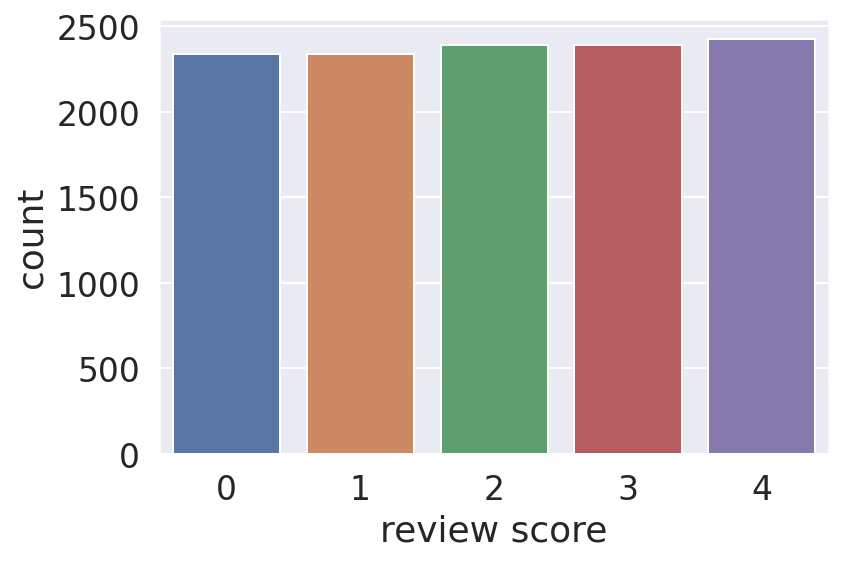

In [ ]:
sns.countplot(reviews_dataset.score)
plt.xlabel('review score');

In [ ]:
reviews_dataset.to_csv('reviews_preprocessed_7.csv', index=None, header=True)

In [ ]:
reviews_dataset1 = reviews_dataset[reviews_dataset["score"]==0]

In [ ]:
len(reviews_dataset1)

2336

In [ ]:
reviews_dataset1["in_range"] = reviews_dataset1.polarity.apply(lambda x: 1 if (x>=-0.5 and x<=0.5) else 0)

In [ ]:
in_range = reviews_dataset1[reviews_dataset1["in_range"] == 1]
len(in_range)

2182

In [ ]:
reviews_dataset1["in_range"] = reviews_dataset1.polarity.apply(lambda x: 1 if (x>0.5 and x<=1) else 0)

In [ ]:
in_range = reviews_dataset1[reviews_dataset1["in_range"] == 1]
len(in_range)

71

In [ ]:
reviews_dataset1["in_range"] = reviews_dataset1.polarity.apply(lambda x: 1 if (x>0.25 and x<=1) else 0)

In [ ]:
in_range = reviews_dataset1[reviews_dataset1["in_range"] == 1]
len(in_range)

381

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f81f2ac0850>]],
      dtype=object)

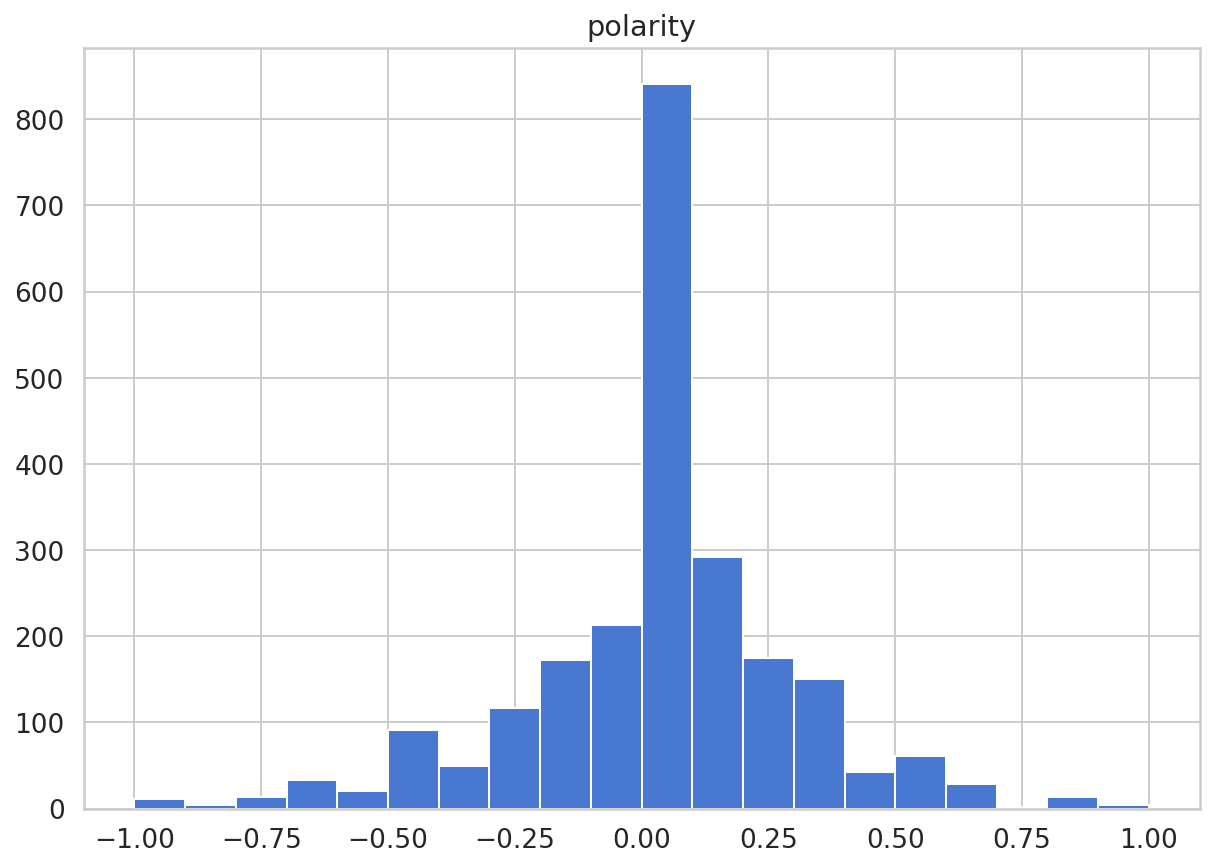

In [ ]:
reviews_dataset1[["polarity"]].hist(bins=20, figsize=(10, 7))

In [ ]:
reviews_dataset1 = reviews_dataset[reviews_dataset["score"]==1]

In [ ]:
len(reviews_dataset1)

2337

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f81f1975150>]],
      dtype=object)

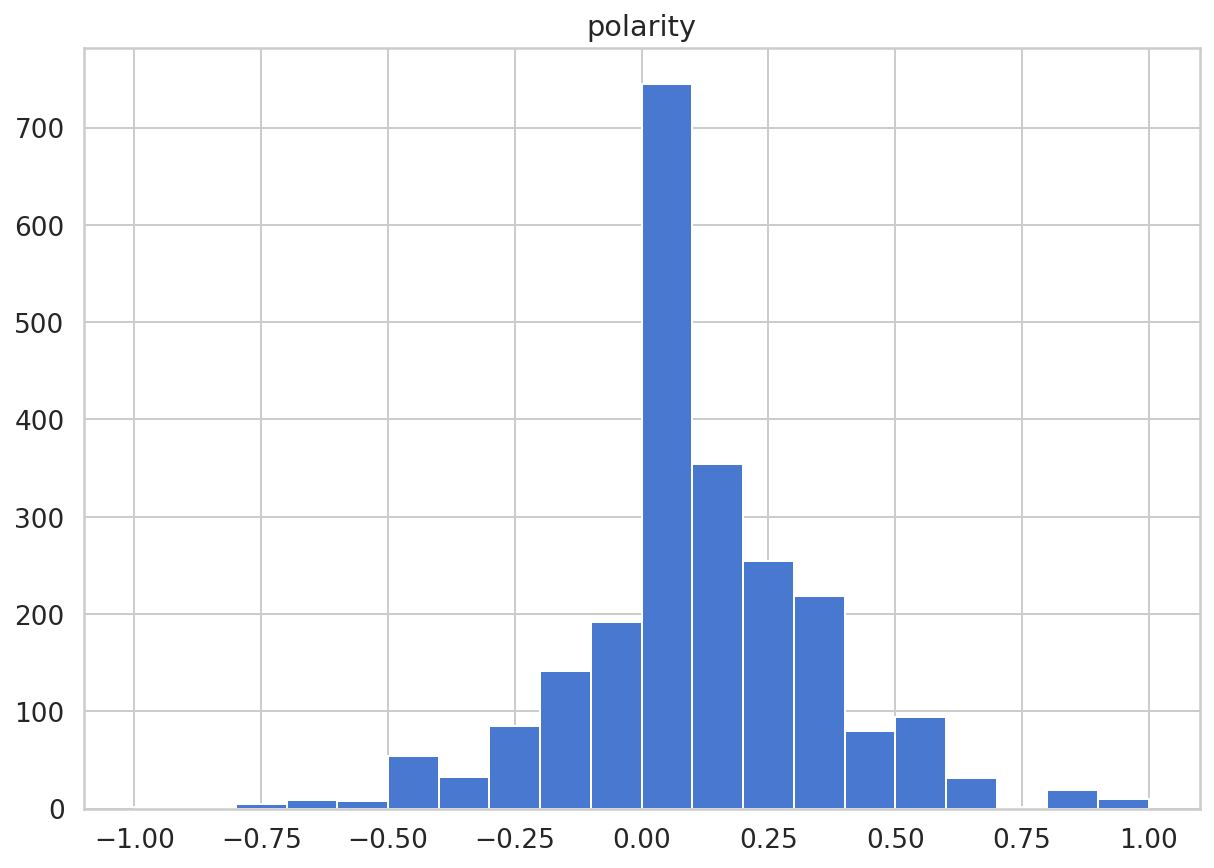

In [ ]:
reviews_dataset1[["polarity"]].hist(bins=20, figsize=(10, 7))

In [ ]:
reviews_dataset1["in_range"] = reviews_dataset1.polarity.apply(lambda x: 1 if (x>=-1 and x<-0.5) else 0)

In [ ]:
in_range = reviews_dataset1[reviews_dataset1["in_range"] == 1]
len(in_range)

25

In [ ]:
reviews_dataset1["in_range"] = reviews_dataset1.polarity.apply(lambda x: 1 if (x>=-1 and x<-0.25) else 0)

In [ ]:
in_range = reviews_dataset1[reviews_dataset1["in_range"] == 1]
len(in_range)

136

In [ ]:
reviews_dataset1 = reviews_dataset[reviews_dataset["score"]==2]

In [ ]:
len(reviews_dataset1)

2391

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f44925c83d0>]],
      dtype=object)

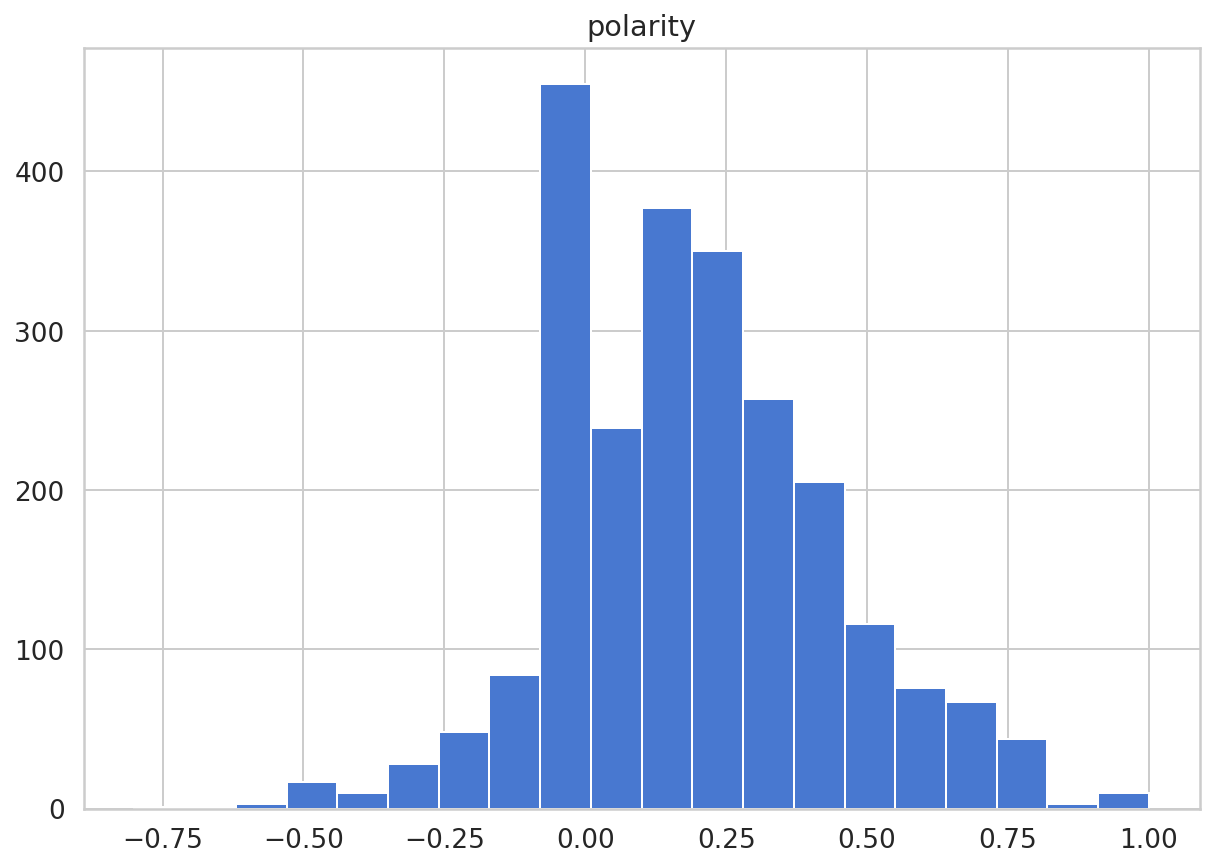

In [ ]:
reviews_dataset1[["polarity"]].hist(bins=20, figsize=(10, 7))

In [ ]:
reviews_dataset1["in_range"] = reviews_dataset1.polarity.apply(lambda x: 1 if (x>=-1 and x<-0.15) else 0)

In [ ]:
in_range = neutral_rating_df[neutral_rating_df["in_range"] == 1]
len(in_range)

124

In [ ]:
reviews_dataset1["in_range"] = reviews_dataset1.polarity.apply(lambda x: 1 if (x>0.6 and x<=1) else 0)

In [ ]:
in_range = neutral_rating_df[neutral_rating_df["in_range"] == 1]
len(in_range)

133

In [ ]:
reviews_dataset1 = reviews_dataset[reviews_dataset["score"]==3]

In [ ]:
len(reviews_dataset1)

2391

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4491f20190>]],
      dtype=object)

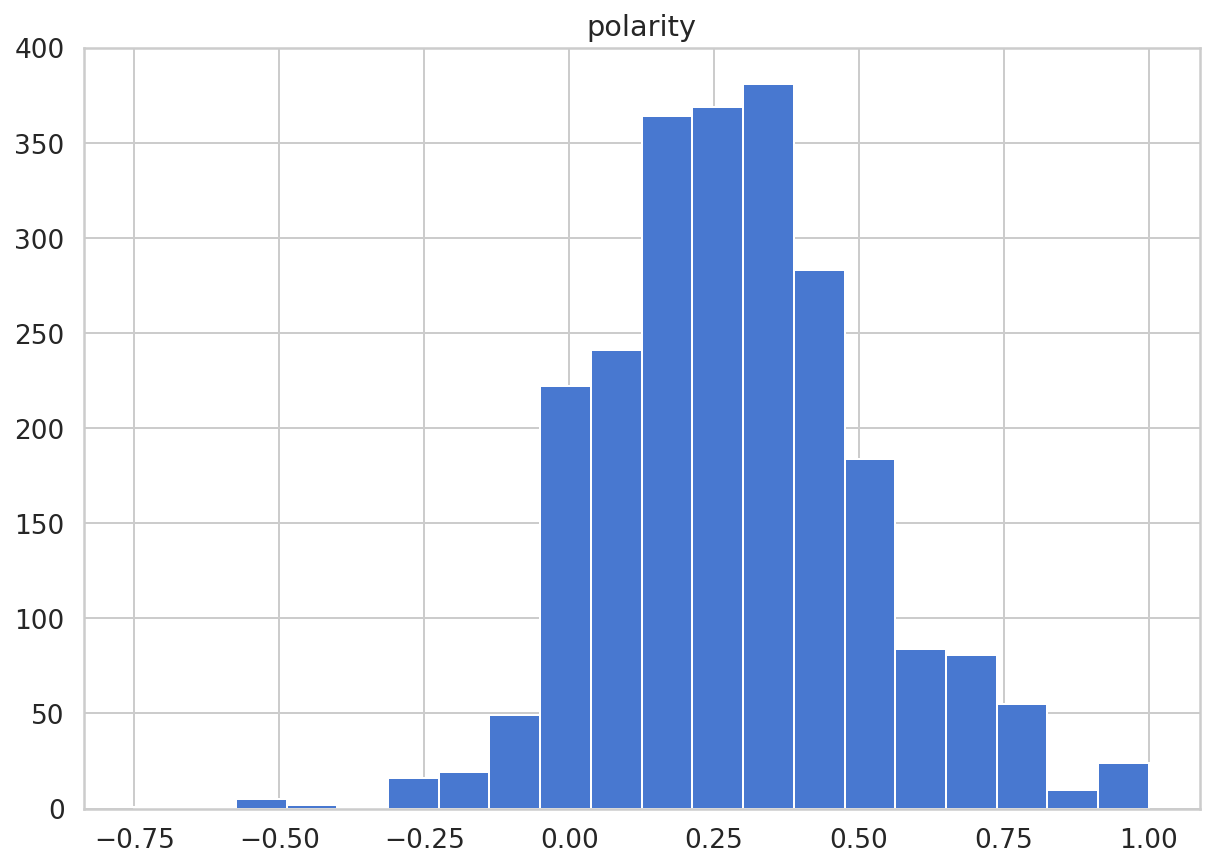

In [ ]:
reviews_dataset1[["polarity"]].hist(bins=20, figsize=(10, 7))

In [ ]:
reviews_dataset1["in_range"] = reviews_dataset1.polarity.apply(lambda x: 1 if (x>=-1 and x<0) else 0)

In [ ]:
in_range = neutral_rating_df[neutral_rating_df["in_range"] == 1]
len(in_range)

135

In [ ]:
reviews_dataset1["in_range"] = reviews_dataset1.polarity.apply(lambda x: 1 if (x>0.65 and x<=1) else 0)

In [ ]:
in_range = neutral_rating_df[neutral_rating_df["in_range"] == 1]
len(in_range)

155

In [ ]:
reviews_dataset1 = reviews_dataset[reviews_dataset["score"]==4]

In [ ]:
len(reviews_dataset1)

2424

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4491db5fd0>]],
      dtype=object)

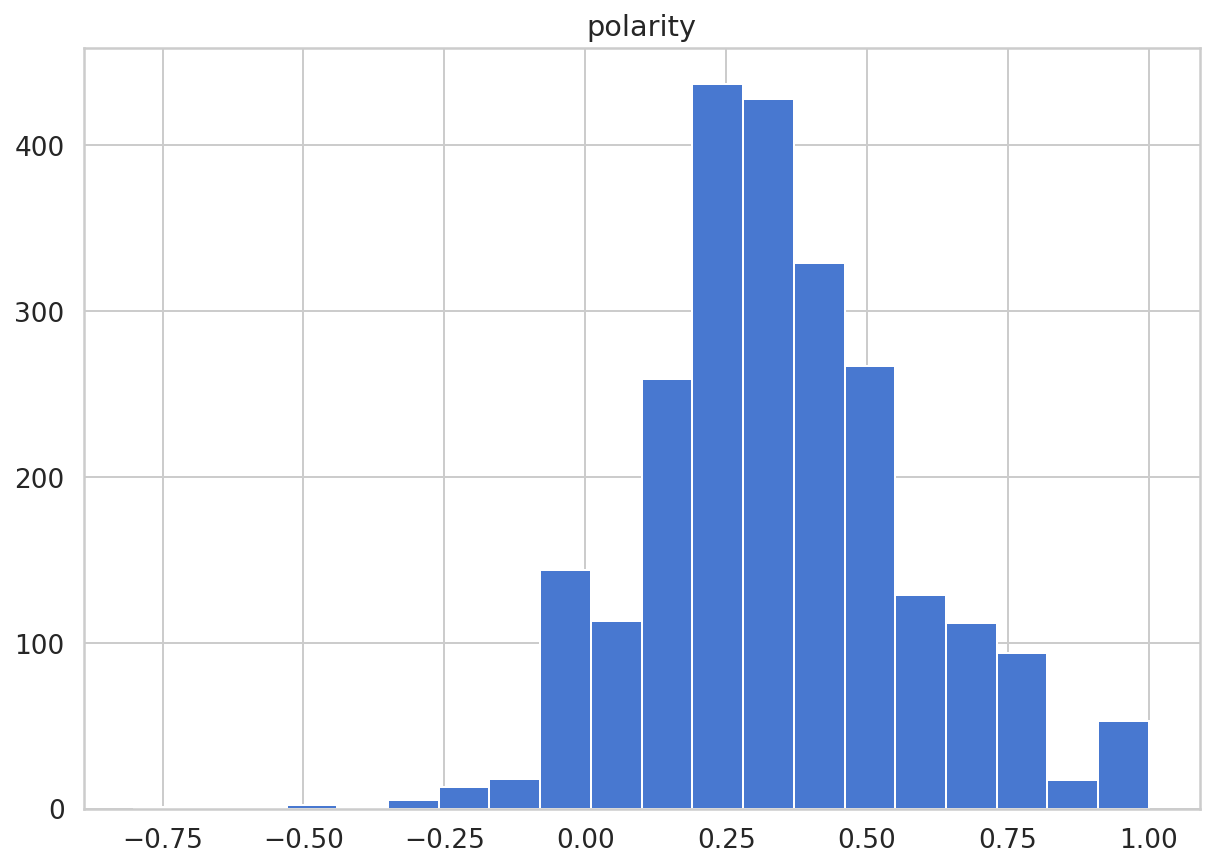

In [ ]:
reviews_dataset1[["polarity"]].hist(bins=20, figsize=(10, 7))

In [ ]:
reviews_dataset1["in_range"] = reviews_dataset1.polarity.apply(lambda x: 1 if (x>=-1 and x<0) else 0)

In [ ]:
in_range = neutral_rating_df[neutral_rating_df["in_range"] == 1]
len(in_range)

82

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72be9ceb50>,
      dtype=object)

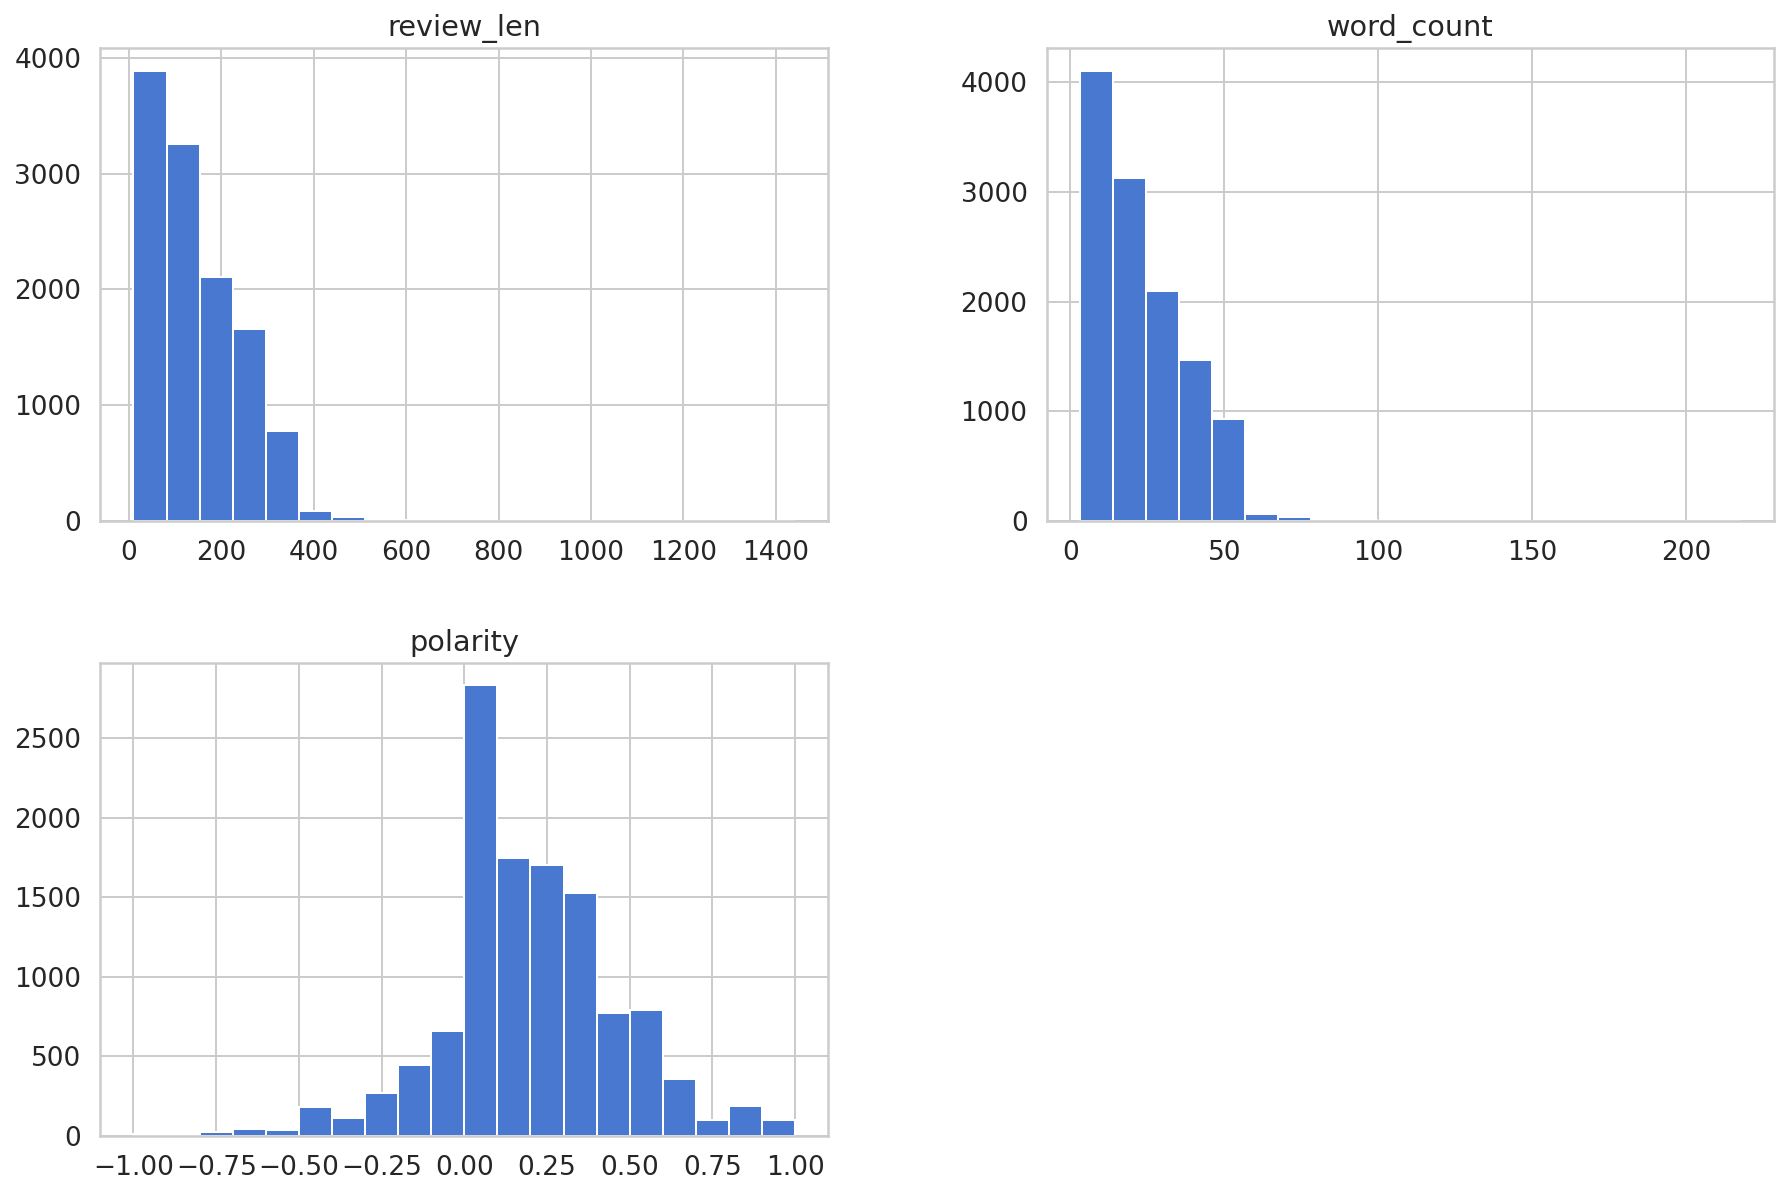

In [ ]:
reviews_dataset[["review_len", "word_count", "polarity"]].hist(bins=20, figsize=(15, 10))

In [ ]:
len(reviews_dataset)

11879

In [ ]:
reviews_dataset["in_range"] = reviews_dataset.polarity.apply(lambda x: 1 if (x>=0.8 and x<=1) else 0)

In [ ]:
in_range = reviews_dataset[reviews_dataset["in_range"] == 1]
len(in_range)

285

In [ ]:
print("1 star rating count: " ,len(in_range[in_range["score"] == 0]),"\n")
print("2 stars rating count: ",len(in_range[in_range["score"] == 1]),"\n")
print("3 stars rating count: ",len(in_range[in_range["score"] == 2]),"\n")
print("4 stars rating count: ",len(in_range[in_range["score"] == 3]),"\n")
print("5 stars rating count: ",len(in_range[in_range["score"] == 4]),"\n")

1 star rating count:  1610 

2 stars rating count:  1808 

3 stars rating count:  2086 

4 stars rating count:  2256 

5 stars rating count:  2342 



In [ ]:
print("1 star rating count: ",len(reviews_dataset[reviews_dataset["score"] == 0]),"\n")
print("2 stars rating count: ",len(reviews_dataset[reviews_dataset["score"] == 1]),"\n")
print("3 stars rating count: ",len(reviews_dataset[reviews_dataset["score"] == 2]),"\n")
print("4 stars rating count: ",len(reviews_dataset[reviews_dataset["score"] == 3]),"\n")
print("5 stars rating count: ",len(reviews_dataset[reviews_dataset["score"] == 4]),"\n")

1 star rating count:  2336 

2 stars rating count:  2337 

3 stars rating count:  2391 

4 stars rating count:  2391 

5 stars rating count:  2424 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


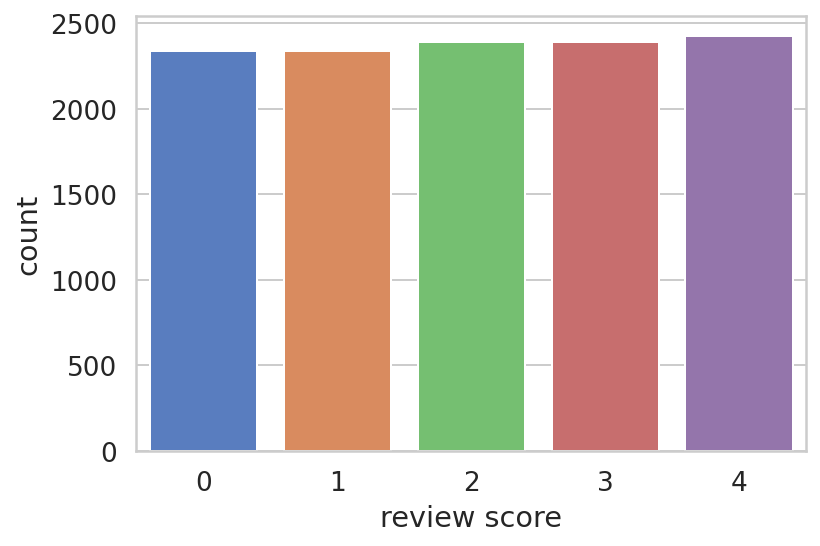

In [ ]:
sns.countplot(reviews_dataset.score)
plt.xlabel('review score');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


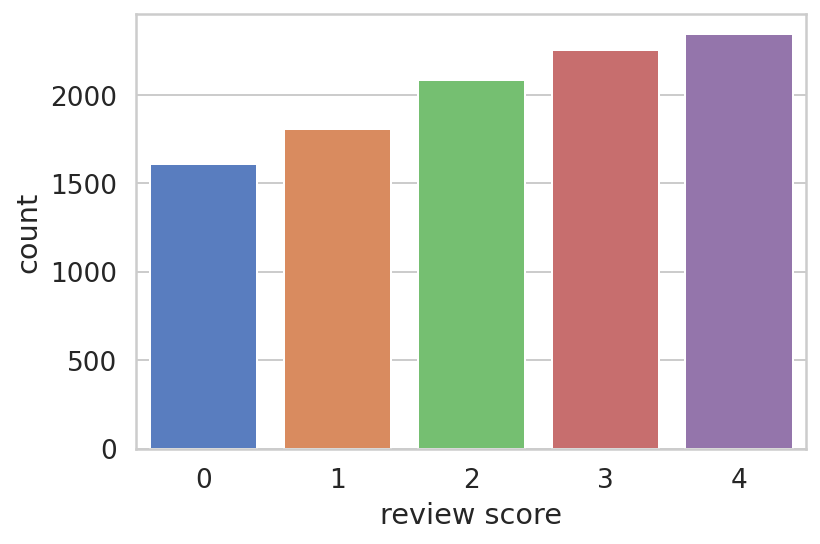

In [ ]:
sns.countplot(in_range.score)
plt.xlabel('review score');

In [ ]:
reviews_dataset["in_range"] = reviews_dataset.polarity.apply(lambda x: 1 if (x>=0 and x<=0.5) else 0)

In [ ]:
in_range = reviews_dataset[reviews_dataset["in_range"] == 1]
len(in_range)

8909

In [ ]:
print("1 star rating count: " ,len(in_range[in_range["score"] == 0]),"\n")
print("2 stars rating count: ",len(in_range[in_range["score"] == 1]),"\n")
print("3 stars rating count: ",len(in_range[in_range["score"] == 2]),"\n")
print("4 stars rating count: ",len(in_range[in_range["score"] == 3]),"\n")
print("5 stars rating count: ",len(in_range[in_range["score"] == 4]),"\n")

1 star rating count:  1539 

2 stars rating count:  1702 

3 stars rating count:  1867 

4 stars rating count:  1928 

5 stars rating count:  1873 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


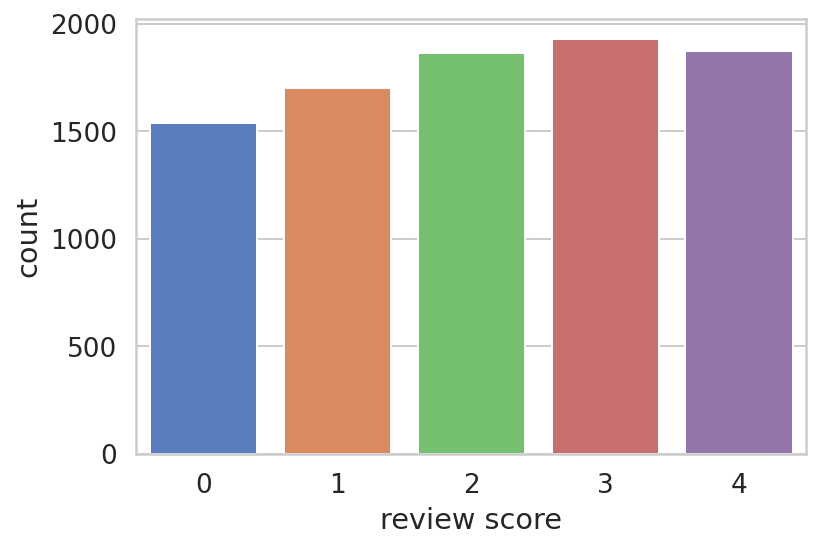

In [ ]:
sns.countplot(in_range.score)
plt.xlabel('review score');

Let's see which review rating have neutral polarity

In [ ]:
neutral_rating_df = reviews_dataset.copy()
neutral_rating_df["neutral"] = neutral_rating_df.polarity.apply(lambda x: 1 if (x>-0.05 and x<0.05) else 0)
neutral_rating_df.head()

,content,score,thumbsUpCount,appId,review_len,word_count,polarity,neutral
0,user interface horrible way task show difficul...,0,145,com.anydo,242,40,0.031481,1
1,keep lose event save enter recur event might s...,0,2,com.anydo,128,22,0.000000,1
2,adhd want try app help remember chore around h...,0,0,com.anydo,139,22,0.500000,0
3,point pay premium colour tag dont even show ca...,0,3,com.anydo,123,21,0.000000,1
4,installed look around instal clunky feel intui...,0,1,com.anydo,136,20,0.100000,0


In [ ]:
neutral_rating_df = neutral_rating_df[neutral_rating_df["neutral"] == 1]
len(neutral_rating_df)

2334

In [ ]:
print("1 star rating count: " ,len(neutral_rating_df[neutral_rating_df["score"] == 0]),"\n")
print("2 stars rating count: ",len(neutral_rating_df[neutral_rating_df["score"] == 1]),"\n")
print("3 stars rating count: ",len(neutral_rating_df[neutral_rating_df["score"] == 2]),"\n")
print("4 stars rating count: ",len(neutral_rating_df[neutral_rating_df["score"] == 3]),"\n")
print("5 stars rating count: ",len(neutral_rating_df[neutral_rating_df["score"] == 4]),"\n")

1 star rating count:  751 

2 stars rating count:  662 

3 stars rating count:  516 

4 stars rating count:  246 

5 stars rating count:  172 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


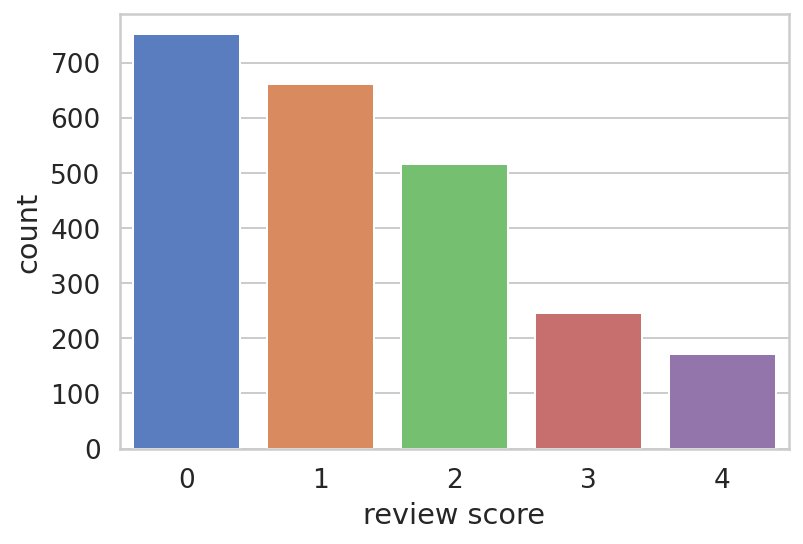

In [ ]:
sns.countplot(neutral_rating_df.score)
plt.xlabel('review score');

Because there is a rating column available, we should check if the polarity goes with the rating. Here are the boxplots of the polarity of each rating:

In [ ]:
import numpy as np

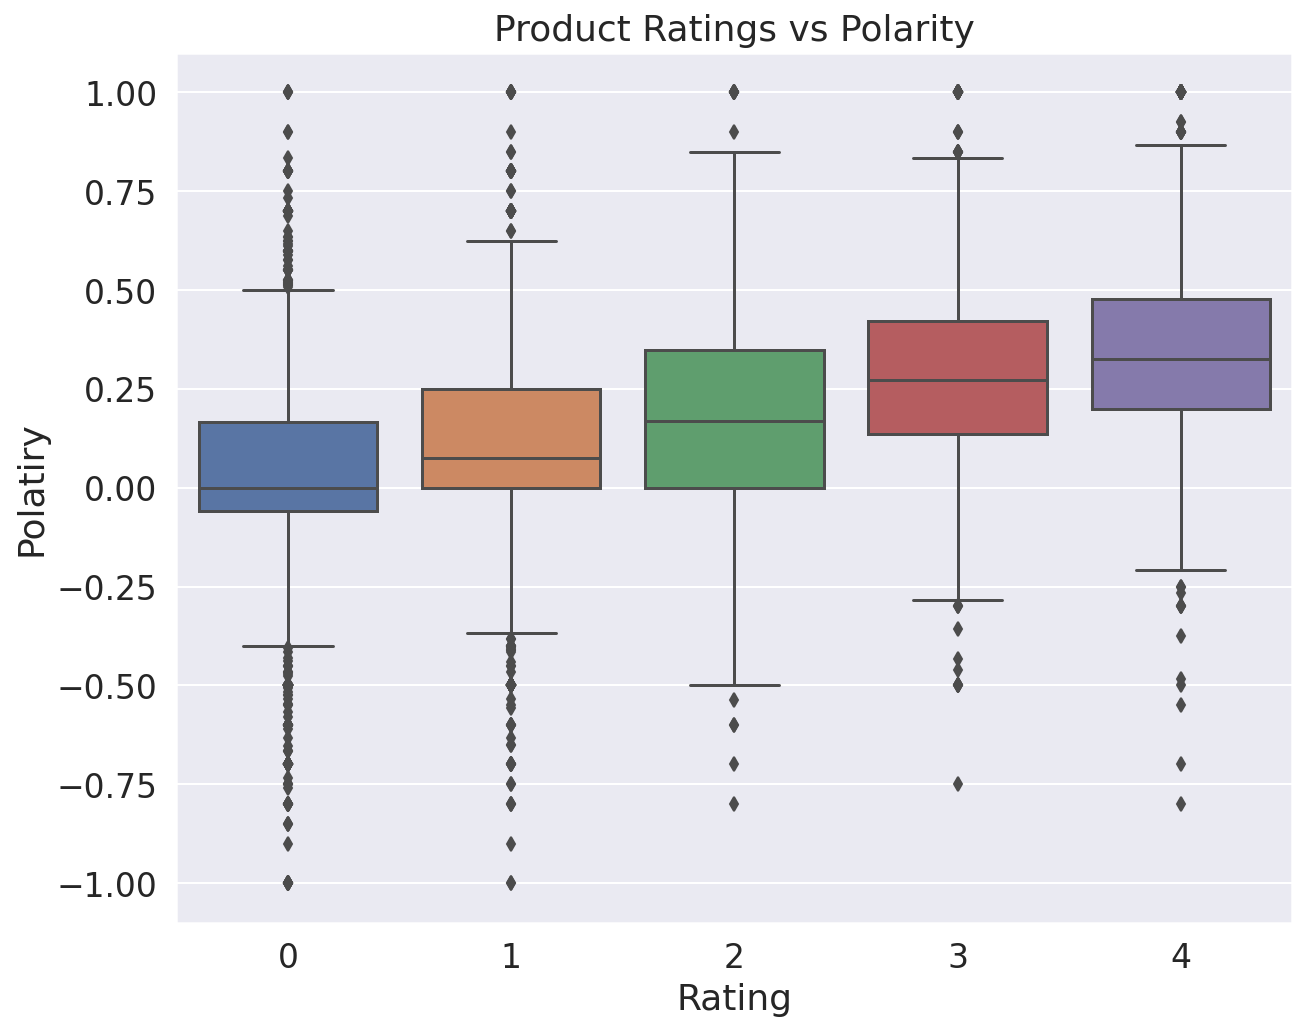

In [ ]:
plt.figure(figsize = (10, 8))
sns.set_style('whitegrid')
sns.set(font_scale = 1.5)
sns.boxplot(x = 'score', y = 'polarity', data = reviews_dataset)
plt.xlabel("Rating")
plt.ylabel("Polatiry")
plt.title("Product Ratings vs Polarity")
plt.show()

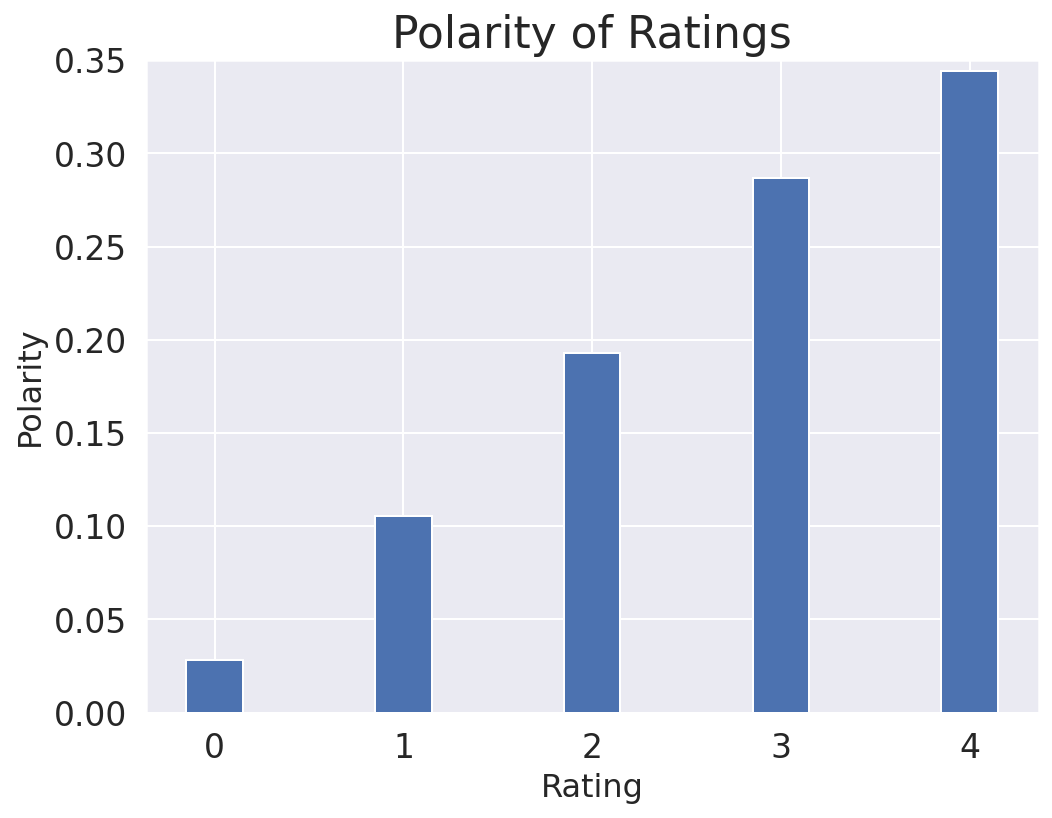

In [ ]:
mean_pol = reviews_dataset.groupby('score')['polarity'].agg([np.mean])
mean_pol.columns = ['mean_polarity']
fig, ax = plt.subplots(figsize=(8, 6))
plt.bar(mean_pol.index, mean_pol.mean_polarity, width=0.3)
plt.title("Polarity of Ratings", fontsize=22)
plt.ylabel("Polarity", fontsize=16)
plt.xlabel("Rating", fontsize=16)
plt.ylim(0, 0.35)
plt.show()
#plt.gca().set_xticklabels(mean_pol.index, fontdict={'size': 14})

Mean polarity keeps going up with the higher rating. There are a lot of outliers in rating 1 and 5 though. Maybe looking at the numbers will help a bit more.

I was expecting ratings 1 and 2 to have a polarity of close to -1. But look like they are closer to 0. That means the review may not have that many negative words in it. I am guessing it just by looking at the polarity. Please read a few reviews of rating 1 to double-check.

Length of the Review vs the Rating:
It will be interesting to see if the review length changes with rating.

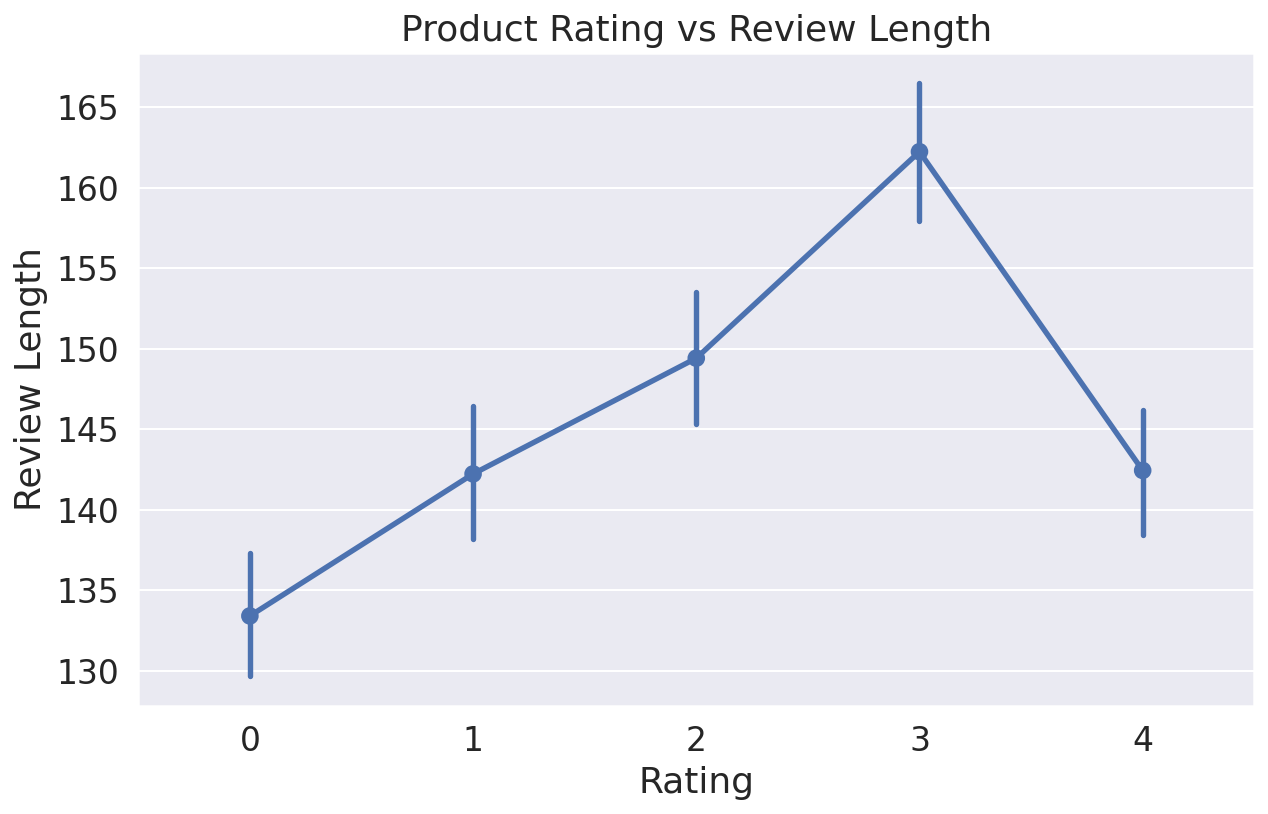

In [ ]:
plt.figure(figsize=(10, 6))
sns.pointplot(x = "score", y = "review_len", data = reviews_dataset)
plt.xlabel("Rating")
plt.ylabel("Review Length")
plt.title("Product Rating vs Review Length")
plt.show()

Length of the Review vs the polarity:
It will be interesting to see if the review length changes with polarity.

In [ ]:
round_pol_df = reviews_dataset
round_pol_df["rounded_polarity"] = np.round(round_pol_df["polarity"] * 10) / 10
round_pol_df.head()

,content,score,thumbsUpCount,appId,review_len,word_count,polarity,rounded_polarity
0,user interface horrible way task show difficul...,0,145,com.anydo,242,40,0.031481,0.0
1,keep lose event save enter recur event might s...,0,2,com.anydo,128,22,0.000000,0.0
2,adhd want try app help remember chore around h...,0,0,com.anydo,139,22,0.500000,0.5
3,point pay premium colour tag dont even show ca...,0,3,com.anydo,123,21,0.000000,0.0
4,installed look around instal clunky feel intui...,0,1,com.anydo,136,20,0.100000,0.1


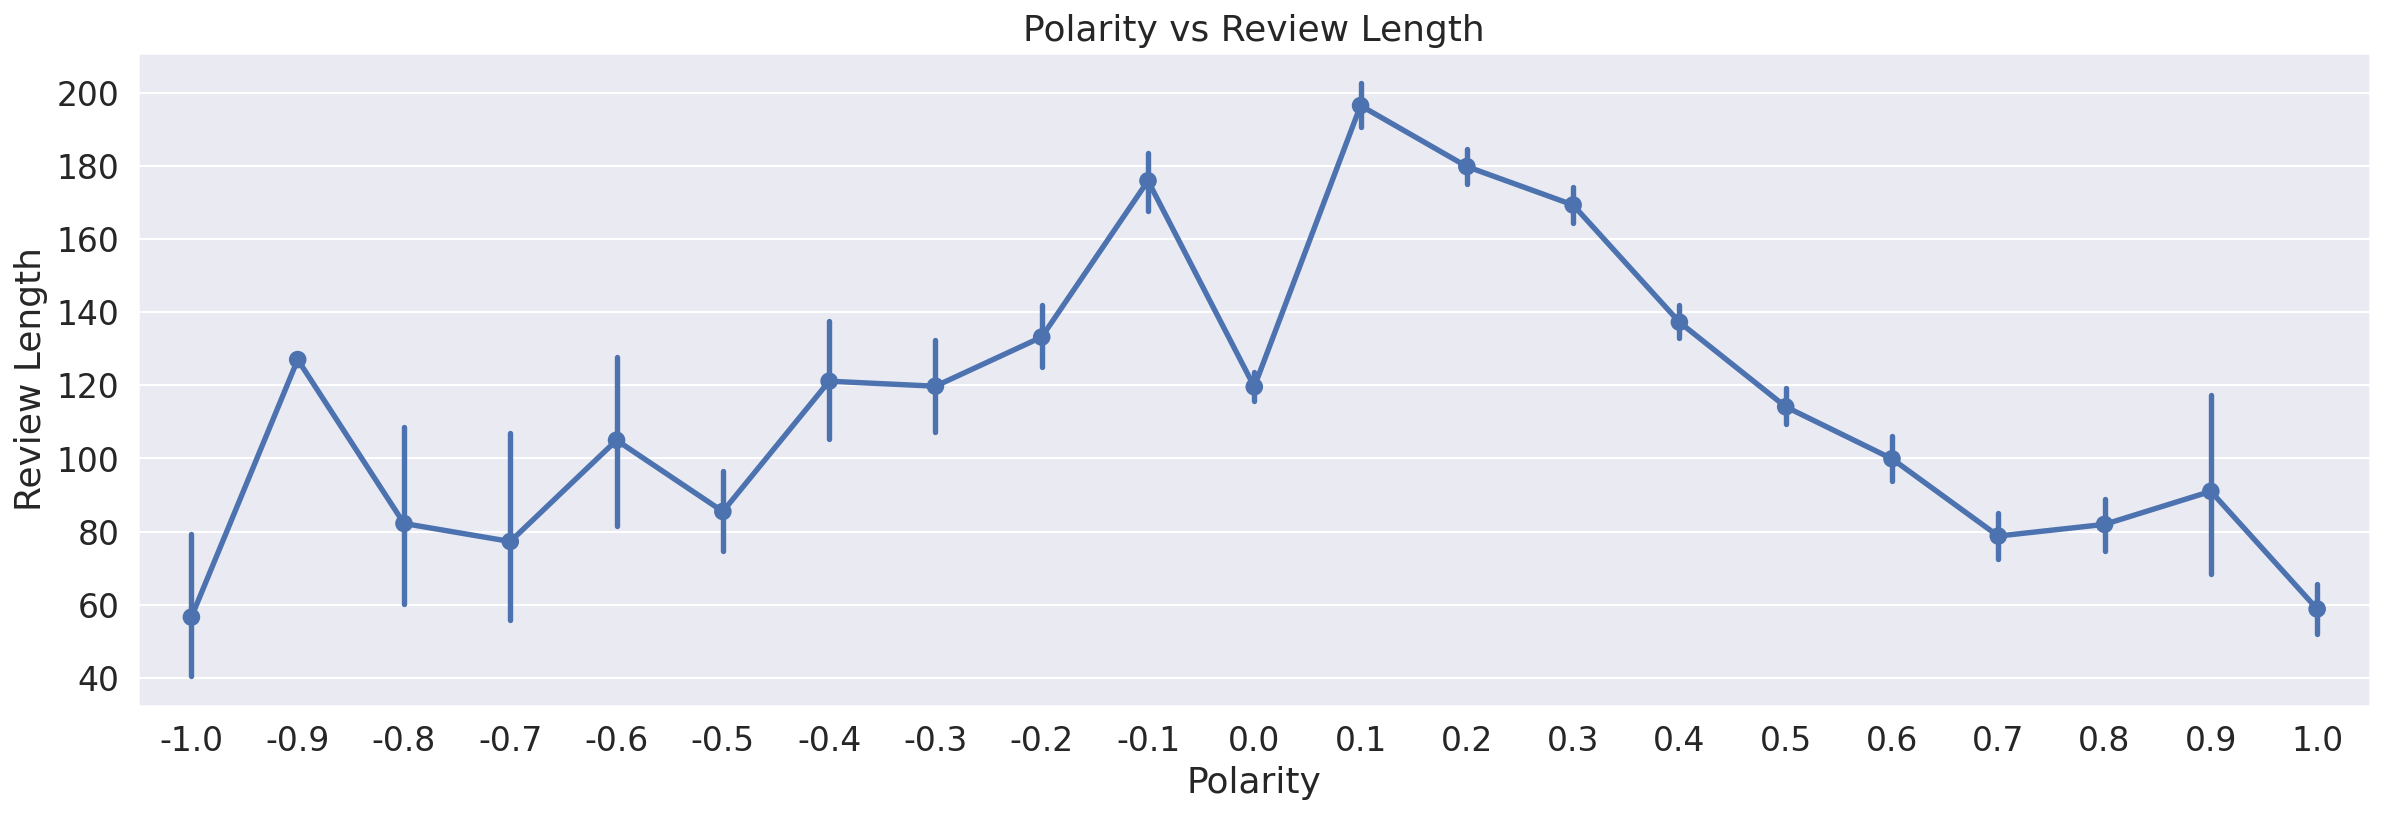

In [ ]:
plt.figure(figsize=(20, 6))
sns.pointplot(x = "rounded_polarity", y = "review_len", data = round_pol_df)
plt.xlabel("Polarity")
plt.ylabel("Review Length")
plt.title("Polarity vs Review Length")
plt.show()

WordCloud:
Wordcloud is a common and beautiful visualization for text data to plot the frequency of words. You may need to install wordcloud if you do not have it already, using this command:

To create the word cloud, I combined all the texts in the content column to made a bid text block.

In [ ]:
text = " ".join(review for review in reviews_dataset.content)

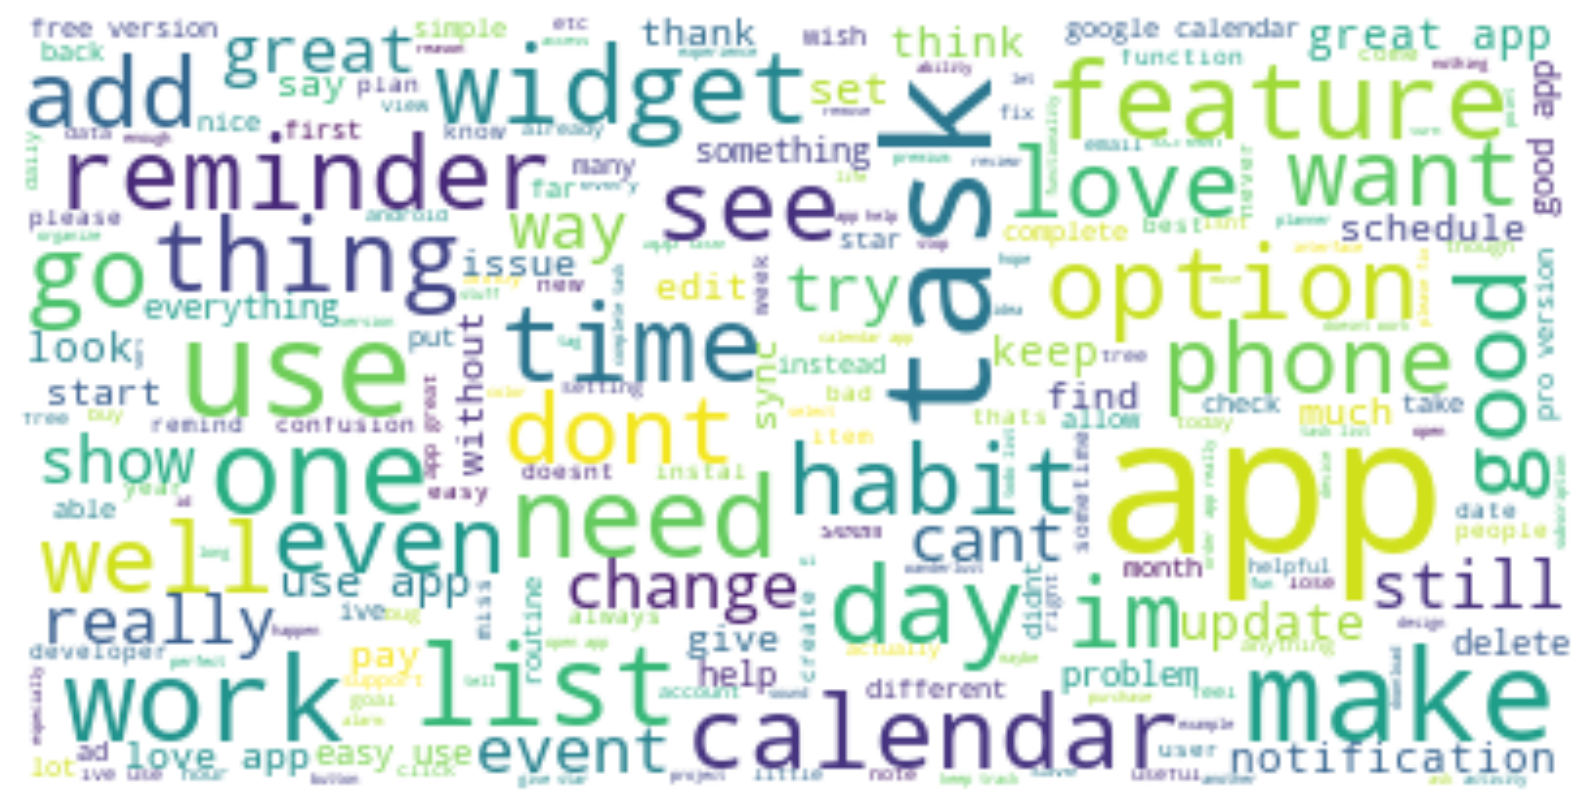

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
wordcl = WordCloud(stopwords = stopwords, background_color='white', max_font_size = 50, max_words = 5000).generate(text)
plt.figure(figsize=(14, 12))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()

Frequency Charts:
This is common practice in text data analysis to make charts of the frequency of words. That gives a good idea about what people are talking about most in this text. First, find the frequency of each word in the review column of the dataset. Then plot the top 40 words based on the frequency.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
def get_top_n_words(corpus, n=1):
    vec=CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(reviews_dataset['content'], 40)
unigram_count = pd.DataFrame(common_words, columns = ['unigram', 'count'])
unigram_count.head()

,unigram,count
0,app,10489
1,use,4175
2,task,4084
3,like,2829
4,time,2809


Here is the bar plot of the frequency of the top 40 words:

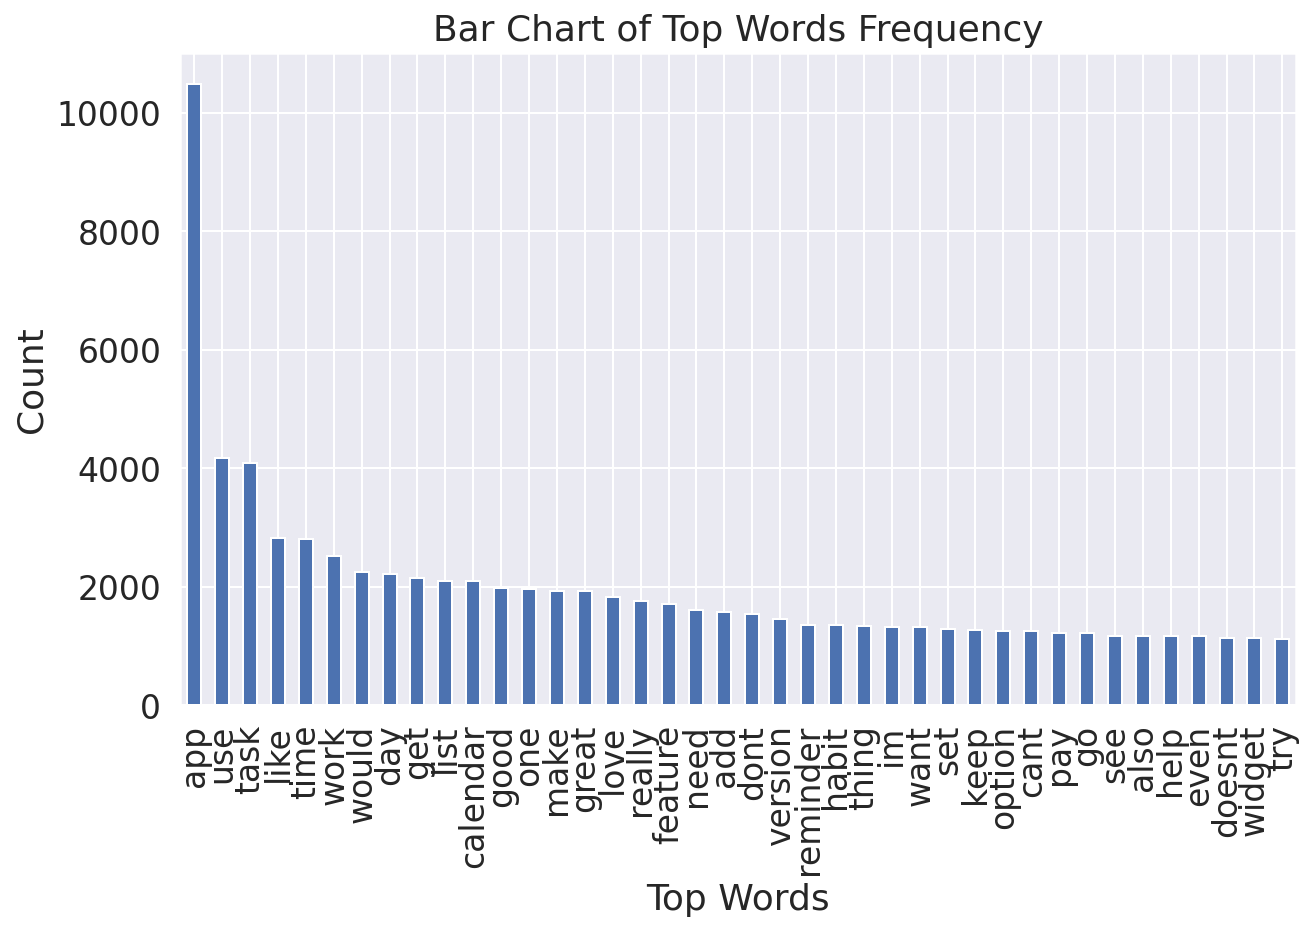

In [ ]:
unigram_count.groupby('unigram').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel = "Top Words",
    ylabel = "Count",
    title = "Bar Chart of Top Words Frequency"
)

These are the topmost occurring words in the reviews. But instead of just seeing one word two consecutive words or three consecutive words are more helpful. They provide some meaning. The following plot shows the topmost frequent bigrams:

In [ ]:
def get_top_n_bigram(corpus, n=1):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words2 = get_top_n_bigram(reviews_dataset['content'], 40)
bigram_count = pd.DataFrame(common_words2, columns=['bigram', "count"])
bigram_count.head()

,bigram,count
0,great app,586
1,use app,580
2,love app,554
3,easy use,435
4,google calendar,411


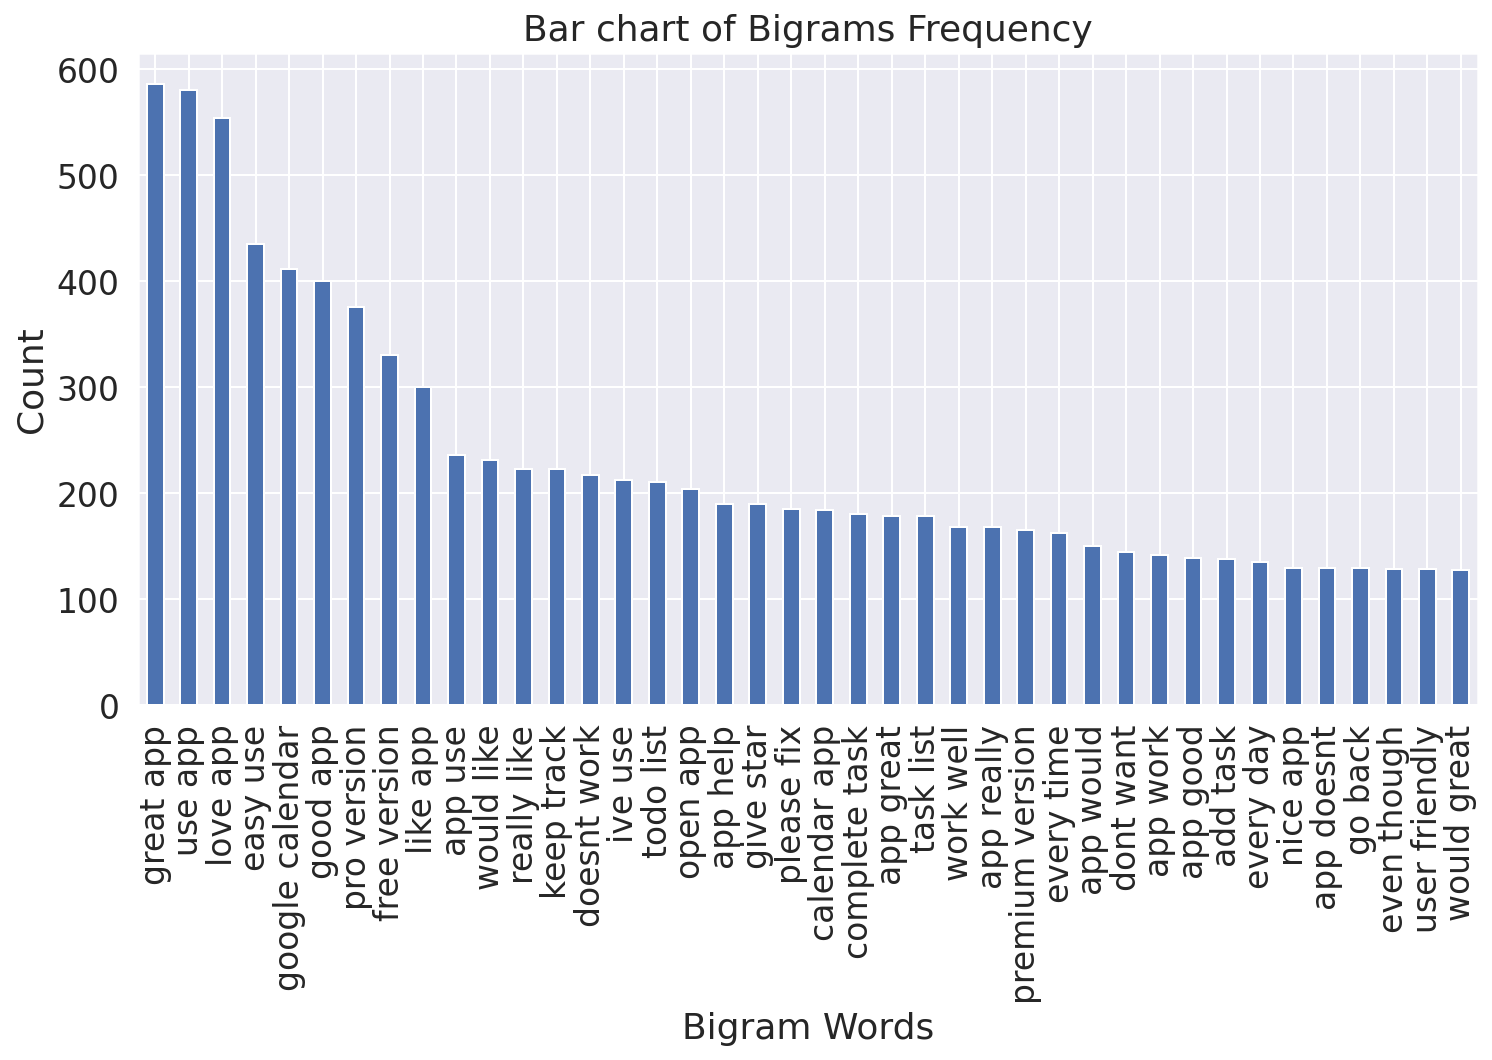

In [ ]:
bigram_count.groupby('bigram').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Bigram Words",
    ylabel = "Count",
    title = "Bar chart of Bigrams Frequency"
)

Look at the bigrams. They are somewhat phrases that make more sense. The next plot is the trigrams. Maybe that will provide us some more ideas about what people are saying in the reviews.

In [ ]:
def get_top_n_trigram(corpus, n=1):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words3 = get_top_n_trigram(reviews_dataset['content'], 40)
df3 = pd.DataFrame(common_words3, columns = ['trigram' , 'count'])
df3.head()

,trigram,count
0,really like app,95
1,ive use app,67
2,buy pro version,67
3,sync google calendar,63
4,use app year,61


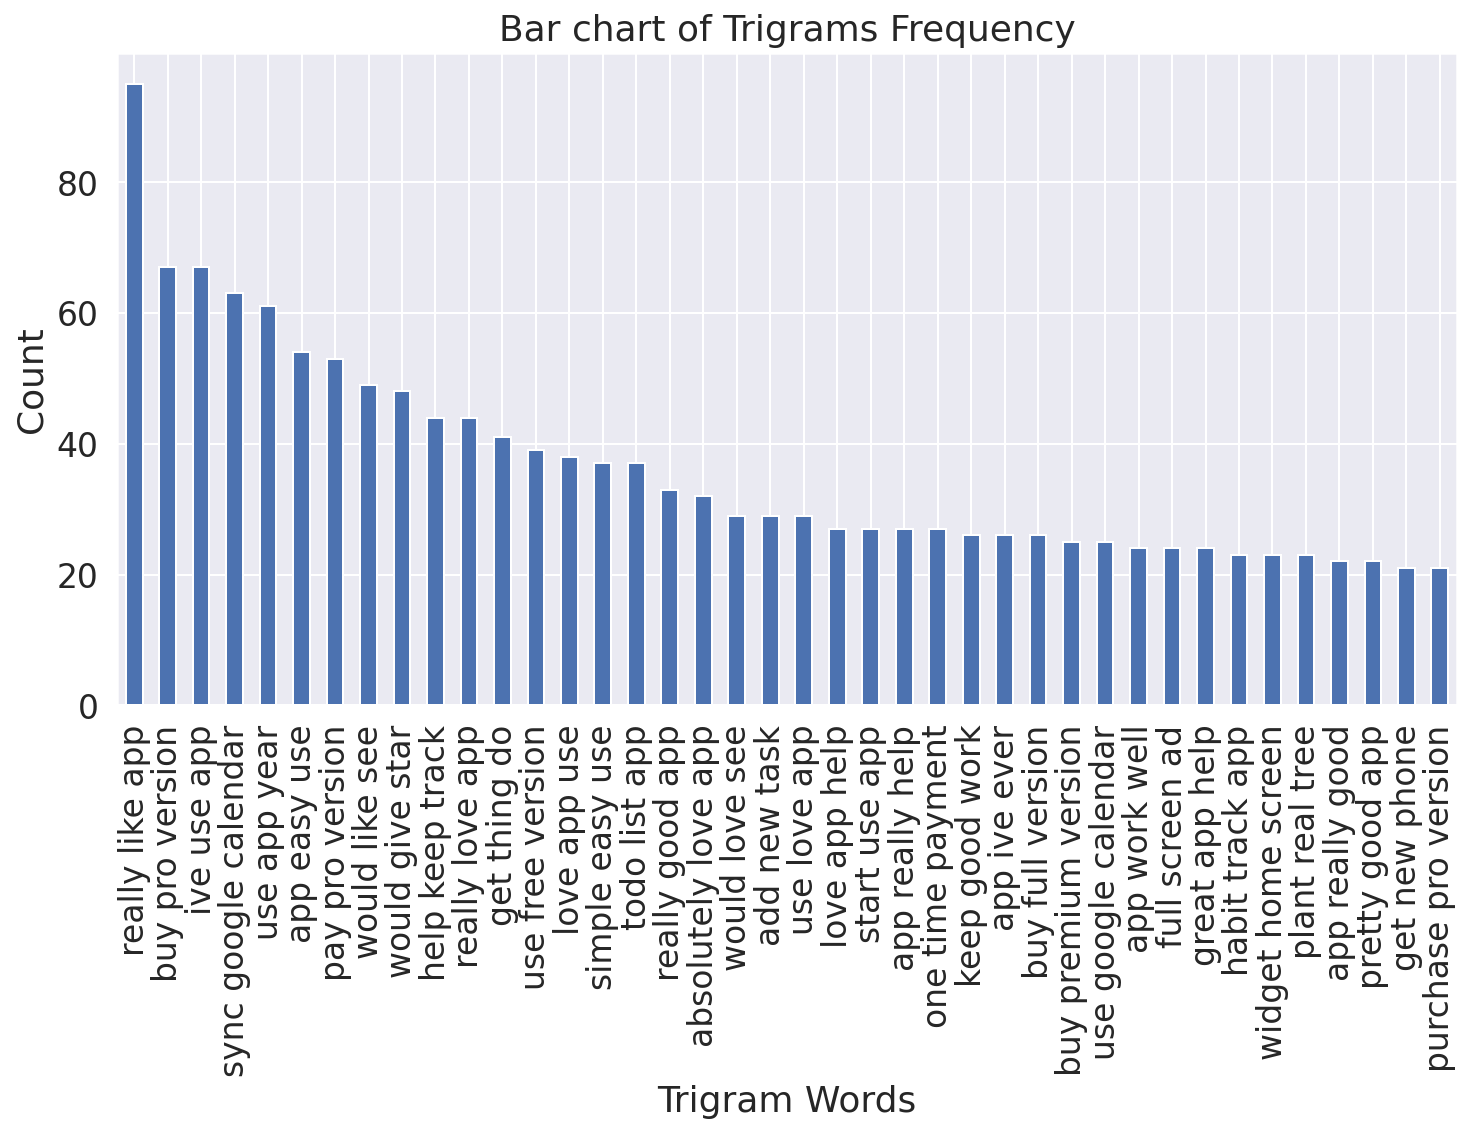

In [ ]:
df3.groupby('trigram').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Trigram Words",
    ylabel = "Count",
    title = "Bar chart of Trigrams Frequency"
)

Part-of -Speech Tagging:
this is a process of tagging the words with the part of speech such as nouns, pronouns, verbs, adjectives, etc. It can be done easily using TextBlob API.

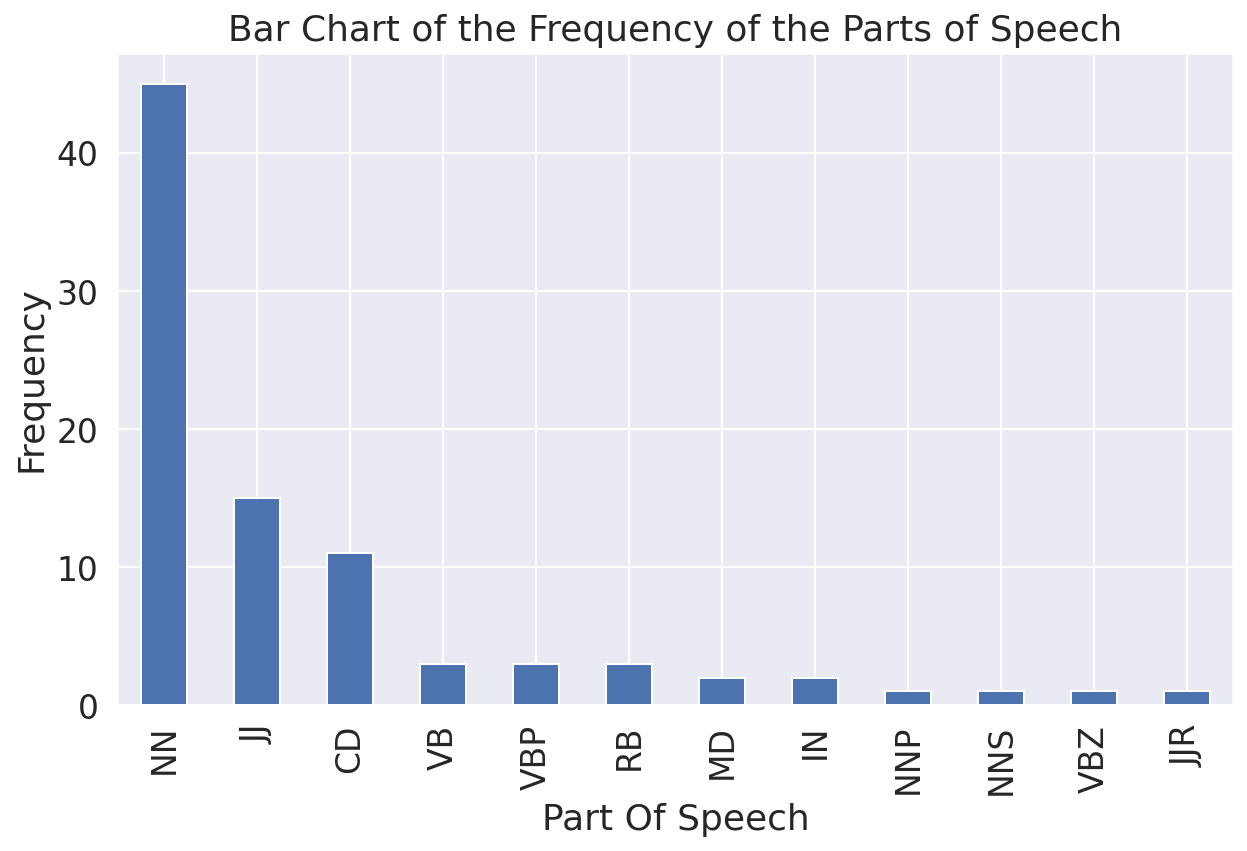

In [ ]:
blob = TextBlob(str(reviews_dataset['content']))
pos_df = pd.DataFrame(blob.tags, columns = ['word', 'pos'])
pos_df.head()
pos_df = pos_df.pos.value_counts()[:30]
pos_df.plot(kind='bar',
            xlabel = "Part Of Speech",
            ylabel = "Frequency",
            title = "Bar Chart of the Frequency of the Parts of Speech",
            figsize=(10, 6))